Done by:
- Harry Choo Jin Rui (HCHOO004@e.ntu.edu.sg)
- Leisha Pritika Menezes (LEISHAPR001@e.ntu.edu.sg)
- Lee Xin Yin (XLEE067@e.ntu.edu.sg)
- Loh Kai Jun (KLOH014@e.ntu.edu.sg)
- Joshua Ling Soon Wah (JLING@e.ntu.edu.sg)

In fulfilment of the SC1003 Mini Project.

# Introduction

6000 students from the "Introduction to Data Science" course were organized into 120 tutorial groups each consisting of 50 students.

As part of the project requirements, we were tasked to organize students into teams of five and ensure fairness and diversity when forming teams by considering school affiliation, gender and current CGPA.

# Problem Decomposition

### **Major Problem**

**Goal**:

- Assign 6,000 students (from 120 tutorial groups) into smaller project groups, ensuring fairness and balance in gender, CGPA, and school background.

- Each tutorial group has 50 students, and we need to divide them into N groups (usually 8–10 per tutorial).

- We must make sure:

  - Teams are balanced (no extreme cases like “all top students in one team”).

  - Teams reflect diversity (gender and school mix).

  - Teams are near the class’s average academic performance (balanced CGPA).

  - Some small exceptions are allowed if perfect balance isn’t possible.

### **Problem Decomposition**

**Level 1: Major Task**

- Assign all students into fair and balanced groups.

- This can be split into four main subtasks:

  1) Data Preparation

  2) Target and Rule Setup

  3) Team Formation

  4) Validation and Output
----------------------------------------------------------
**Level 2: Subproblems (within each major subtask)**

**1) Data Preparation**

**Goal**: Organize student data so that assignment can follow clear rules.

**Subtasks**:

  - Sort students by CGPA.

  - Divide students into three “bands”:

  - High band – top scorers

  - Mid band – average students

  - Low band – bottom scorers

  - Identify each student’s:

    - Gender

    - School (e.g., CCDS, NBS, etc.)

    - CGPA

  - Calculate class mean CGPA for reference.

  - Count total male/female (or minority) students.

**Functions involved**:

*sort_by_cgpa_ascending(), split_bands_and_tag()*

----------------------------------------------------------

**2)Target and Rule Setup**

**Goal**: Define rules and targets that guide how groups should be built.

**Subtasks**:

- Decide how many groups and group sizes (even_group_sizes()).

- Set band caps: maximum number of high/low students per group.

- Set school caps: avoid too many from the same school in one group.

- Set minority caps (gender balance): e.g., each group must have at least 1 female.

- Calculate how many highs/lows each group should ideally have (build_hl_targets_by_sizes()).

**Functions involved**:

*build_band_and_school_caps(), build_minority_caps(), build_hl_targets_by_sizes()*

----------------------------------------------------------

**3) Team Formation**

**Goal**: Systematically assign students into teams while following the rules above.

**Subtasks**:

**Phase 1**: Assign High–Low pairs


- Match one high and one low CGPA student whose average CGPA is near the class mean.

- Ensure each team doesn’t exceed caps.

- Respect school and gender diversity.

- Update remaining seats and minority requirements.

**Function**:
*pick_best_hl_pair_for_group_avg_with_lookahead()*

----------------------------------------------------------
**Phase 2**: Fill remaining seats with Mid students

- Add mid-CGPA students to complete the team.

- Choose mid students whose CGPA fits best to balance team average.

- Re-check caps and minority rules.

- If no perfect candidate, force assign one and mark group as “broken” (exception).

**Function**: *pick_best_mid_for_group_with_lookahead()*

----------------------------------------------------------
**Final checks**

- Make sure every student is assigned.

- Count minorities and schools per group again to verify.

**Helper Function**:
*ok_to_add() → checks all rules before adding a student to a team.*

----------------------------------------------------------

**4) Validation and Output**

**Goal**: Verify fairness and produce final team assignment.

**Subtasks**:

- For each tutorial group:

- Check that group sizes are correct.

- Check diversity: gender, CGPA, and school.

- Record which groups broke a rule (if any).

**Summarize**:

- sizes_msg → e.g. “6 groups of 5, 2 groups of 6”

- broken_groups → list of teams with forced assignments

- Output or export final team structure for all 120 tutorials.

**Final function**:
*group_students_pair_to_target_dict() → main controller of all steps.*

# Our Algorithm

During our brainstorming sessions, we took into account the different details we needed to consider to group students (gender, school, CGPA) and settled on prioritising CGPA, Gender and School in this order.

## Central Idea

The central idea of our algorithm is to ensure that each team's mean CGPA is as close to the tutorial group's mean CGPA as possible, while ensuring that:
*   No team has a majority of students from the same school
*   No team has a majority of the same gender



## Import Library

In [ ]:
import math
import csv
import matplotlib.pyplot as plt

## Load/Sort Functions

### Function load_and_sort_student_data

1. **Initialize a List**  
   We start by initialising a list called `students`. This list will be used to store each student's information, with each student represented by a dictionary containing their details.

2. **Creating Student Dictionaries**  
   Each student's details will be stored in a dictionary with the following keys:
   - `"Tutorial Group"`
   - `"Student ID"`
   - `"School"`
   - `"Name"`
   - `"Gender"`
   - `"CGPA"`
   - `"Team Assigned"`
   
   These dictionaries will be appended to the `students` list.

3. **Reading Data from the CSV File**  
   We read data from a file named `records.csv`. For each line in the file, we create a dictionary containing the student's information. To skip the header line, we use `lines[1:]`.

4. **Populating the List**  
   For each student, we create a dictionary with the above keys and append it to the `students` list.

#### Summary
The `students` list contains collection of dictionaries which represents an individual student's details from the CSV file.


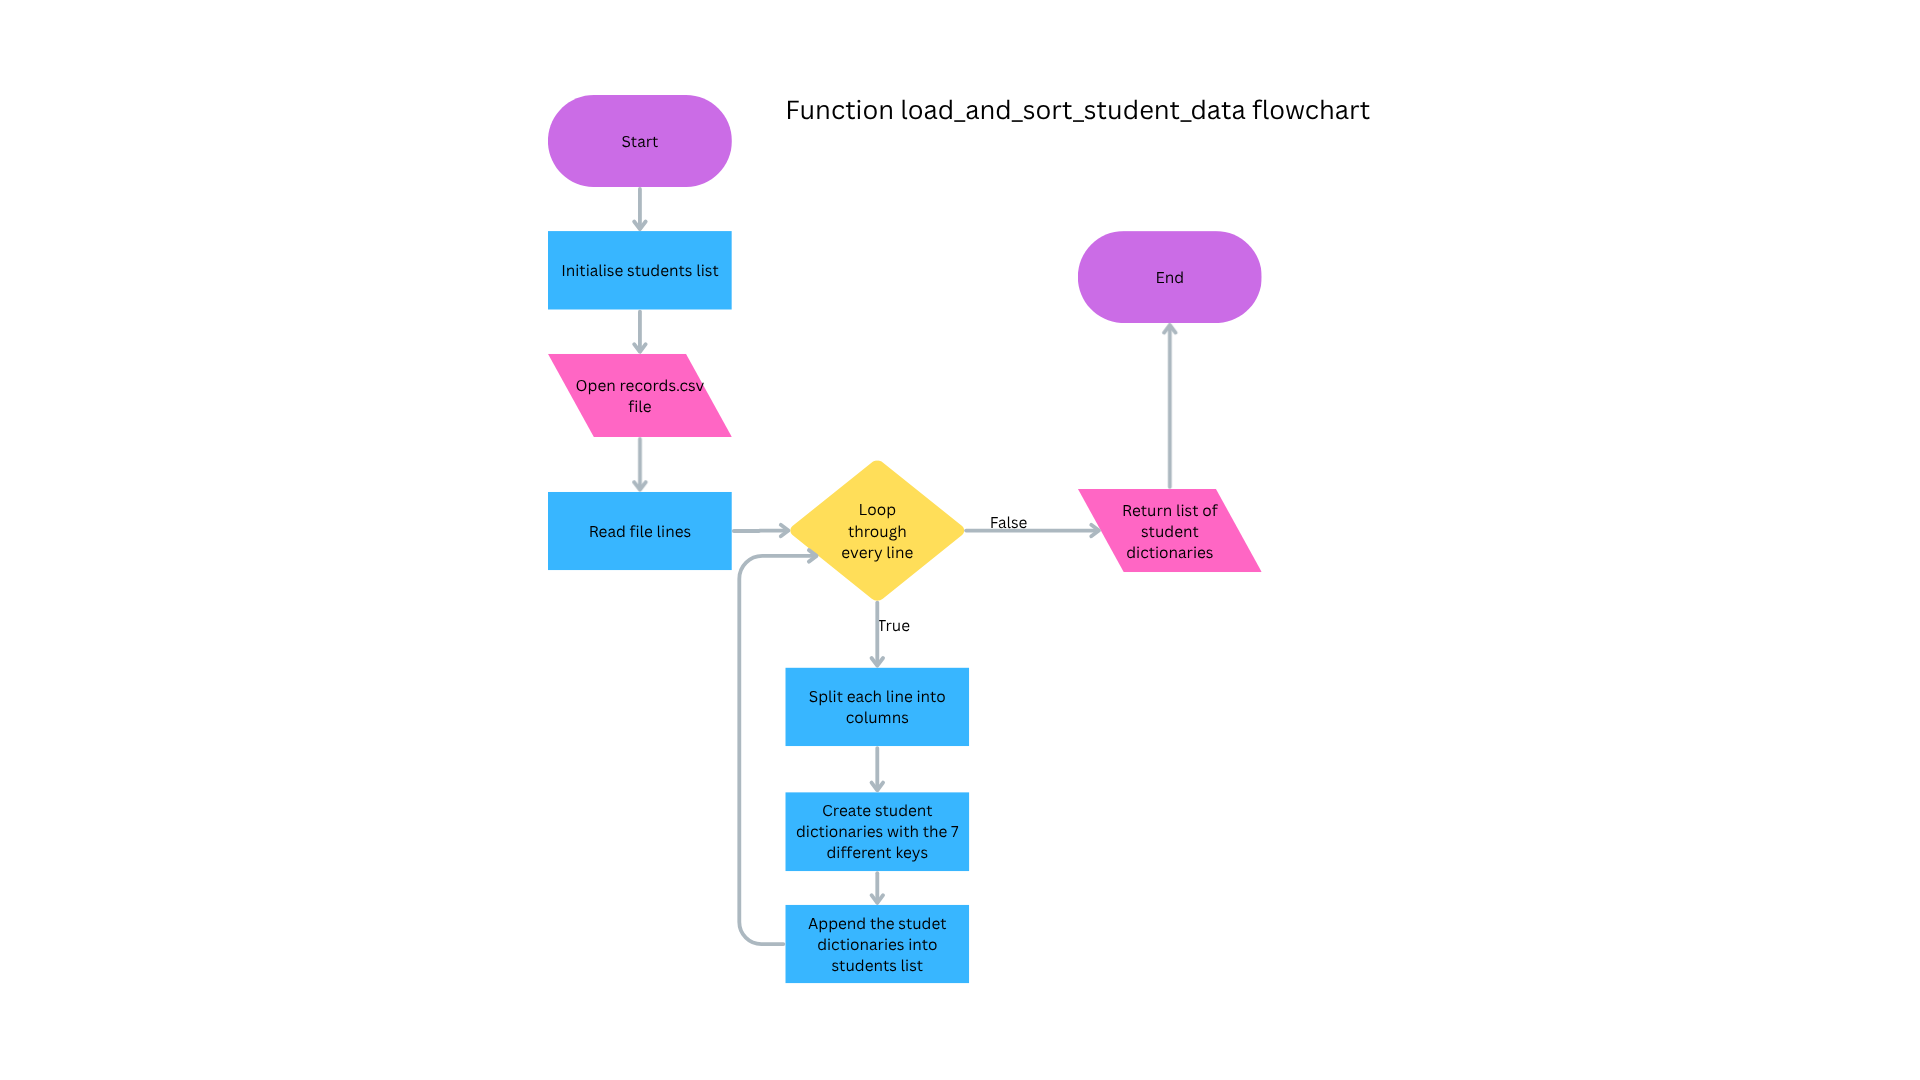

#### PSEUDOCODE

DEFINE load_and_sort_student_data function (parameter = file ):

	INITIALIZE an empty list, student = [ ]

	OPEN and READ file:
  
		STORE a list of all the lines from file

	CLOSE file

	FOR each line (from the 2nd line to the end):

		SPLIT the student data and STORE each data in a list

		FORM key: value pair for each data and STORE in a new dictionary

		APPEND the dictionary into the empty liststudent

	END FOR


In [ ]:
def load_and_sort_student_data(filename='records.csv'):
    students = []
    with open(filename, 'r') as file:
        lines = file.readlines()

        for line in lines[1:]:
            column = line.strip().split(',')
            student = {
                "Tutorial Group": column[0].strip(),
                "Student ID": column[1].strip(),
                "School": column[2].strip(),
                "Name": column[3].strip(),
                "Gender": column[4].strip().lower(),
                "CGPA": float(column[5].strip()),
                "Team Assigned": None
            }
            students.append(student)

    return students

### Function sort_students_by_group

#### Input
- List of students with each detail of the student in a dictionary.



#### Process: Grouping Students Based on Tutorial Group
- Go through the list of students and add them to their respective group with the group as the key.
- If the group does not exist in the dictionary, initialize the group and then add the student.



#### Output
- Returns a dictionary where each key is a tutorial group, and the corresponding value is a list of students belonging to that group.



#### Summary
This function groups students by their tutorial group so that we could use an organized set of information to do our team assignment later on.


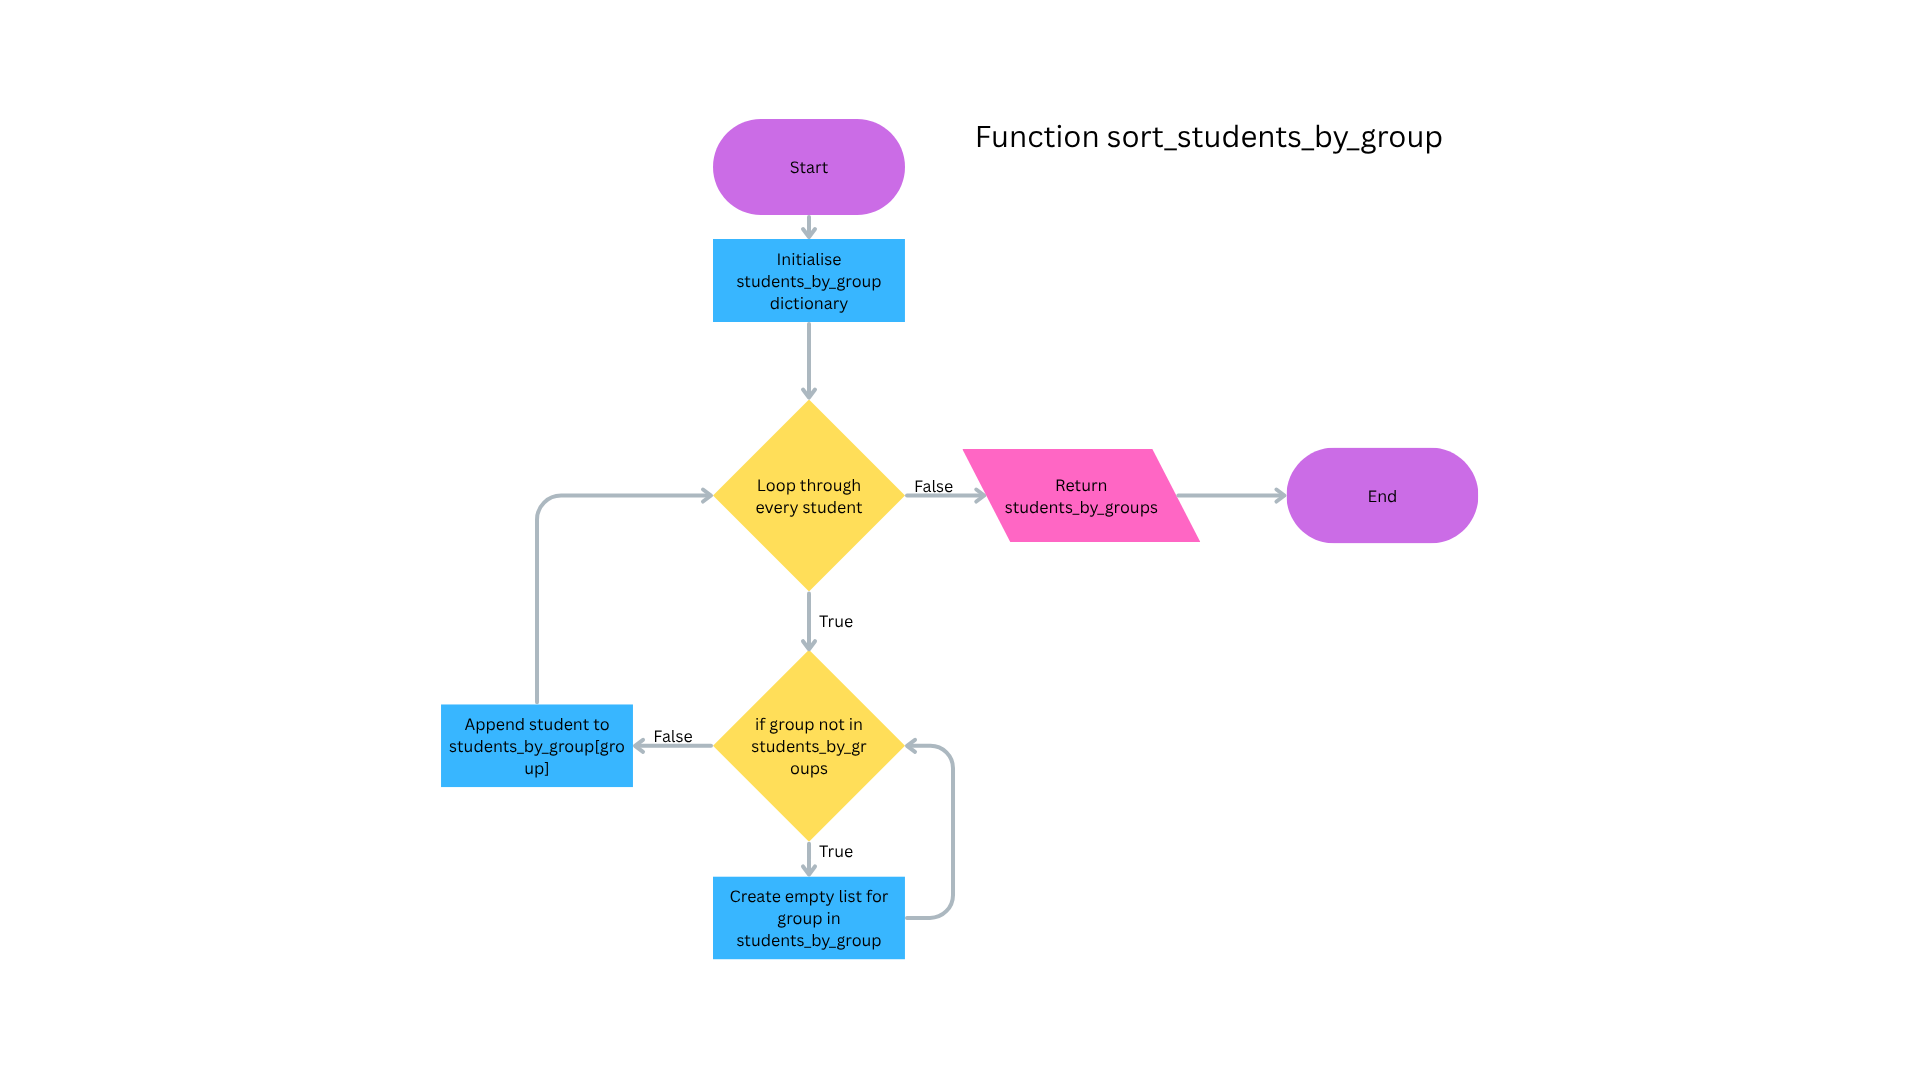

#### PSEUDOCODE

DEFINE sort_students_by_group (parameter = student list):

	INITIALIZE an empty dictionary to store all tutorial groups data

	FOR each student in the student list:

		IF the student’s tutorial group is not in the dictionary, then
			ADD the tutorial group into the dictionary as a new empty list

		APPEND student data into the tutorial group list

	END FOR
  
	RETURN the dictionary that contains all tutorial groups data


In [ ]:
def sort_students_by_group(students):
    students_by_group = {}
    for student in students:
        group = student['Tutorial Group']
        if group not in students_by_group:
            students_by_group[group] = []
        students_by_group[group].append(student)
    return students_by_group

### Function sort_by_cgpa_ascending

#### Input
- List of students with each detail of the student in a dictionary, including a numeric "CGPA" key.



#### Process: Sorting Students by CGPA (Ascending)
- Treat the first student as a sorted section.
- For each next student:
  - Temporarily store the current student.
  - Shift earlier students to the right while their "CGPA" is greater than the current student’s "CGPA".
  - Insert the current student into the correct position.



#### Output
- Reorders the original list in place from lowest to highest "CGPA".
- Returns `None`



#### Summary
This function arranges students by CGPA in ascending order, preparing the list for tasks like ranking, banding, or group assignment.

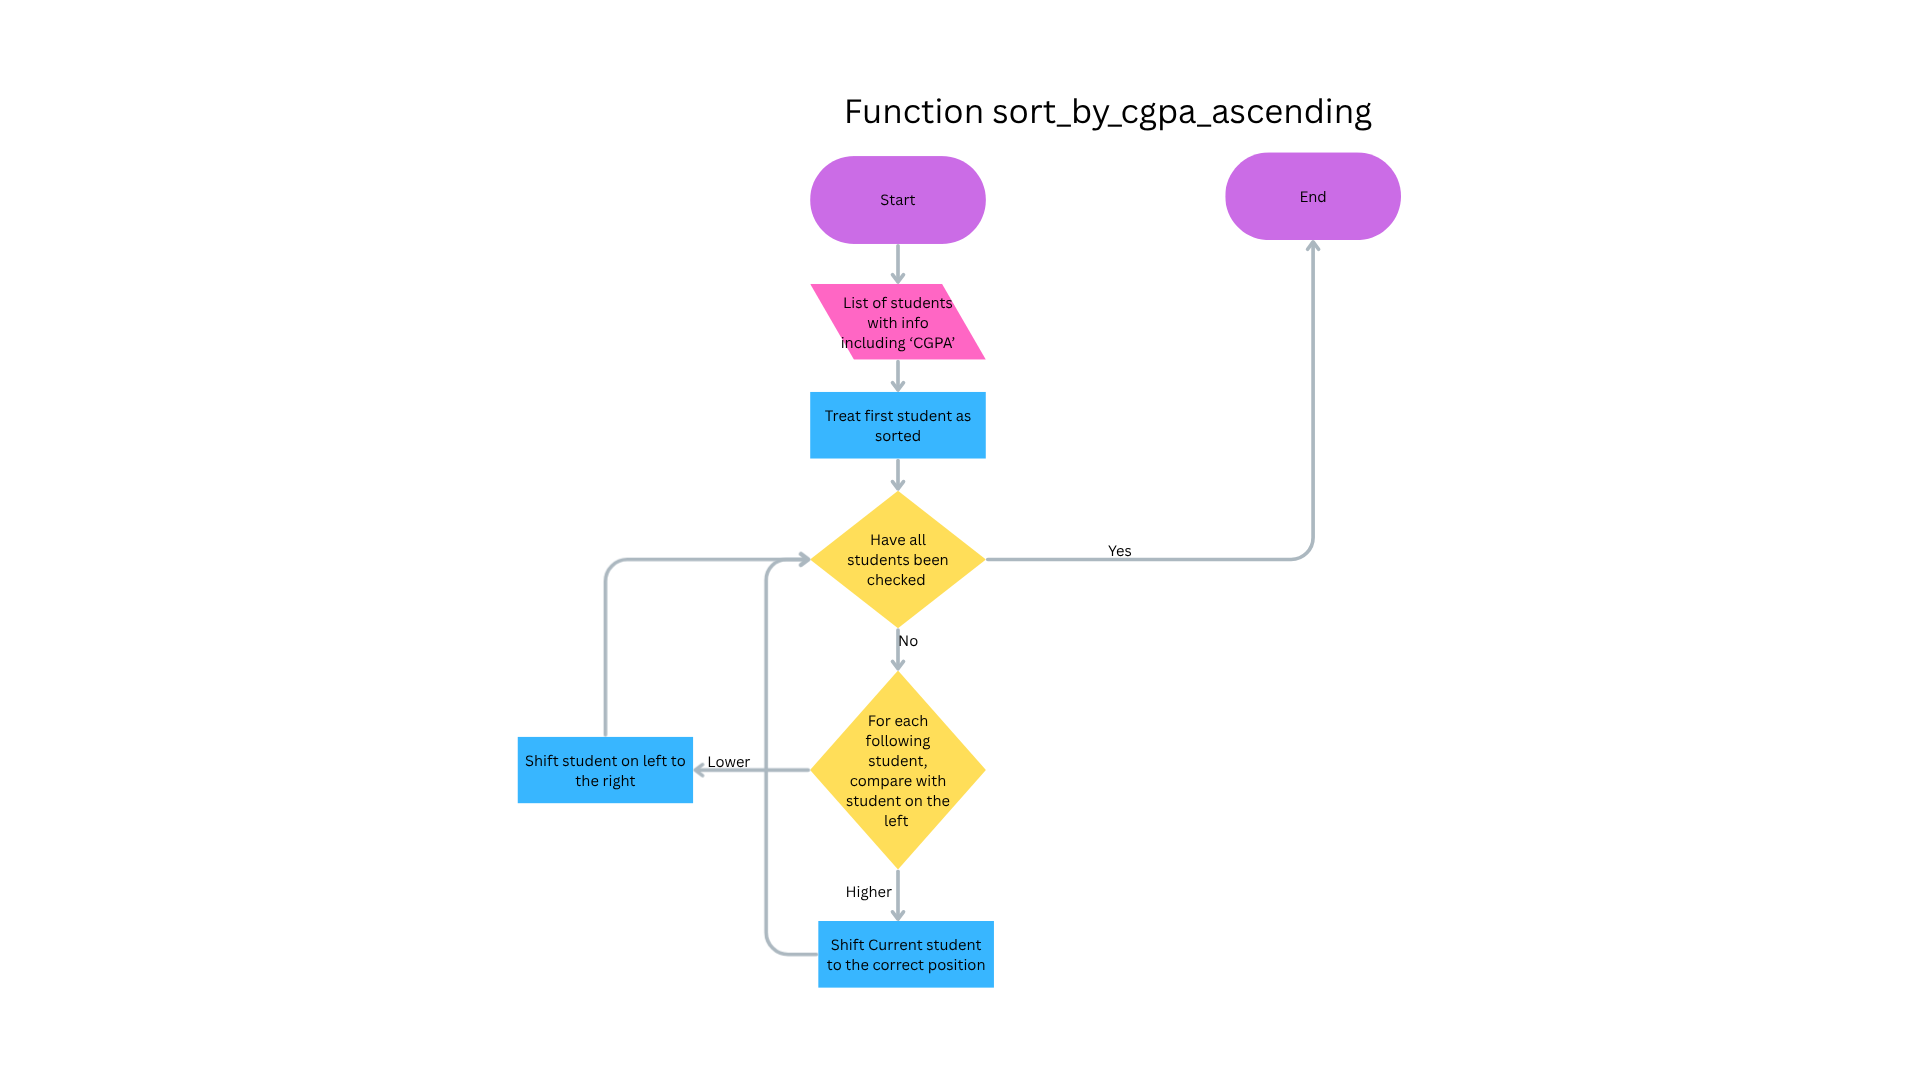

#### PSEUDOCODE

DEFINE sort_by_cgpa_ascending ( parameter = student list ):

	INITIALIZE i = 1 (sorting target)
	WHILE number of students bigger than i:
		INITIALIZE x to store the target student data
		INITIALIZE j (left side of the sorting target)
	    WHILE j >= 0 and left side (j) CGPA is higher than current student (i) CGPA:
			SWAP position, the student with higher CGPA is on the right side.
			j -= 1 ( j becomes the left side of the previous left side)
		END WHILE

		STORE the current student data into its position, index j+1
    i += 1
    END WHILE


In [ ]:
def sort_by_cgpa_ascending(students):
    i = 1
    while i < len(students):
        x = students[i] #store current student gpa
        j = i - 1
        while j >= 0 and students[j]["CGPA"] > x["CGPA"]: #compare gpa of student to the left and current student gpa
            students[j+1] = students[j] #shift larger items right
            j -= 1
        students[j+1] = x #insert current student into correct position
        i += 1

### Function split_bands_and_tag

#### Input
- `sorted_students`: a list of student dictionaries already sorted by CGPA in ascending order.



#### Process: Splitting into Bands and Tagging
- Compute the list size n and a quartile size `q` = n // 4
- Slice the list by indices:
  - Low band = bottom 25%: `sorted_students[0:q]`
  - Mid band = middle 50%: `sorted_students[q:n-q]`
  - High band = top 25%: `sorted_students[n-q:n]`
- or each student in these slices, add a `"band"` key with values "low", "mid", or "high" respectively.



#### Output
- Returns three lists: low, mid, high.
- In-place effect: Each student dictionary is updated with a new field: `s["band"]` ∈ {"low","mid","high"}.



#### Summary
This function partitions a CGPA-sorted cohort into bottom 25%, middle 50%, and top 25% by count and tags each student with their band.

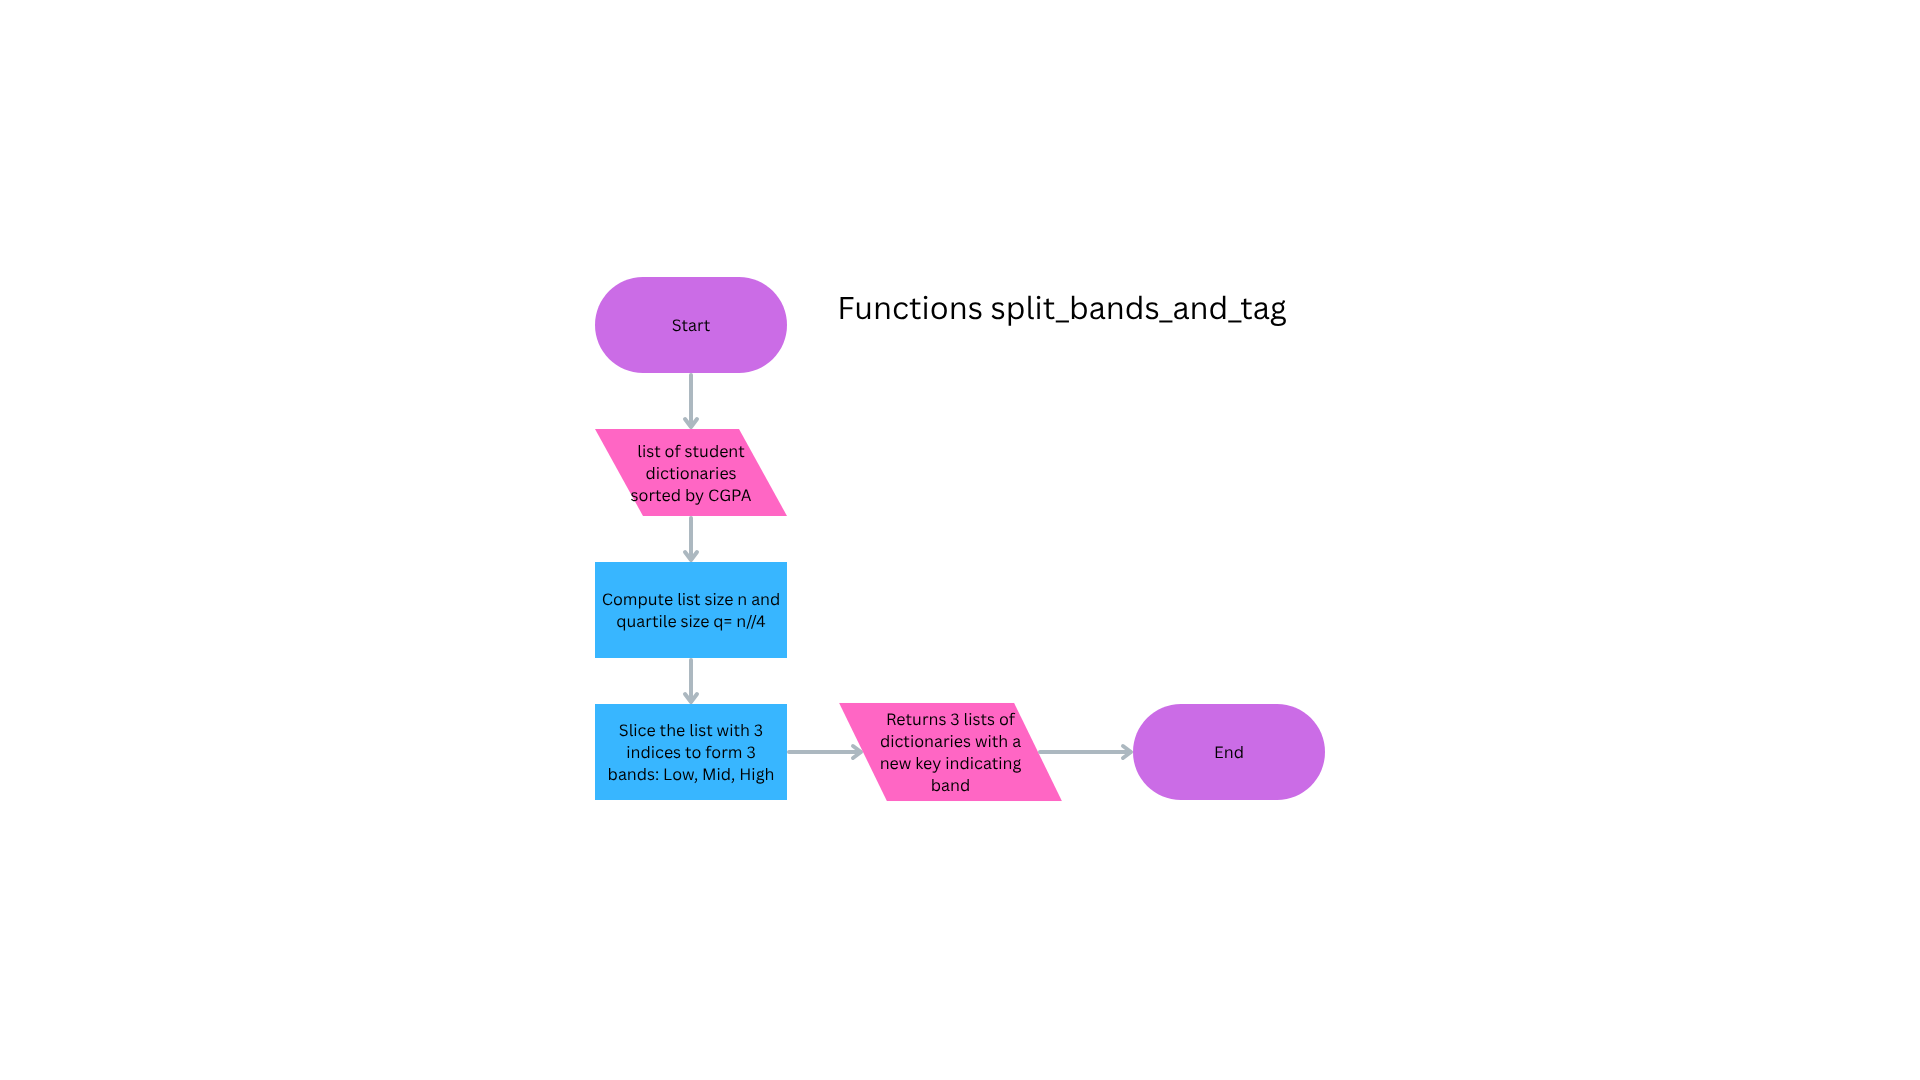

#### PSEUDOCODE

DEFINE split_bands_and_tag (parameter = cgpa sorted student list):

	INITIALIZE n = number of sorted students

	INITIALIZE q = number of students in each quartile

    SEPARATE students into 3 bands in 3 lists

    Low = the first quartile of students
    High = the fourth quartile of students
    Mid = the second and third quartile of students

    ATTRIBUTE band to each student

    RETURN Low, Mid, High lists


In [ ]:
def split_bands_and_tag(sorted_students):
    """
    Assumes 'sorted_students' sorted by CGPA ascending.
    Low  = bottom 25% by count
    High = top    25% by count
    Mid  = middle 50% by count
    Also tags each student dict with s["band"] in {"low","mid","high"}.
    """
    n = len(sorted_students)
    q = n // 4
    low  = sorted_students[0:q]
    high = sorted_students[n-q:n]
    mid  = sorted_students[q:n-q]
    for s in low:  s["band"] = "low"
    for s in mid:  s["band"] = "mid"
    for s in high: s["band"] = "high"
    return low, mid, high

## Function overall_mean

### Input
- `students`: a list of student dictionaries, each containing a numeric "CGPA" key.



### Process: Computing the Mean CGPA
- Initialize a running sum `s` = 0.0
- Iterate through the list using an index `i`, adding each `students[i]["CGPA"]` to `s`.
- After the loop, divide the total `s` by the number of students `len(students)`.



### Output
- Returns the average CGPA (a float).
- If students is empty, returns 0.0 to avoid division by zero.


### Summary
This function scans the list once to compute the mean CGPA.

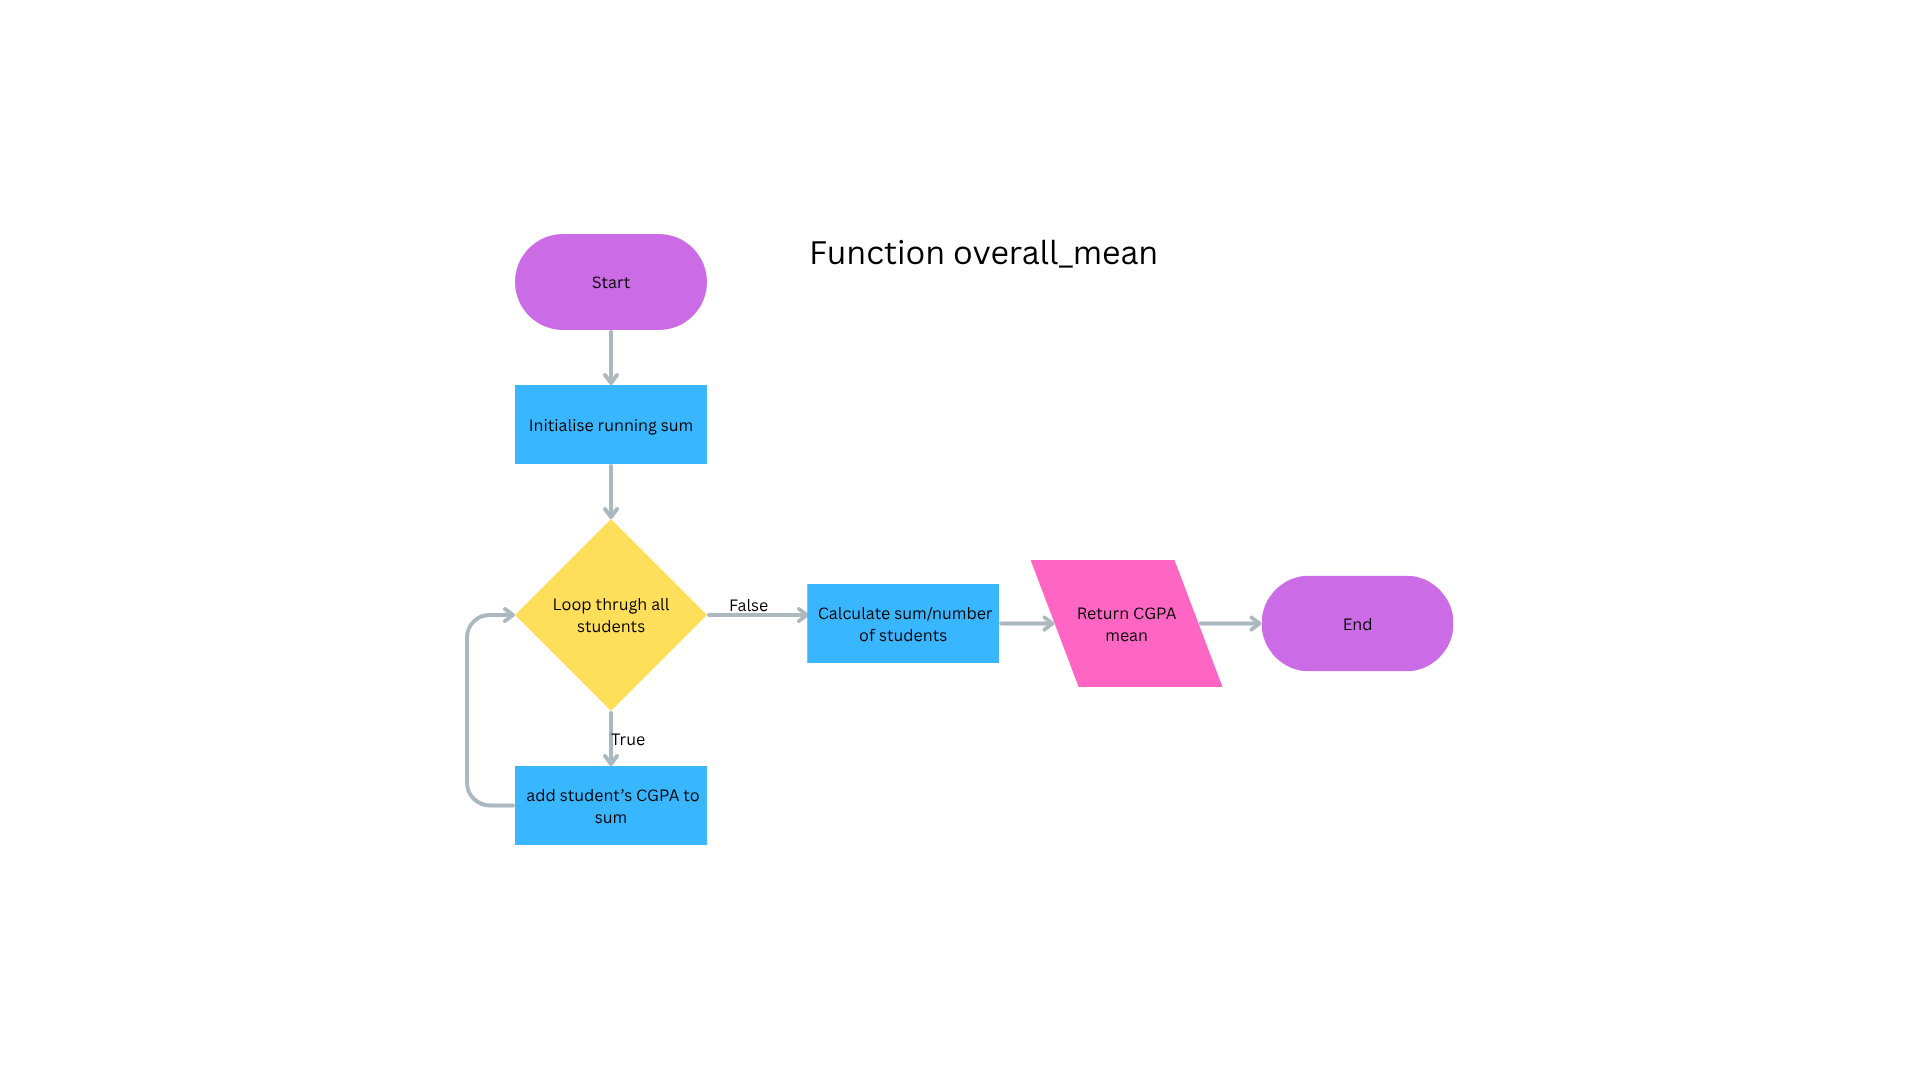

### PSEUDOCODE

DEFINE overall_mean (parameter = student list):

    INITIALIZE s = 0
	INITIALIZE a counter = 0

	WHILE counter < number of students:

		ADD student CGPA into s
		i += 1

	mean = s / number of students

	RETURN mean


In [ ]:
def overall_mean(students):
    s = 0.0
    i = 0
    while i < len(students):
        s += students[i]["CGPA"]
        i += 1
    return s / len(students) if students else 0.0 #returns 0 if list is empty to avoid ZeroDivisionError

## Function even_group_sizes

### Input
- `total_students`: total number of students to distribute.
- `desired_size`: target size for each group.



### Process: Compute the Tightest Distribution Around desired_size
- Validate inputs: raise ValueError if either argument is non-positive.
- If `total_students` is exactly divisible by `desired_size`:
  - Computes number of groups:
    - `num_groups` = `total_students` / `desired_size`
  - Build array `sizes` = `[desired_size]` * `num_groups`
  - Build string `msg` = "Even split: `num_groups` groups of `desired_size`"
  - Return both `sizes` and `msg`
- Else:
  - Compute number of groups:
    - `num_groups` = math.ceil(`total_students` / `desired_size`)
  - Compute minimum number of students each group should have:
    - `base` = `total_students` // `num_groups`
  - Compute remainder (number of groups that get one extra):
    - `rem` = `total_students` % `num_groups`
  - Build array `sizes` = [`base`] * (`num_groups` - `rem`) + [`base` + 1] * `rem`
  - Build string `msg` = "Using `num_groups` groups: A group(s) of base and B group(s) of base+1."



### Output
- `sizes` (list of int): the computed group sizes.
- `msg` (str): a human-readable summary of the distribution.


### Summary
This function divides students into groups as evenly as possible around a target size. It returns an exact split when possible.

Otherwise, it produces a near-even mix of `base` and `base`+1 sized groups so no two groups differ by more than one member, along with a clear summary message.

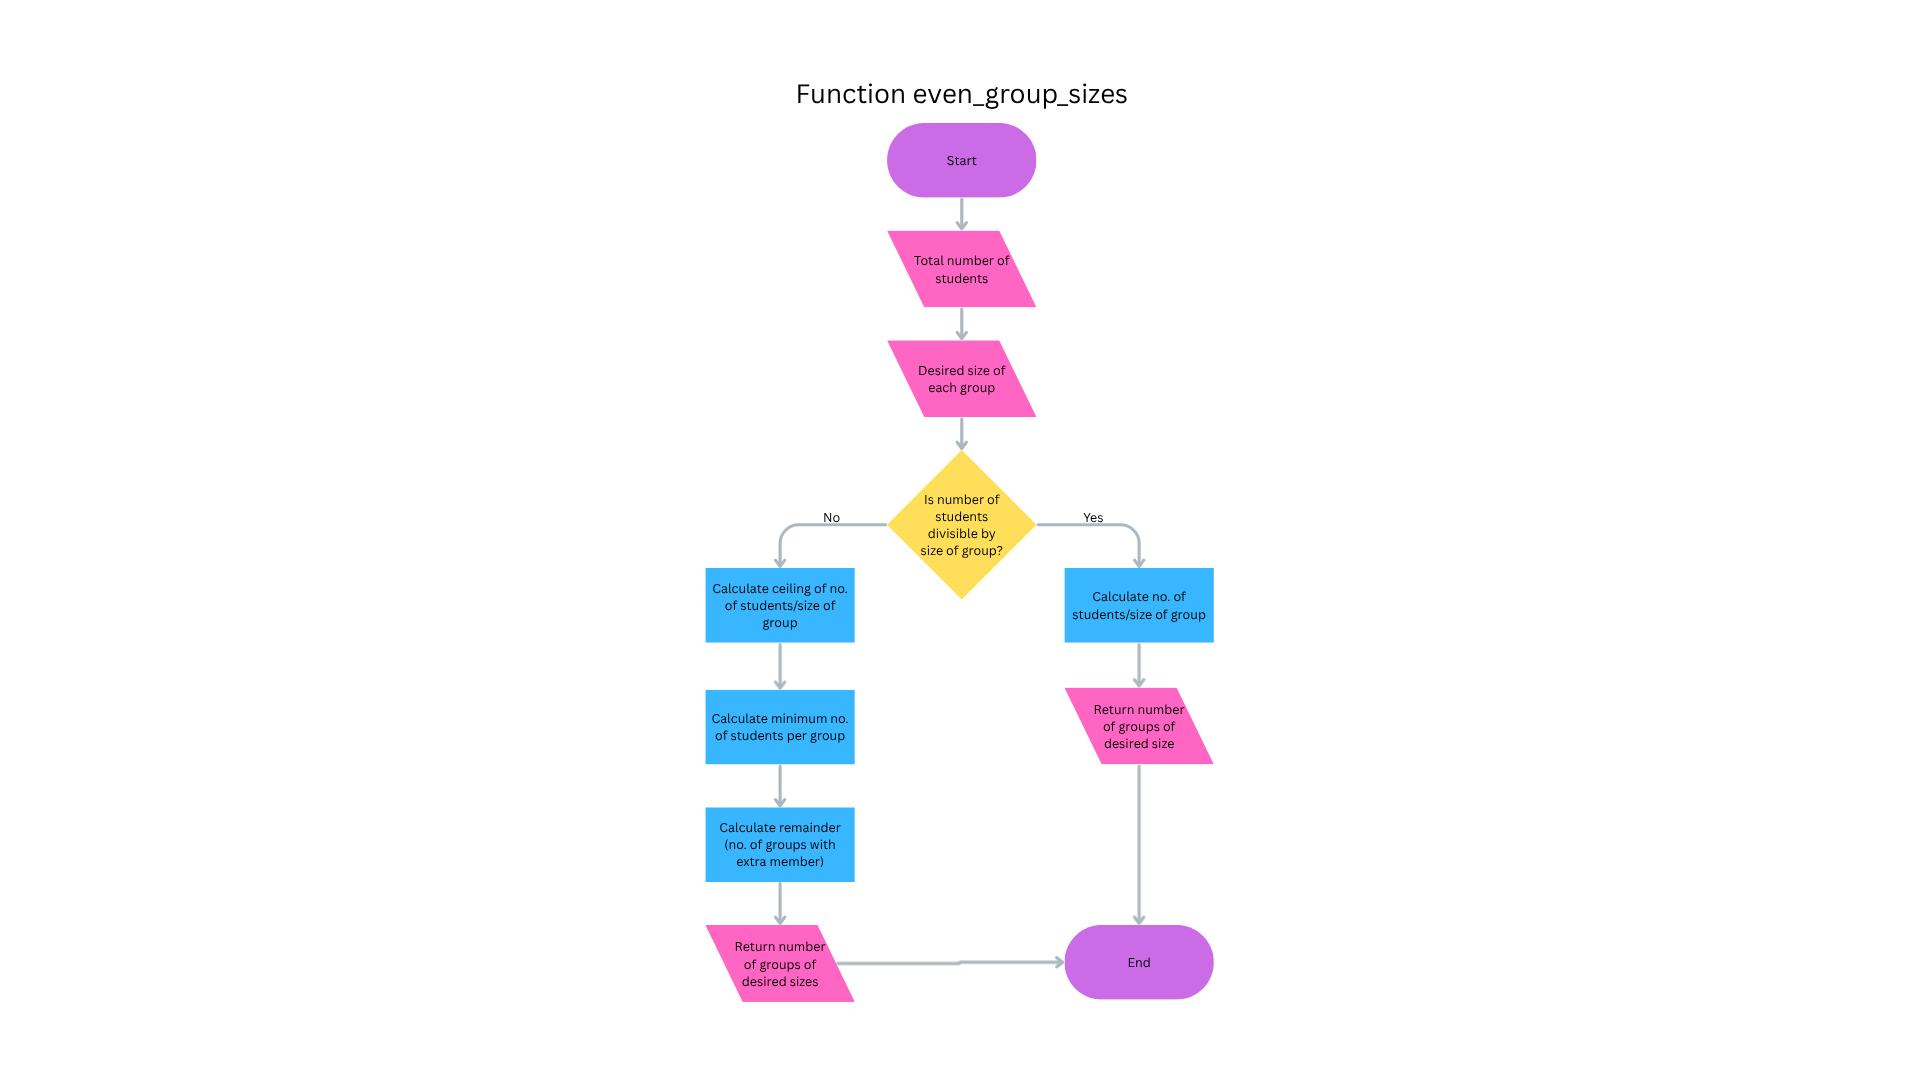

### PSEUDOCODE

DEFINE even_group_sizes (parameter = total number of students,desired size of group):
    
    IF total number of students and desired size of group <= 0, then
		RAISE ValueError
	END IF

    // Case 1: Perfectly divisible (even split)
	IF total number of students is divisible by desired size of group, then
		num_group = numstudent divided by desired size
		Size_for_each_grp = [desired size]*num_group
		RETURN size_for_each_grp
	END IF


    // Case 2: Not evenly divisible
	IF total number of students is not divisible by desired group size, then
		Num group = ceiling of numstudent / desired size
		Base number of students for each grp = numstudent // num_group
		Remainder = numstudent % num_group
		Size_for_each_grp = [grp that have base num] + [grp that have extra 1 member]
		Grp_base_num = num_grp - remainder
		Grp_extra_one = rem
		Print number of grp_base_num and grp_extra_one
		RETURN size_for_each_grp
	END IF


In [ ]:
def even_group_sizes(total_students, desired_size):
    """
    Tightest distribution around desired_size: sizes differ by at most 1.
    Returns ([sizes], message).
    """
    if total_students <= 0 or desired_size <= 0:
        raise ValueError("Inputs must be positive.")

    if total_students % desired_size == 0:
        num_groups = total_students // desired_size
        sizes = [desired_size]*num_groups
        msg = f"Even split: {num_groups} groups of {desired_size}."
        return sizes, msg

    num_groups = math.ceil(total_students / desired_size)
    base = total_students // num_groups
    rem  = total_students %  num_groups
    sizes = [base] * (num_groups - rem) + [base + 1] * rem

    small_cnt = num_groups - rem #count how many groups have the base size
    big_cnt   = rem #counts how many groups have the bigger size
    parts = []
    if small_cnt > 0:
        parts.append(f"{small_cnt} group{'s' if small_cnt!=1 else ''} of {base}") #s' if small_cnt!=1 else '' just does pluralisation
    if big_cnt > 0:
        parts.append(f"{big_cnt} group{'s' if big_cnt!=1 else ''} of {base+1}")
    msg = f"Using {num_groups} groups: " + " and ".join(parts) + "."
    return sizes, msg

## Count Functions

### Function count_band_in_group

#### Input
- `group`: a list of student dictionaries. Each student must have a `"band"` key with value "low", "mid", or "high".

#### Process: Counting Students per Band
- Initialise a counter dictionary `d` = {'low': 0, 'mid': 0, 'high': 0}
- Iterate through the list by index `i`:
Look up the student’s band with `group[i]["band"]`
- Increment the corresponding counter in `d`
- Continue until all students are processed.

#### Output
- Returns a dictionary with counts for each band:
{'low': *count*, 'mid': *count*, 'high': *count*}.

#### Summary
This function tallies how many students in a group fall into each band (low, mid, high).

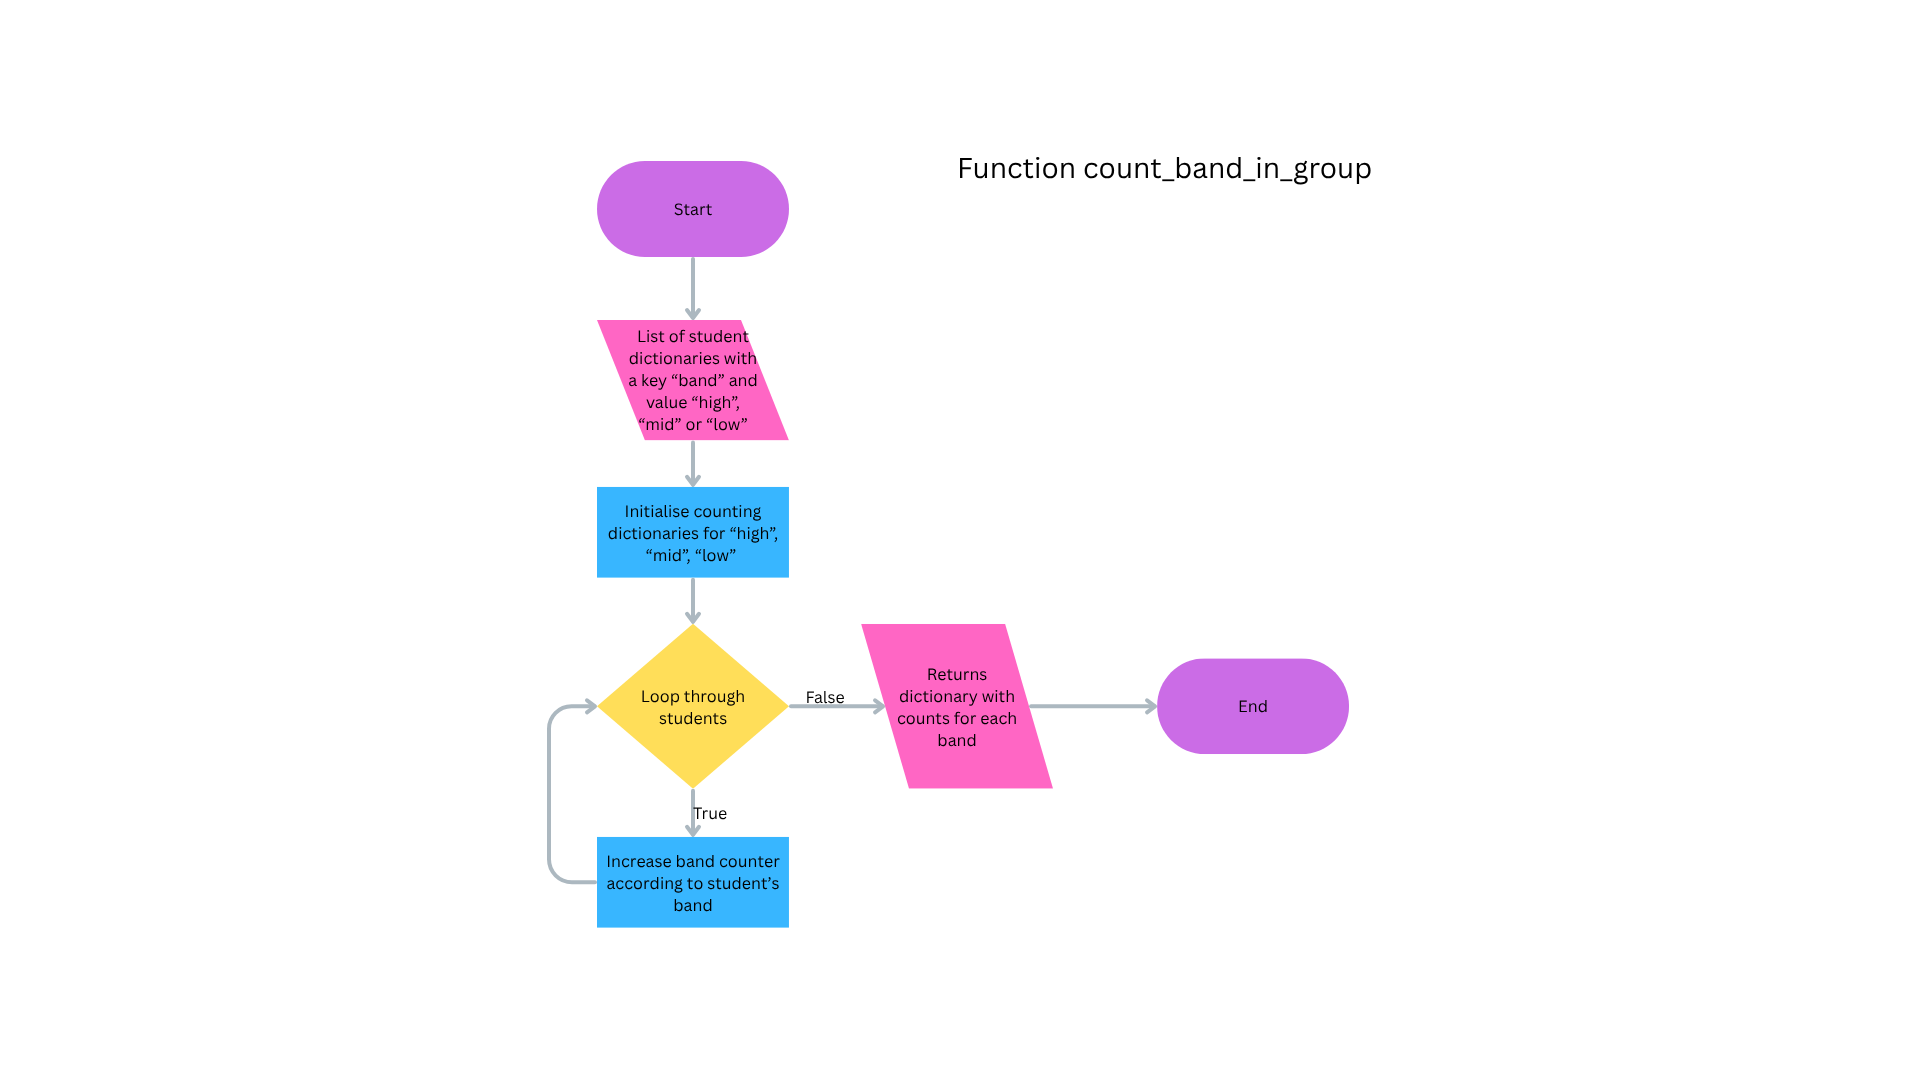

#### PSEUDOCODE

DEFINE count_band_in_group ( parameter = grouplist ):

	INITIALIZE an empty dictionary to store number of students in each band
	INITIALIZE a counter = 0
	WHILE counter < number of students in each tut grp:
		INCREMENT each band number according to the students’ band
		counter += 1
    END WHILE
	RETURN dictionary containing band numbers


In [ ]:
def count_band_in_group(group):
    d = {'low':0,'mid':0,'high':0}
    i = 0
    while i < len(group):
        d[group[i]["band"]] += 1
        i += 1
    return d

### Function count_gender_in_group

#### Input
- `group`: a list of student dictionaries. Each student should have a `"Gender"` key with value "male" or "female"

#### Process: Counting Students per Gender

- Initialize an empty dictionary `d` = {} to store counts
- Iterate through the list by index `i`:
  - Read the student’s gender:
    - `g` = `group[i]["Gender"]`
  - Increment its count with `d[g]` = `d.get(g, 0)` + 1
    - creates the key at 0 if it’s not present yet, then adds 1
- Continue until all students are processed


#### Output
- Returns a dictionary mapping each observed gender value to its count, e.g.:
{'male': 12, 'female': 10}

#### Summary
This function tallies how many students belong to each gender.

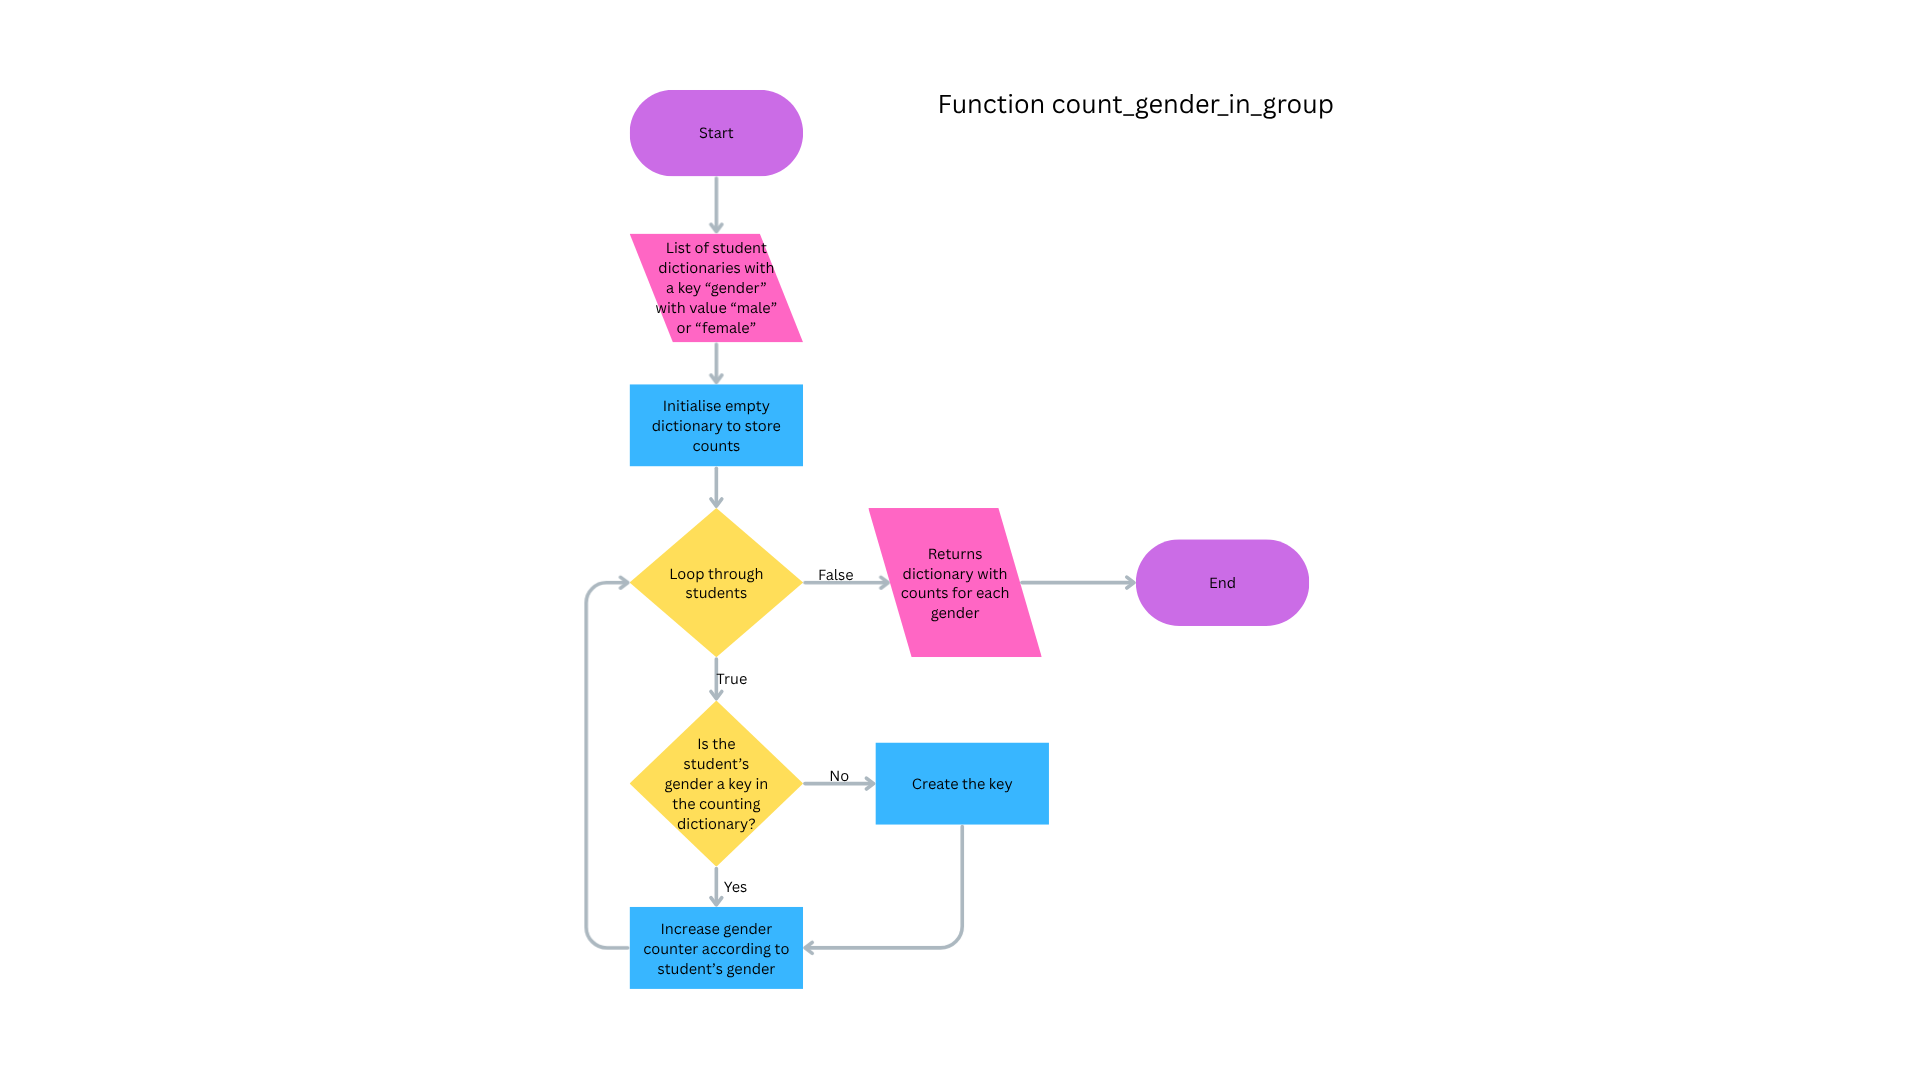

#### PSEUDOCODE

DEFINE count_gender_in_group ( parameter = grouplist ):

	INITIALIZE d = { }
	INITIALIZE counter = 0
	WHILE counter < number of students in tut grp:
		Count number of female
		Count number of boys
		ADD gender : count pair into d
		Counter += 1
	END WHILE
	RETURN d


In [ ]:
def count_gender_in_group(group):
    d = {}
    i = 0
    while i < len(group):
        g = group[i]["Gender"]
        d[g] = d.get(g, 0) + 1 #creates the key at 0 if it’s not present yet, then adds 1
        i += 1
    return d

### Function count_school_in_group

#### Input
- `group`: a list of student dictionaries. Each student should have a `"School"` key

#### Process: Counting Students per Gender

- Initialize an empty dictionary `d` = {} to store counts
- Iterate through the list by index `i`:
  - Read the student’s school:
    - `s` = `group[i]["School"]`
  - Increment its count with `d[s]` = `d.get(s, 0)` + 1
    - creates the key at 0 if it’s not present yet, then adds 1
- Continue until all students are processed


#### Output
- Returns a dictionary mapping each observed school value to its count, e.g.:
{'CCDS': 12, 'MAE': 10, 'MSE': 15}

#### Summary
This function tallies how many students belong to each school.

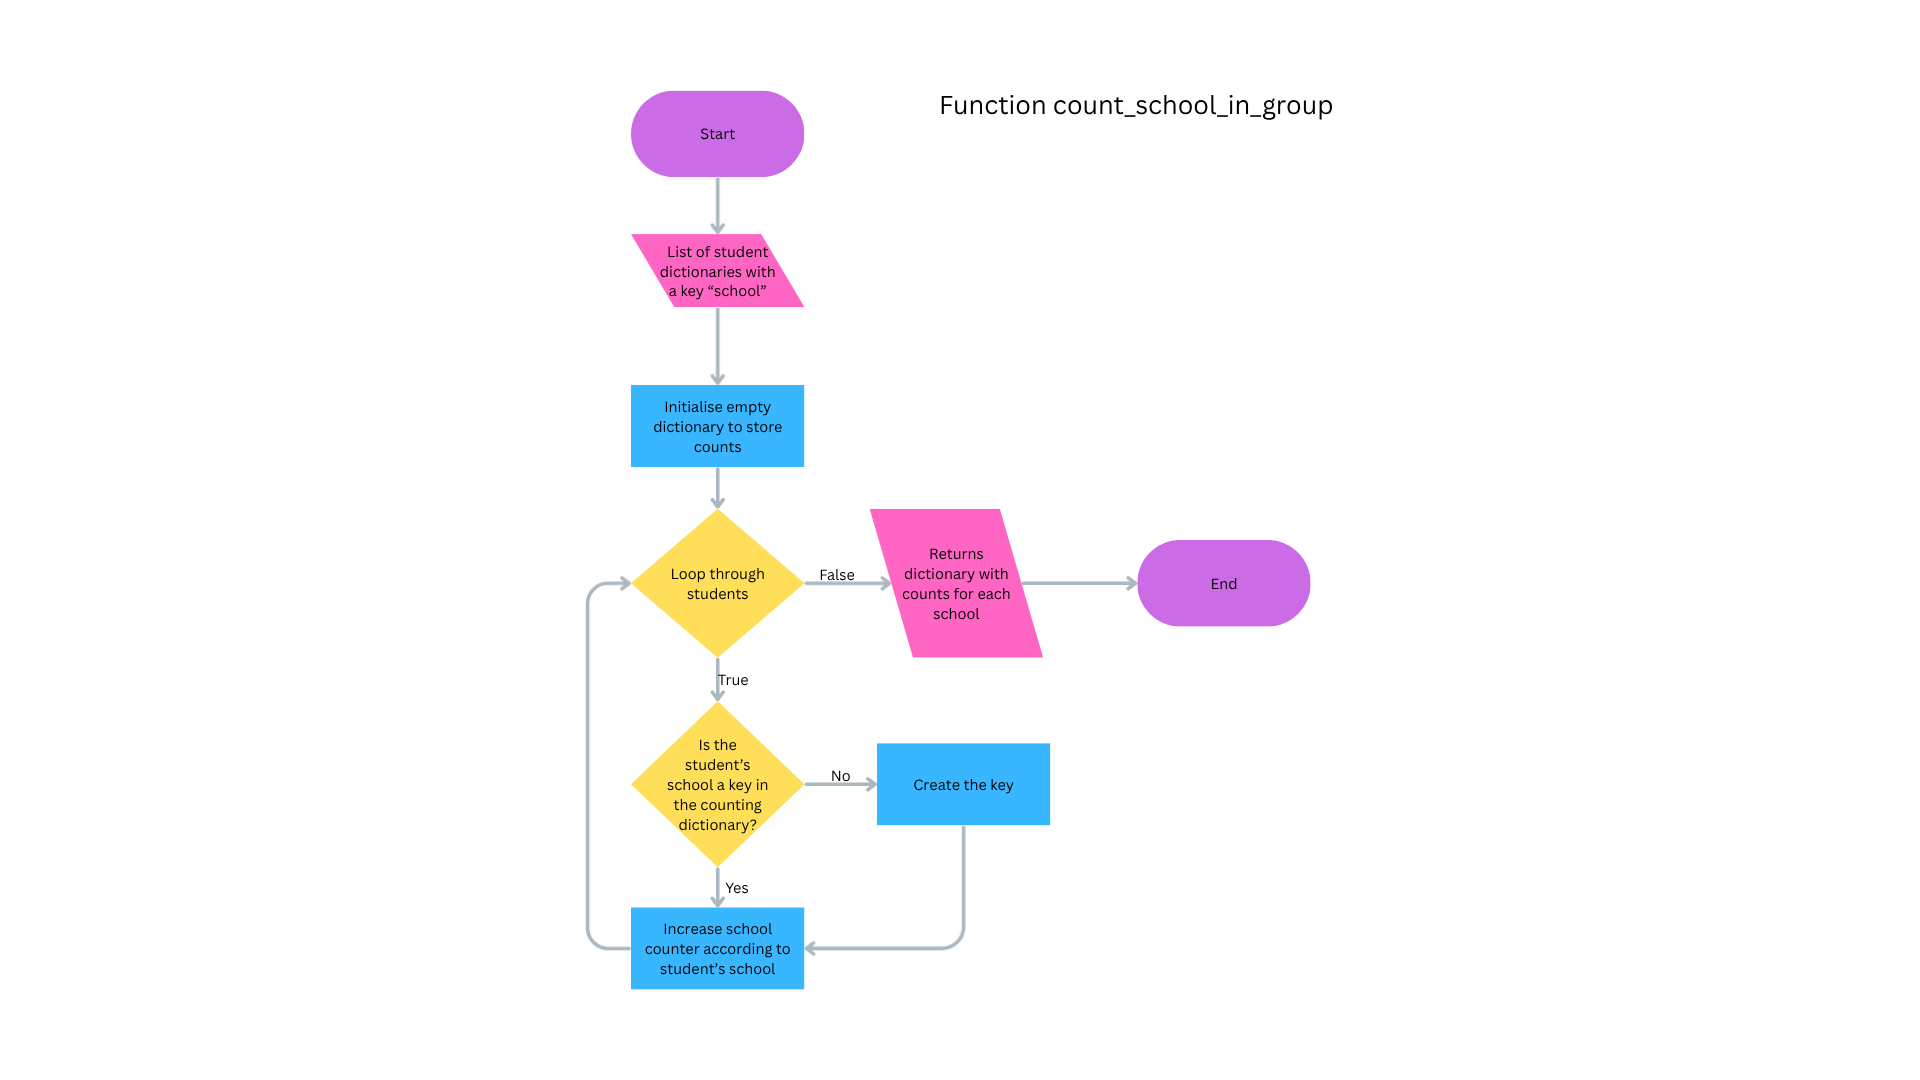

#### PSEUDOCODE

DEFINE count_school_in_group (parameter = grouplist):

	INITIALIZE d = {}
	INITIALIZE counter = 0
	WHILE counter < number of students in tut grp:
		Count the number of students from each school
		Add the school : count pairs into d
		Counter += 1
	END WHILE
	RETURN d


In [ ]:
def count_school_in_group(group):
    d = {}
    i = 0
    while i < len(group):
        s = group[i]["School"]
        d[s] = d.get(s, 0) + 1 #creates the key at 0 if it’s not present yet, then adds 1
        i += 1
    return d

## Minority Gender Functions

### Function detect_minority_gender

#### Input
- `students`: a list of student dictionaries. Each student should include a `"Gender"` key

#### Process: Find the Minority Gender (with Tie Rule)
- Compute counts by gender using **count_gender_in_group** function
- Extract the keys in dict into a list using `.keys()`
- Initialize the current minority as the first encountered gender: `mn = keys[0]`
- Scan through remaining genders:
   - If counts are equal:
     - Return the first encountered gender and its count
  - Else:
    - Return the minority gender and its count

#### Output
- `mn`: the gender label with the smallest count, or None if no gender data.
- `genders[mn]`: the corresponding count (0 if no data).

#### Summary
This function identifies and returns the least-represented gender in the list and its count.

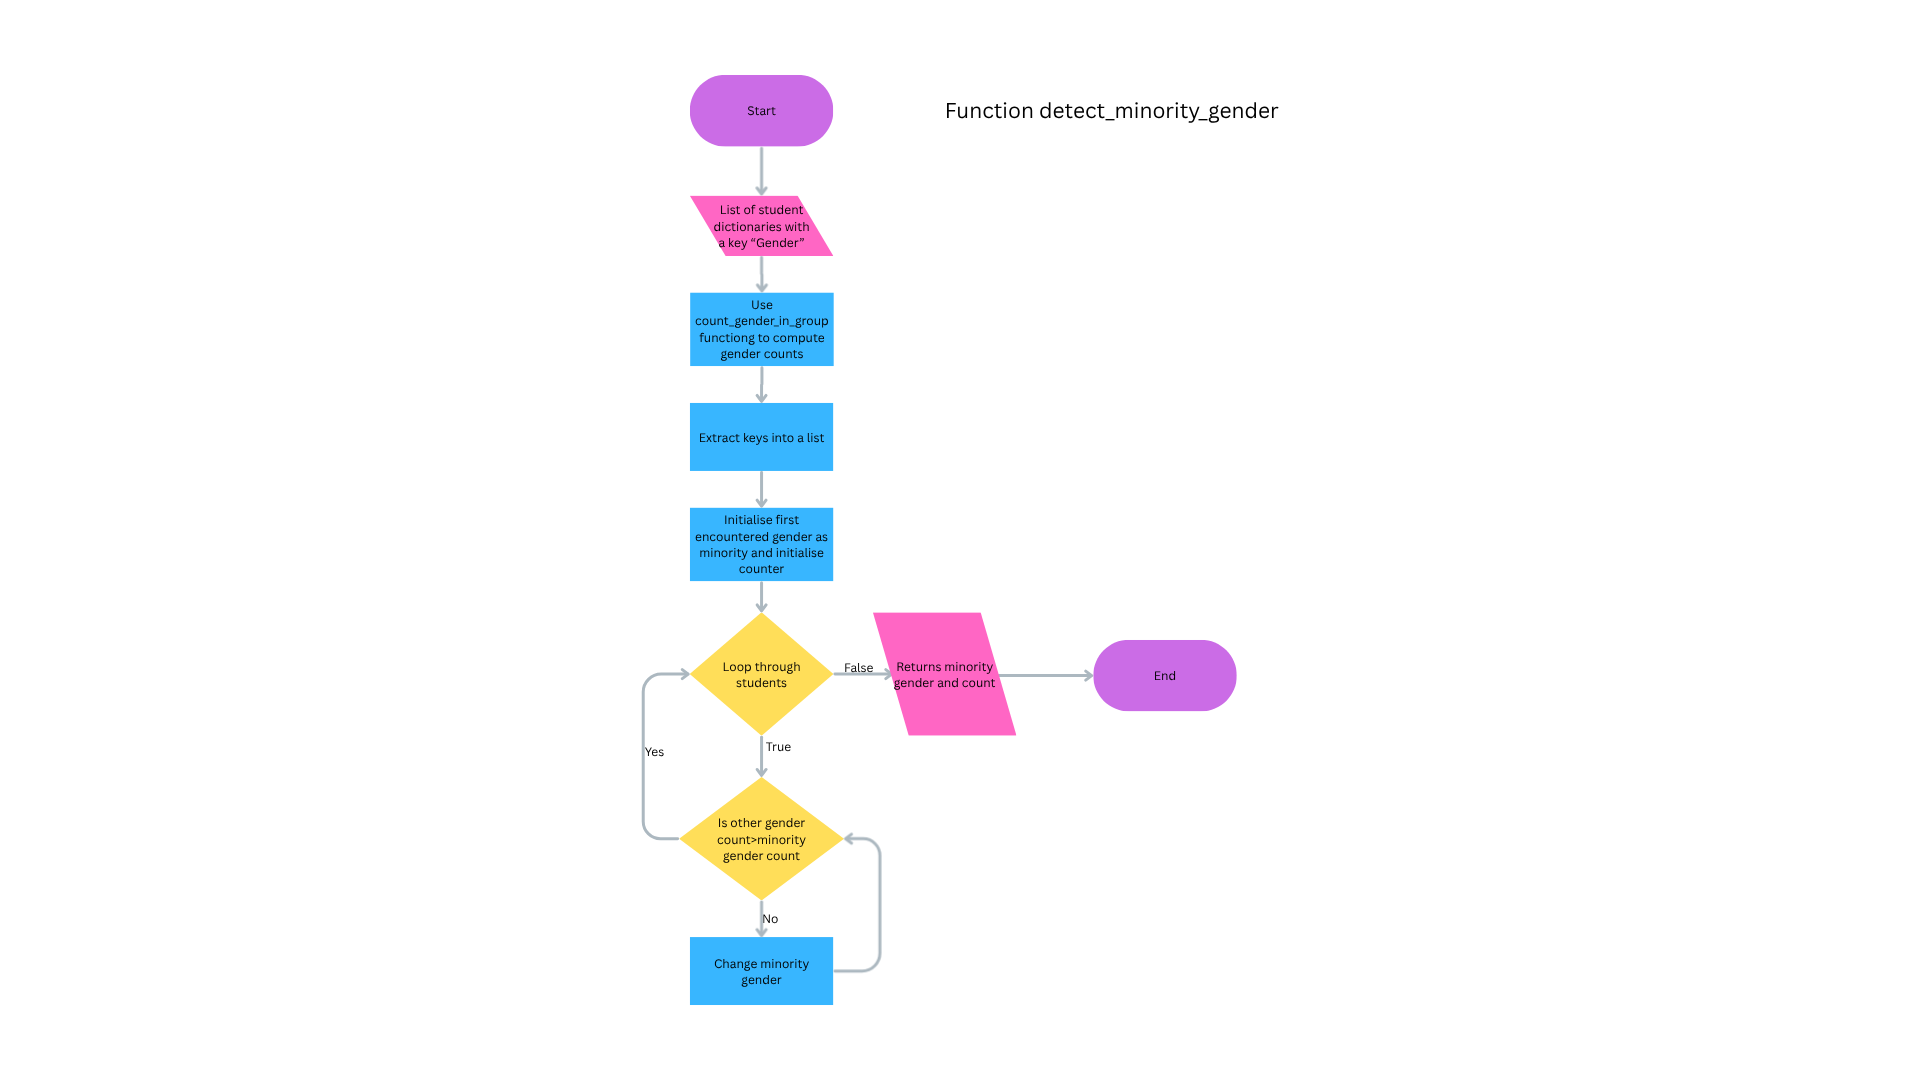

#### PSEUDOCODE

DEFINE detect_minority_gender (parameter = grouplist):

	// COUNT number for each gender for each tutorial group
	Num = count_school_in_group (grouplist)  #return a dictionary containing gender:count pair for a tut grp#
	EXTRACT keys in dictionary (Num) into a list
	INITIALIZE minority = first encountered gender
	INITIALIZE counter = 1
	WHILE counter < number of genders (num of keys in the list):
		INITIALIZE k = second gender
		IF second gender count < first gender count, then
			minority = second gender
        END IF
		counter += 1
	END WHILE
	RETURN minority gender and its count



In [ ]:
def detect_minority_gender(students):
    """
    Return (minority_gender, minority_total). On exact tie, return first encountered key.
    If no gender info, returns (None, 0).
    """
    genders = count_gender_in_group(students)
    keys = list(genders.keys())
    if not keys:
        return None, 0
    mn = keys[0]
    i = 1
    while i < len(keys):
        k = keys[i]
        if genders[k] < genders[mn]:
            mn = k
        i += 1
    return mn, genders[mn]

### Function build_minority_caps

#### Intent
- To figure out the minimum and maxmimum number of minority gender each group should have for groups to be evenly distributed

#### Input
- `sizes`: a list of integers representing the intended sizes of each group (only its length is used here).
- `students`: a list of student dictionaries. Each student should have a `"Gender"` key so the minority gender can be detected.

#### Process: Floors-First, Uniform Ceiling (No Remainder Pre-Distribution)
- Compute number of groups: `num_groups = len(sizes)`
- Find the minority gender and its total count using Function **detect_minority_gender**:
    - minority_gender, minority_total = detect_minority_gender(students)
- Compute the guaranteed floor per group: `floor_min = minority_total // num_groups`
- Compute remainder: `rem = minority_total % num_groups`
- Set a uniform per-group cap:
- If `rem > 0`, `cap_per_group = floor_min + 1`
- Else, `cap_per_group = floor_min`

#### Output
- `minority_gender`: the detected minority gender label
- `floor_min`: the guaranteed minimum minority members of the minority gender per group if distributed evenly
- `[cap_per_group] * num_groups`: Minority gender cap per group

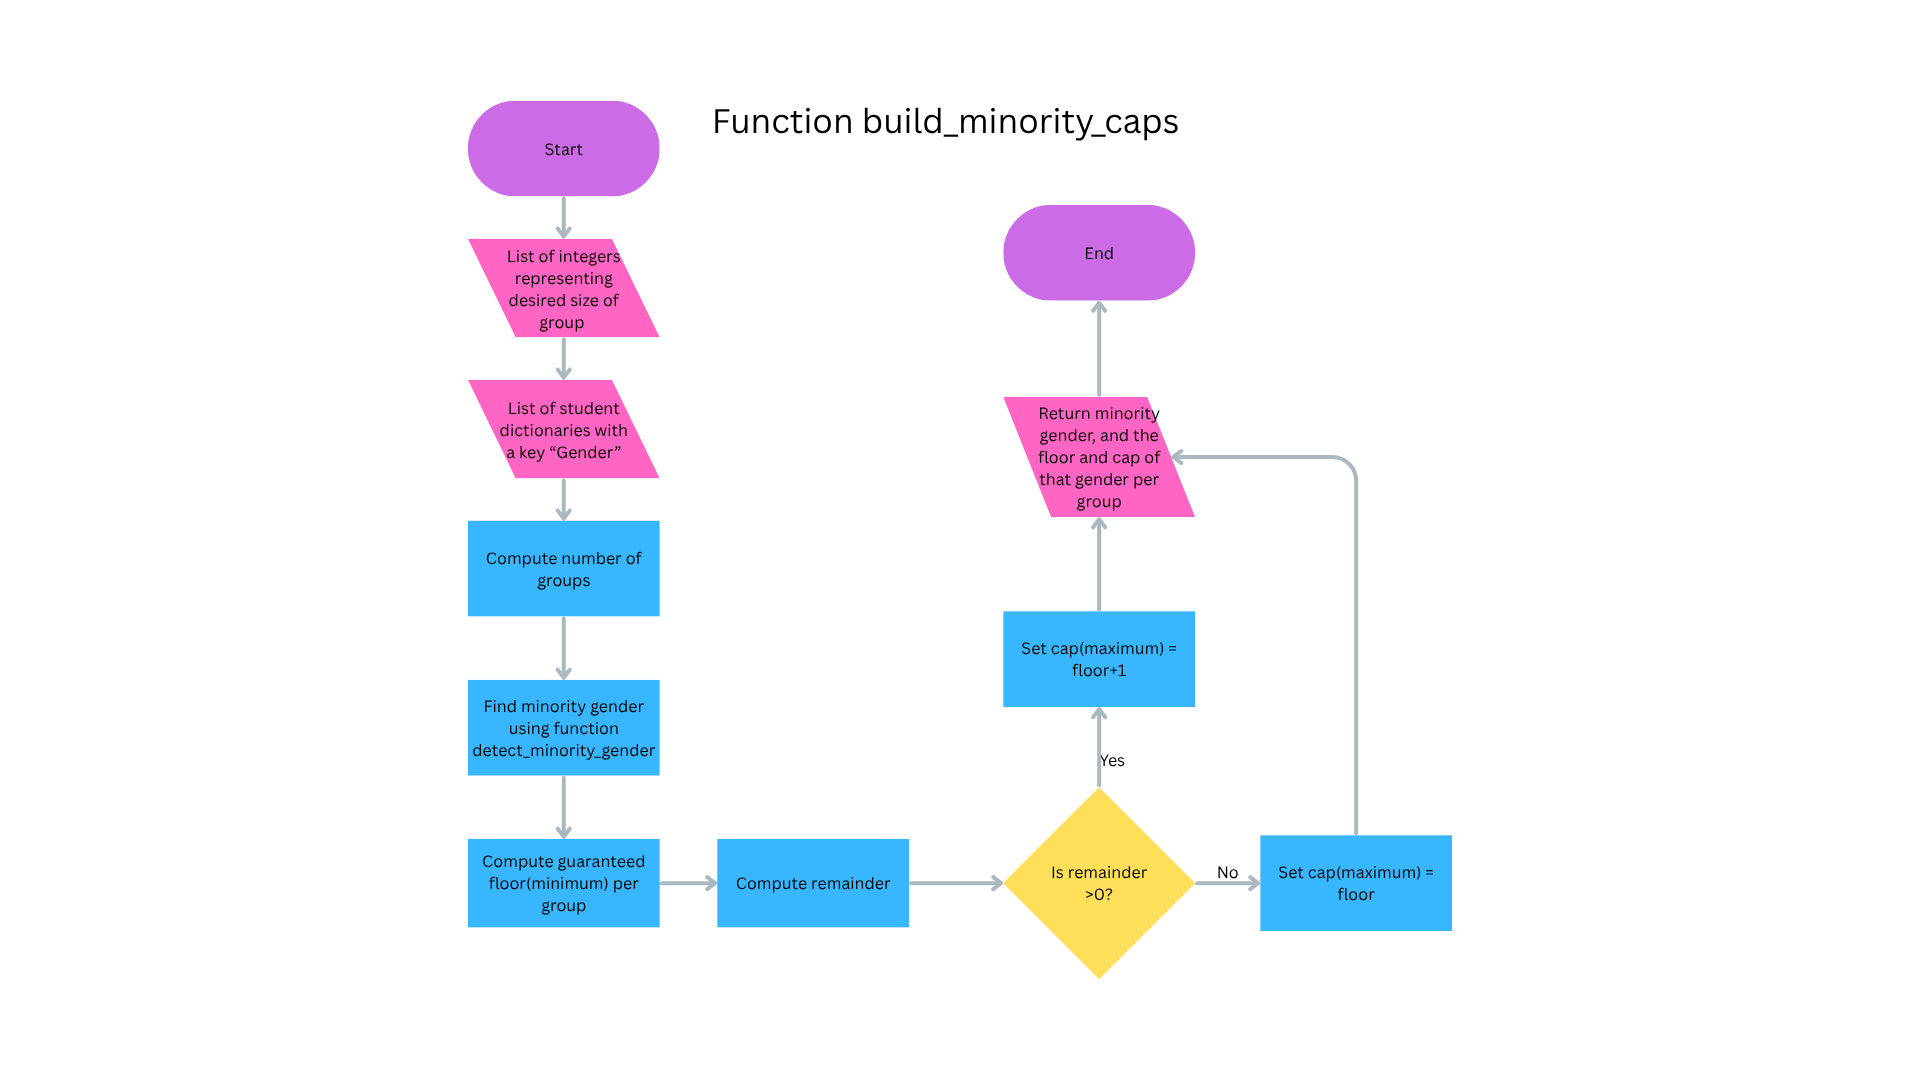

### PSEUDOCODE

DEFINE build_minority_caps(parameters = size_for_each_grp, students):

    SET num_group = length(size_for_each_grp)
    minority_gender,minority_count = detect_minority_gender(students)
    IF there is no minority_gender and minority_count, THEN
        RETURN None
    END IF
    
    // COUNT the base number of minority gender in each team
    floor_min = minority_count // num_group
    remainder = minority_count % num_group
    // COUNT the possible maximum number of minority gender in a team
    IF remainder > 0 (not evenly distributed), THEN
        cap_per_group = floor_min + 1
    ELSE
        cap_per_group = floor_min
    END IF
    
    RETURN minority_gender, floor_min, [cap_per_group]*num_group

In [ ]:
def build_minority_caps(sizes, students):
    """
    Floors-first, no pre-distribution of remainders:
      - floor_min = M // G
      - cap_per_group = floor_min + 1 if (M % G != 0) else floor_min
    Uniform ceiling vector returned.
    """
    num_groups = len(sizes)
    minority_gender, minority_total = detect_minority_gender(students)
    if minority_gender is None or num_groups == 0:
        return None, 0, [0]*num_groups

    floor_min = minority_total // num_groups
    rem = minority_total % num_groups
    cap_per_group = floor_min + 1 if rem > 0 else floor_min
    return minority_gender, floor_min, [cap_per_group] * num_groups

### Function is_minority

#### Intent
- Determine whether a given student belongs to the specified **minority gender**.

#### Input
- `student` (dict): must include a `"Gender"` key
- `minority_gender`: the label of the minority gender to check against. If `None`, no minority is considered.

#### Process
- Evaluate the boolean expression:  
  `minority_gender is not None and student["Gender"] == minority_gender`

#### Output
- Returns `True` if a minority gender is defined **and** the student’s `"Gender"` matches it. Otherwise returns `False`.



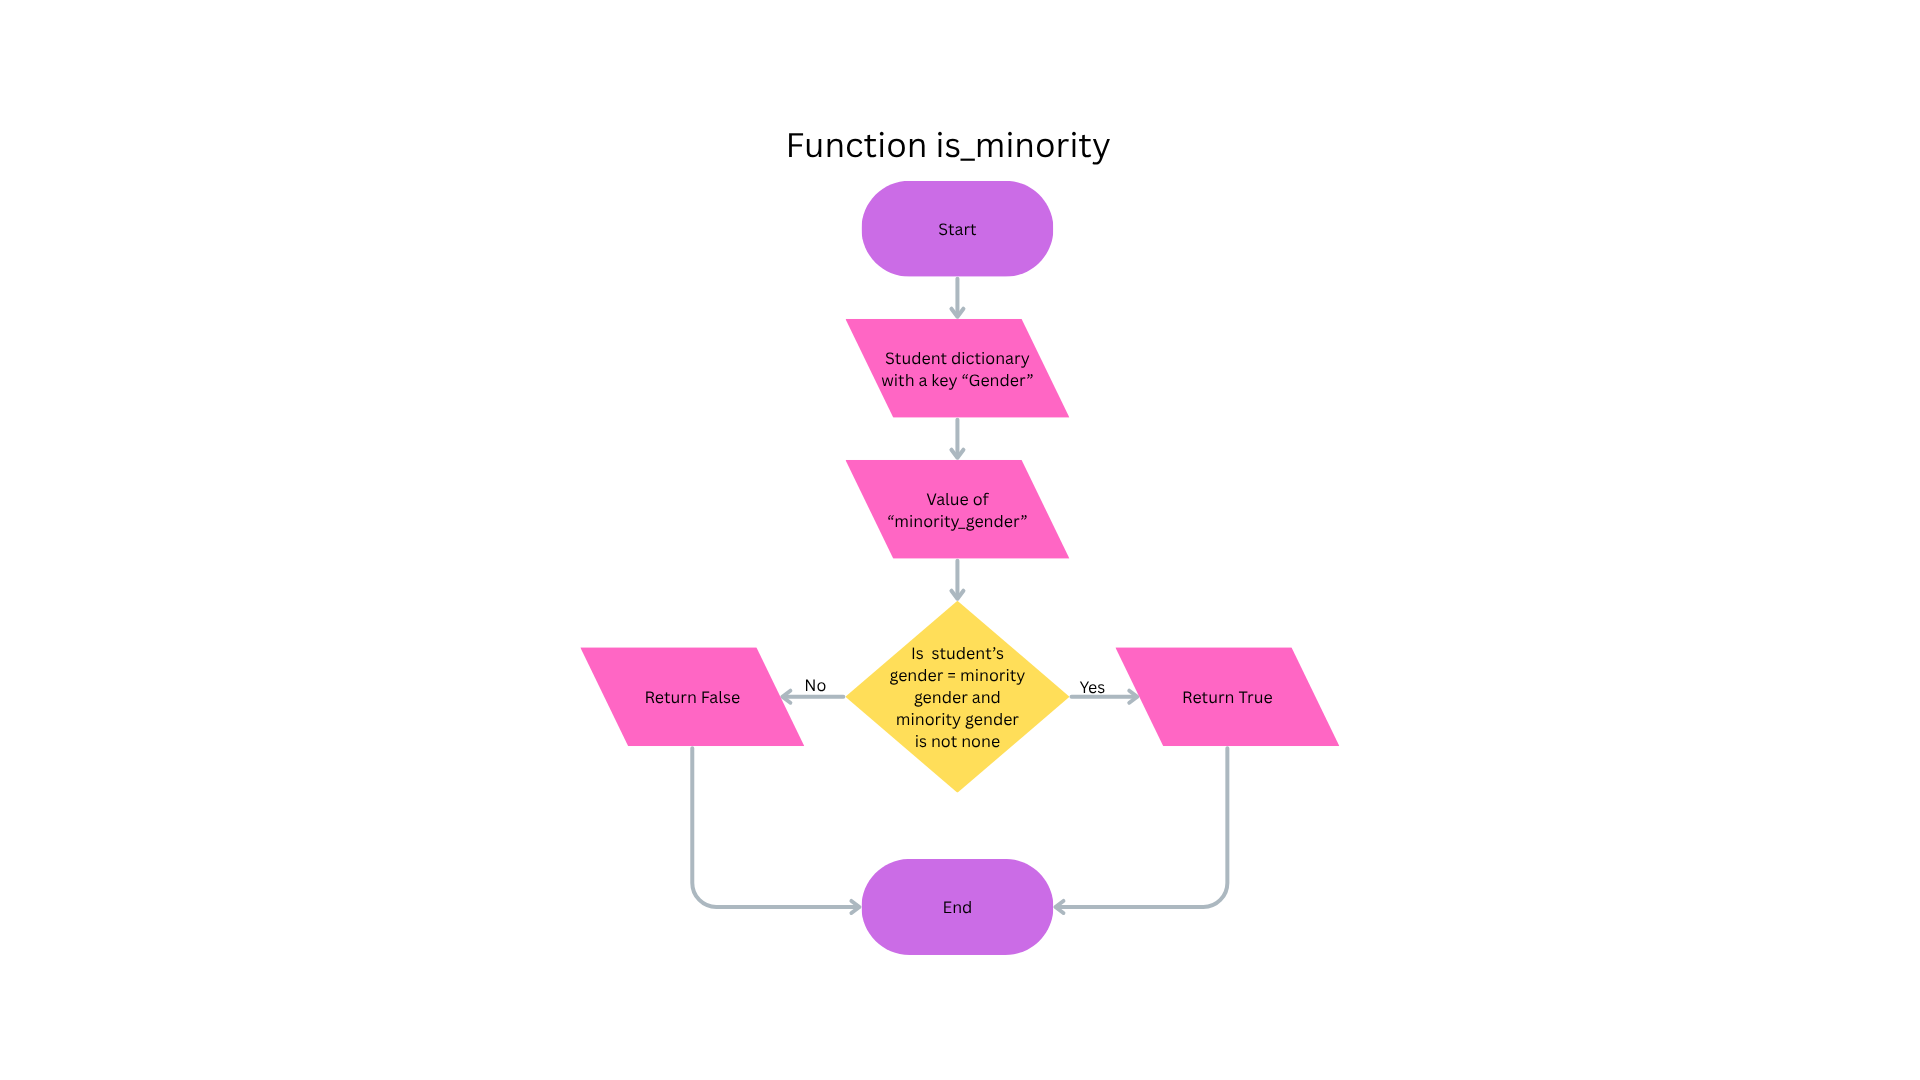

#### PSEUDOCODE

DEFINE is_minority (parameter = student, minority_gender):

    IF minority gender exists and student gender is minority gender , THEN
        RETURN True
    ELSE
        RETURN False
    END IF

In [ ]:
def is_minority(student, minority_gender):
    return minority_gender is not None and student["Gender"] == minority_gender

### Function build_band_and_school_caps

#### Intent
- To figure out the maximum number of same gender/school each group can have while ensuring that no gender/school has a majority.

#### Input
- `sizes`: a list of integers representing the intended sizes of each group


#### Process: Compute Per-Group Caps

- Compute number of groups: `num_groups = len(sizes)`
- Initialize two result lists of length `num_groups`:
  - `band_caps` for caps on high and low bands per group
  - `school_caps` for caps on each school per group
- For each group `i` with size `sz = sizes[i]`:
  - Set `band_caps[i] = sz // 2`
  - Set `school_caps[i] = sz // 2`
- This makes the caps proportional to group size and never larger than half the group.

#### Output

- `band_caps`: list of caps per group for highs/lows
- `school_caps`: list of caps per group for schools

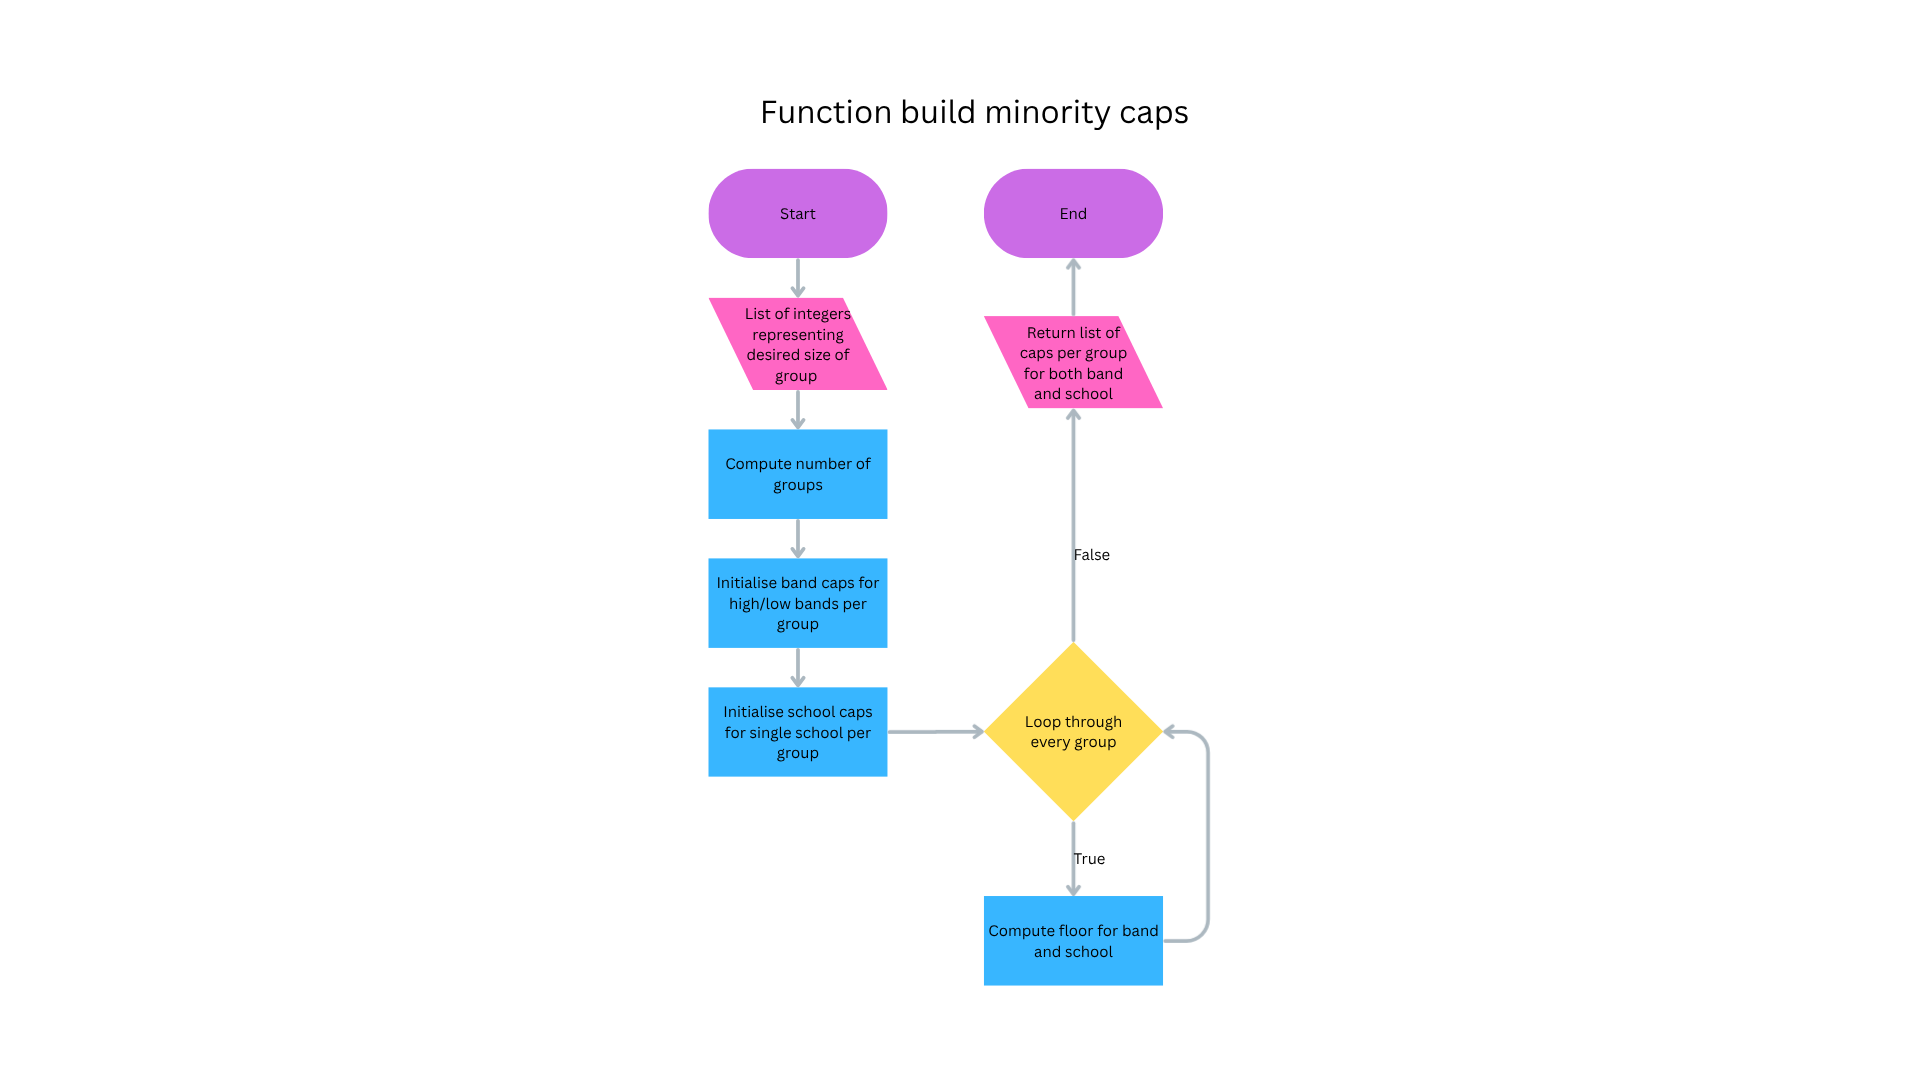

### PSEUDOCODE

DEFINE build_band_and_school_caps(parameter = size_for_each_grp):

    SET num_group = length(size_for_each_grp)

    INITIALIZE band_caps = a list that contains max num of students from the same band for each team

    INITIALIZE school_caps = a list that contains max num of students from the same school for each team

    SET counter = 0

    WHILE counter < num_group:
        COUNT the max num of students from the same band for each team
        COUNT the max num of students from the same school for each team
        counter += 1
    END WHILE

    RETURN band_caps and school_caps

In [ ]:
def build_band_and_school_caps(sizes):
    """
    Per-group caps:
      - highs and lows each capped at size//2
      - each school capped at size//2
    """
    num_groups = len(sizes)
    band_caps   = [0]*num_groups
    school_caps = [0]*num_groups
    i = 0
    while i < num_groups:
        sz = sizes[i]
        band_caps[i]   = sz // 2
        school_caps[i] = sz // 2
        i += 1
    return band_caps, school_caps

### Function ok_to_add

#### Intent
- To check whether adding any candidate into a group will break any of the caps.

#### Input
- `group`: list of current members (student dicts) in the target team
- `cand`: the candidate student dict to consider adding
- `group_size` (int): maximum allowed size for this team
- `band_caps` (list[int]): per-group caps for high/low bands, index by `group_index`
- `school_caps` (list[int]): per-group caps for schools, index by `group_index`
- `minority_gender`: detected minority gender label
- `minority_cap` (list[int]): per-group caps for the minority gender
- `group_index` (int): which team we are filling


#### Process: Feasibility Checks Before Adding `cand`

1. Check if group is full
  - If `len(group) >= group_size`, return `False`

2. Check band cap
  - Count bands: `bcnt = count_band_in_group(group)`
  - If `bcnt[b] >= band_caps[group_index]`, return `False`

3. Check gender ceiling cap
- Count genders: `gcnt = count_gender_in_group(group)`
- If `gcnt[g] >= gcap`, return 'False'

4. Check school cap
-  Count schools: `scnt = count_school_in_group(group)`
-  If `scnt.get(cand["School"], 0) >= school_caps`, return 'False'

5. Minority gender cap
- Count genders: `gcnt = count_gender_in_group(group)`
- If `gcnt.get(minority_gender, 0) >= minority_cap[group_index]`, return `False`

6. If all checks passed, return `True`

#### Output

- `True` if adding cand keeps the team within size, band, school, and minority constraints, otherwise `False`.

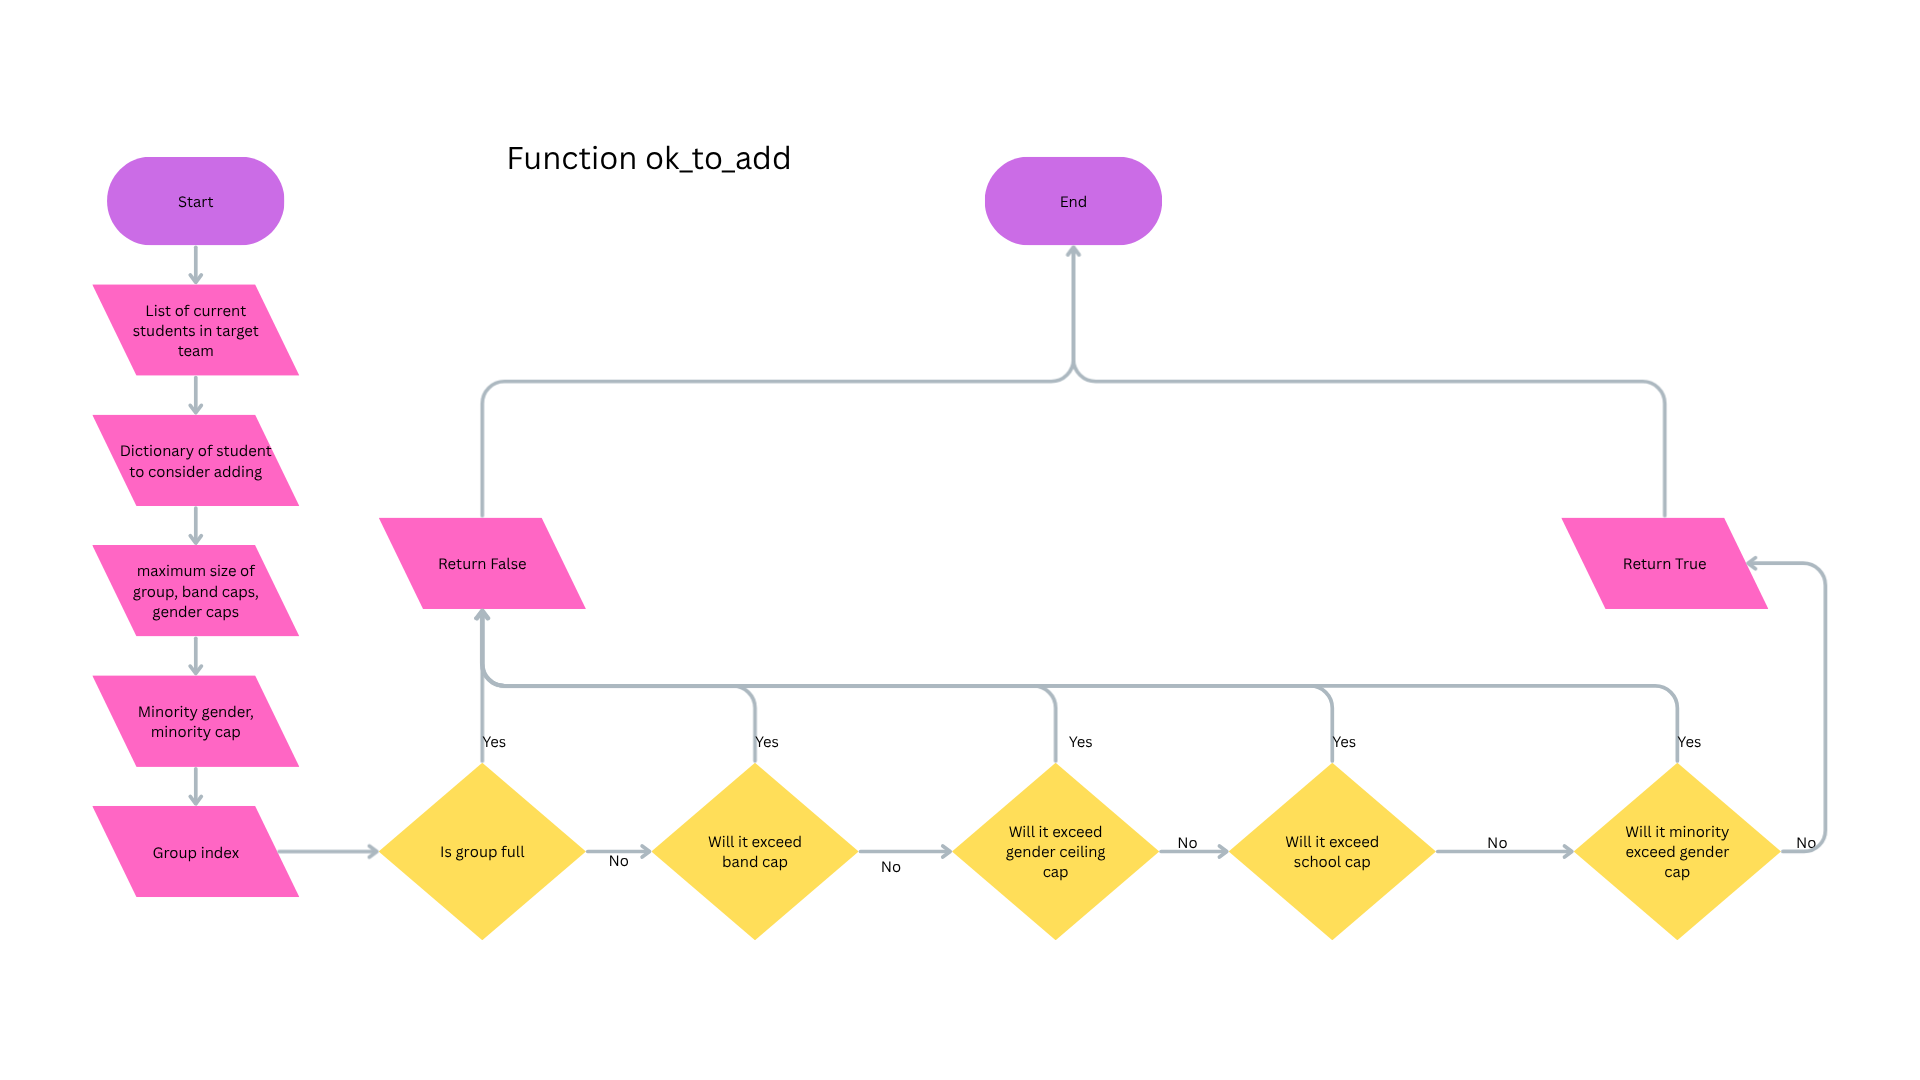

### PSEUDOCODE

DEFINE ok_to_add (parameters = group, candidate, group_size, band_caps, school_caps, minority_gender, minority_cap, group_index):

	IF length(group) >= group_size, THEN
		RETURN False
	END IF

	// CHECK num of students for each band in one group (mid has no cap)
	SET bcnt = count_band_in_group (group) to store the num of students in each band
	SET b = candidate’s band
	IF b is high OR low AND the num of student for band b >= cap for num of student for band b in the target group, THEN
		RETURN False
	END IF

	//INITIALISE gender cap to be ceiling of group_size/2
	SET gcnt = count_gender_in_group(group) to store the number of each gender in the group
	SET g = candidate's gender
		IF num of students in g >= cap for num of student for each gender in the target group, THEN
		  RETURN False

	// CHECK num of students from each school in one group
	SET scnt = count_school_in_group (group) to store the num of students from each school
	SET s = candidate’s school
	IF num of students in s >= cap for num of student in each school in the target group, THEN
		RETURN False

	// CHECK num of student of minority gender in one group
	IF minority gender exists and candidate’s gender == minority gender, THEN
		SET gcnt = count_gender_in_group(group) to store the num of students for each gender
		IF the num of students of minority gender in group >= cap for num of student of minority gender in the target group, THEN
			RETURN False

	RETURN True


In [ ]:
def ok_to_add(group, cand, group_size,
              band_caps, school_caps,
              minority_gender, minority_cap, group_index):
    """
    Check:
      - group not full
      - band cap for highs/lows (mids are uncapped here)
      - school cap
      - minority ceiling (uniform)
    """
    if len(group) >= group_size:
        return False

    bcnt = count_band_in_group(group)
    b = cand["band"]
    if (b == 'high' or b == 'low') and bcnt[b] >= band_caps[group_index]:
        return False

    gcap = math.ceil(group_size / 2)
    gcnt = count_gender_in_group(group)
    g = cand["Gender"]
    if gcnt.get(g, 0) >= gcap:
        return False

    scnt = count_school_in_group(group)
    s = cand["School"]
    if scnt.get(s, 0) >= school_caps[group_index]:
        return False

    if minority_gender is not None and cand["Gender"] == minority_gender:
        gcnt = count_gender_in_group(group)
        if gcnt.get(minority_gender, 0) >= minority_cap[group_index]:
            return False

    return True

### Function build_hl_targets_by_sizes

#### Intent
- Compute per-group targets for **high** and **low** band placements so totals are spread fairly, while respecting each group’s **band cap** and **group size**.

#### Input
- `sizes` (list[int]): size of each group.
- `num_high` (int): total number of high-band students to distribute.
- `num_low` (int): total number of low-band students to distribute.
- `band_caps` (list[int]): per-group caps for high/low placements.

#### Process: Build targets per group with caps and size safety
1. Compute `group_count = len(sizes)`.

2. Define helper `spread(total_to_assign)` to allocate a total (highs or lows):
   - Initialize `per_group = [0] * group_count`.
   - Compute base and remainder:
     - `base_quota = total_to_assign // group_count`
     - `remainder  = total_to_assign %  group_count`
   - Assign the **base** to every group, capped by that group’s band cap:
     - For each index `group_idx`:  
       `per_group[group_idx] = min(base_quota, band_caps[group_idx])`
   - Order groups by **descending size** using a simple selection sort to get `group_order`.
   - Distribute the **remainder** over `group_order` in sweeps, without exceeding caps:
     - For each `g_index` in `group_order`, if `per_group[g_index] < band_caps[g_index]`, increment it and decrement `remainder`.
     - Repeat sweeps while `remainder > 0` (bounded to avoid infinite loops when caps block allocation).
   - Return `per_group`.

3. Produce targets:
   - `target_high = spread(num_high)`
   - `target_low  = spread(num_low)`

#### Output
- `target_high` (list[int]): per-group target counts for high-band students.
- `target_low`  (list[int]): per-group target counts for low-band students.

#### Notes
- Remainders are biased toward **larger groups** to improve fairness under caps.



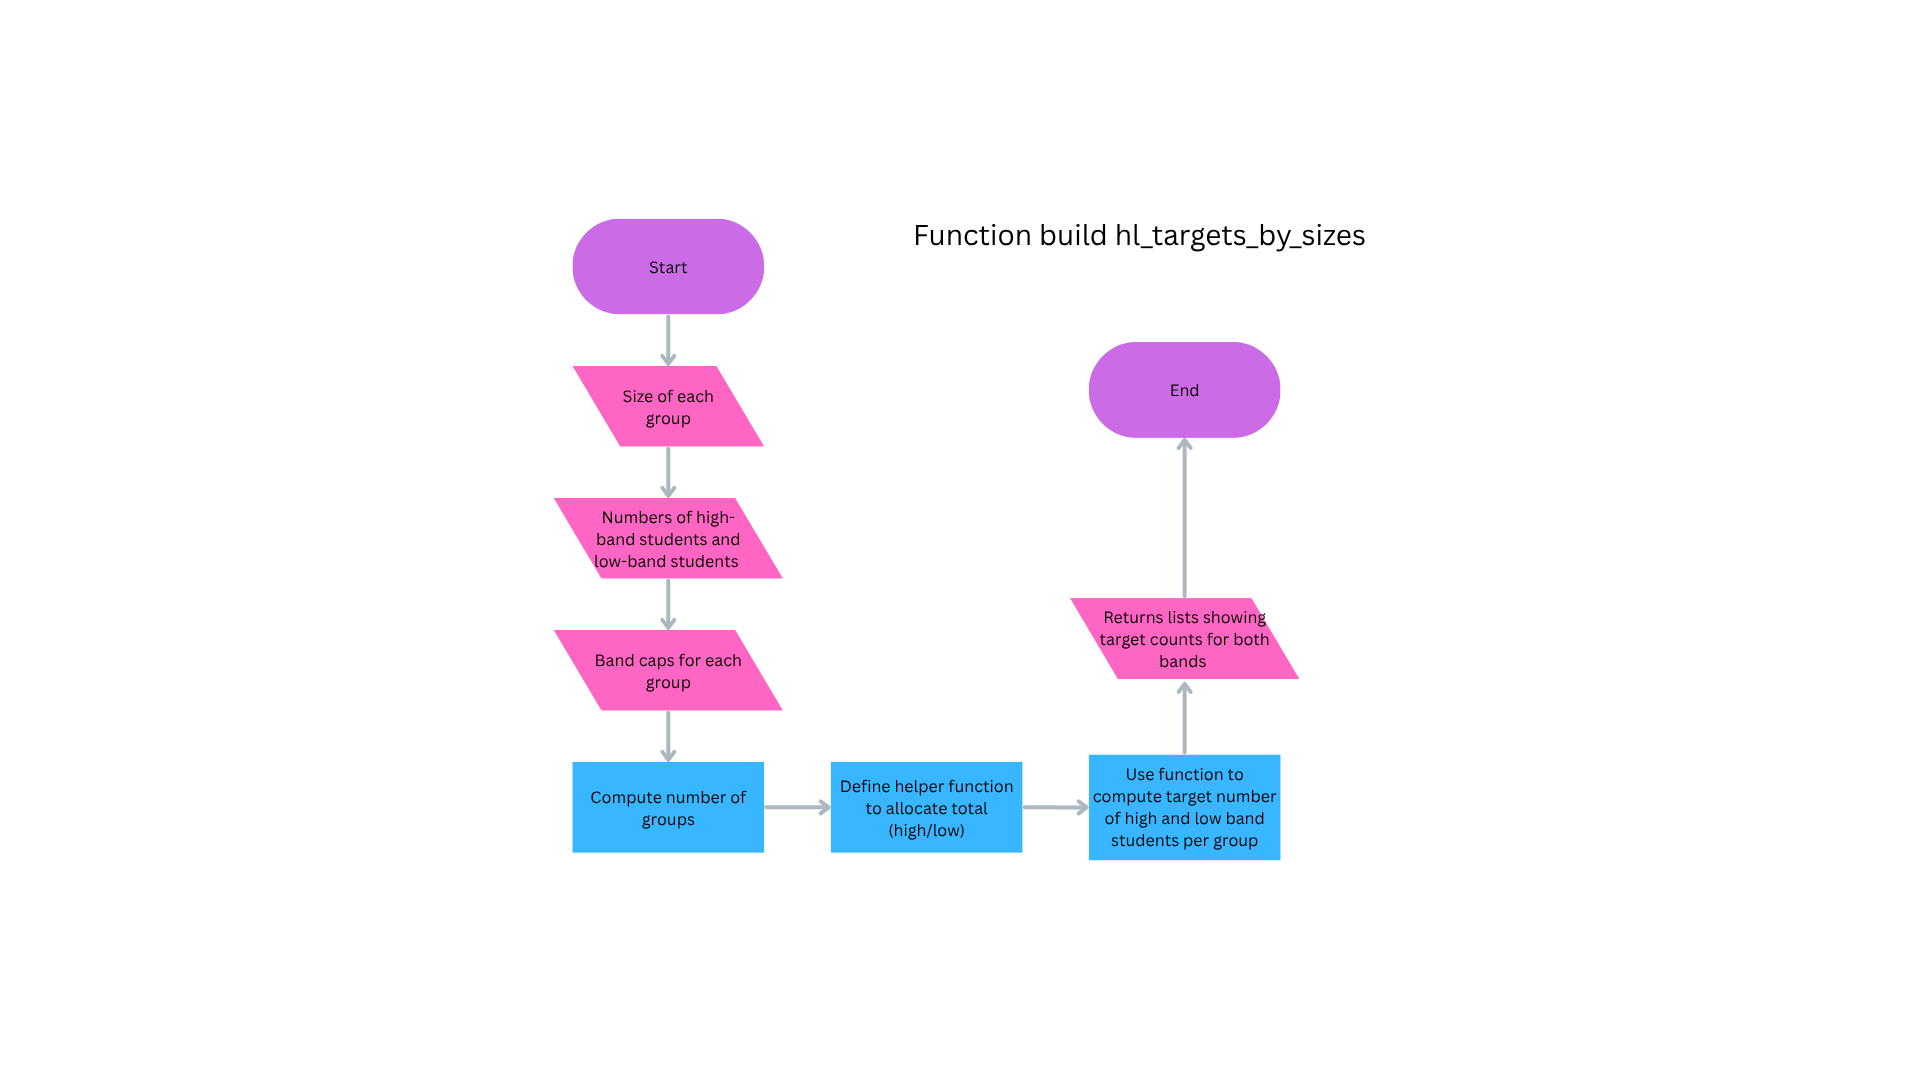

### PSEUDOCODE

DEFINE build_hl_targets_by_sizes (parameters = size_for_each_grp, num_high, num_low, band_caps):

	// COUNT number of groups to form in each tutorial group
	SET group_count = number of groups

	// DECIDE the num of students of high and low bands for each group
	DEFINE spread (parameter = total_num_to_assign):
		INITIALIZE per_group = result list with zeros based on number of group
		SET base_quota = total_num_to_assign // group_count
		SET remainder = leftover students to distribute after equal division

		// GIVE every group the base quota (but not more than their cap)
		FOR each group_index in all groups:
			IF base_quota <= target group’s band cap, THEN
				per_group[group_index] = base_quota
			ELSE
				per_group[group_index] = target group’s band cap
			END IF

		// SORT group indexes from largest to smallest group size
		SET group_order = list of group indexes sorted by sizes in descending order

		// DISTRIBUTE the leftover students
		SET sweep_round = 0
		WHILE remainder > 0 AND we haven’t done too many rounds:
			FOR each group_index in group_order:
				IF target group still under its band cap, THEN
					per_group[group_index] += 1
					remainder -= 1
				END IF
				sweep_round += 1
			END FOR
		END WHILE
		RETURN per_group

	// GET results for high-band and low-band
	SET target_high = spread(num_high)
	SET target_low = spread(num_low)

	RETURN target_high, target_low


In [ ]:
def build_hl_targets_by_sizes(sizes, num_high, num_low, band_caps):
    group_count = len(sizes)

    def spread(total_to_assign):
        per_group = [0] * group_count
        base_quota = total_to_assign // group_count
        remainder  = total_to_assign %  group_count

        # Assign base quota (capped by each group's band cap)
        group_idx = 0
        while group_idx < group_count:
            per_group[group_idx] = base_quota if base_quota <= band_caps[group_idx] else band_caps[group_idx]
            group_idx += 1

        # Remainder to larger groups first (selection sort by size descending)
        group_order = list(range(group_count))
        left = 0
        while left < len(group_order):
            max_pos = left
            right = left + 1
            while right < len(group_order):
                if sizes[group_order[right]] > sizes[group_order[max_pos]]:
                    max_pos = right
                right += 1
            group_order[left], group_order[max_pos] = group_order[max_pos], group_order[left]
            left += 1

        sweep_round = 0
        while remainder > 0 and sweep_round < len(group_order) * 2:
            order_idx = 0
            while order_idx < len(group_order) and remainder > 0:
                g_index = group_order[order_idx]
                if per_group[g_index] < band_caps[g_index]:
                    per_group[g_index] += 1
                    remainder -= 1
                order_idx += 1
            sweep_round += 1

        return per_group

    target_high = spread(num_high)
    target_low  = spread(num_low)

    return target_high, target_low

## Seeding Functions

Seeding is the act of distributing students across the different groups.

### Helper Functions

#### Function pair_gender_diverse

##### Intent
- Check whether two students form a **gender-diverse pair** (i.e., have different genders).

##### Input
- `studentA` (dict): student dictionary containing a `"Gender"` key.
- `studentB` (dict): student dictionary containing a `"Gender"` key.

##### Process
- Evaluate: `studentA["Gender"] != studentB["Gender"]`

##### Output
- `True` if the two students’ genders differ.
- `False` if they are the same.


In [ ]:
def pair_gender_diverse(studentA, studentB):
    return studentA["Gender"] != studentB["Gender"]

#### Function _pair_school_diverse

##### Intent
- Check whether two students form a **school-diverse pair** (i.e., come from different schools).

##### Input
- `studentA` (dict): student dictionary containing a `"School"` key.
- `studentB` (dict): student dictionary containing a `"School"` key.

##### Process
- Evaluate: `studentA["School"] != studentB["School"]`

##### Output
- `True` if the two students’ schools differ.
- `False` if they are the same.



In [ ]:
def pair_school_diverse(studentA, studentB):
    return studentA["School"] != studentB["School"]

### Function `pick_best_hl_pair_for_group_avg_with_lookahead`

#### Intent
Select a **(High, Low)** pair whose **average CGPA** is closest to `class_mean` **while enforcing all constraints**, including:
- Standard **individual** feasibility caps (size, **band**, **school**, **minority ceiling**, and **per-gender ceiling**) via `ok_to_add(...)`,
- **Per-group** minority **floor** look-ahead for placing **2 seats**,
- **Global** minority **supply guard** (don’t starve later teams),
- **Pair-level** (joint) checks so adding **two members at once** cannot breach:
  - per-team **gender** ceiling,
  - per-team **school** ceiling (same-school pair won’t push a school over its cap),
  - per-team **minority** ceiling,
- Early **capacity** guard (must have ≥ 2 seats to place a pair).

#### Inputs
- `group` (`list[dict]`): current members of this team.
- `highs`, `lows` (`list[dict]`): candidate pools from **High** and **Low** bands.
- `class_mean` (`float`): target mean; pair aims for `2 * class_mean`.
- `group_size` (`int`): team capacity.
- `band_caps`, `school_caps` (`list[int]`): per-team caps (index by `group_index`).
- `minority_gender` (`str | None`): detected minority label (or `None`).
- `minority_cap` (`list[int]`): per-team minority ceilings.
- `group_index` (`int`): which team we are filling.
- `need` (`list[int]`): remaining **minority floor** per team.
- `slots_left` (`list[int]`): free seats per team.
- `minority_remaining` (`int`): global minorities left.
- `total_need` (`int`): global remaining minority floors.

#### Process
1. **Early capacity guard**
   - If `slots_left[group_index] < 2`, return `None` (cannot place a pair).

2. **Loop over High candidates (individual check)**
   - For each `high_cand`, require `ok_to_add(...)` to pass (size, band, school, minority ceiling, gender ceiling).

3. **Loop over Low candidates (individual check)**
   - For each `low_cand`, require `ok_to_add(...)` to pass as well.

4. **Per-group minority floor look-ahead (placing 2)**
   - `minority_in_pair = (is_minority(high_cand) + is_minority(low_cand))`.
   - If `slots_left[group_index] - 2 < need[group_index] - minority_in_pair`, **skip** (placing the pair would make it impossible for this team to meet its floor with remaining seats).

5. **Pair-level joint GENDER ceiling**
   - Compute `gender_cap = ceil(group_size / 2)`.
   - Let `gender_cnt = count_gender_in_group(group)`[dict].
   - Project after adding both:
     - `projected_gender_counts = gender_cnt`
     - Increment counts for `high_cand["Gender"]` and `low_cand["Gender"]`.
   - If any projected count `> gender_cap`, **skip** this pair.

6. **Pair-level joint SCHOOL ceiling**
   - Let `sch_cnt = count_school_in_group(group)` and `school_cap = school_caps[group_index]`.
   - If both candidates are from the **same school** `S`, ensure `sch_cnt[S] + 2 ≤ school_cap`; otherwise **skip**.

7. **Pair-level joint MINORITY ceiling**
   - Project the team’s minority count after adding both; if it would exceed `minority_cap[group_index]`, **skip**.

8. **Global minority supply guard**
   - `reduction = min(need[group_index], minority_in_pair)` (credit this team’s floor, capped by what it still needs).
   - If `(minority_remaining - minority_in_pair) < (total_need - reduction)`, **skip** (would starve later teams’ floors).

9. **Score by closeness to target**
   - `pair_sum = high_cand["CGPA"] + low_cand["CGPA"]`
   - `abs_error = |pair_sum - 2 * class_mean|`
   - Keep the pair with smallest `abs_error`.

10. **Tiebreakers**
    - Prefer **gender-diverse** pairs: `pair_gender_diverse(high, low)`.
    - If still tied, prefer **school-diverse** pairs: `pair_school_diverse(high, low)`.

11. **Return**
    - Best feasible `(hi_idx, lo_idx)` or `None` if no pair satisfies all checks.

#### Output
- `tuple[int, int] | None`: indices into `highs` and `lows` for the chosen pair, or `None` if no feasible pair exists.


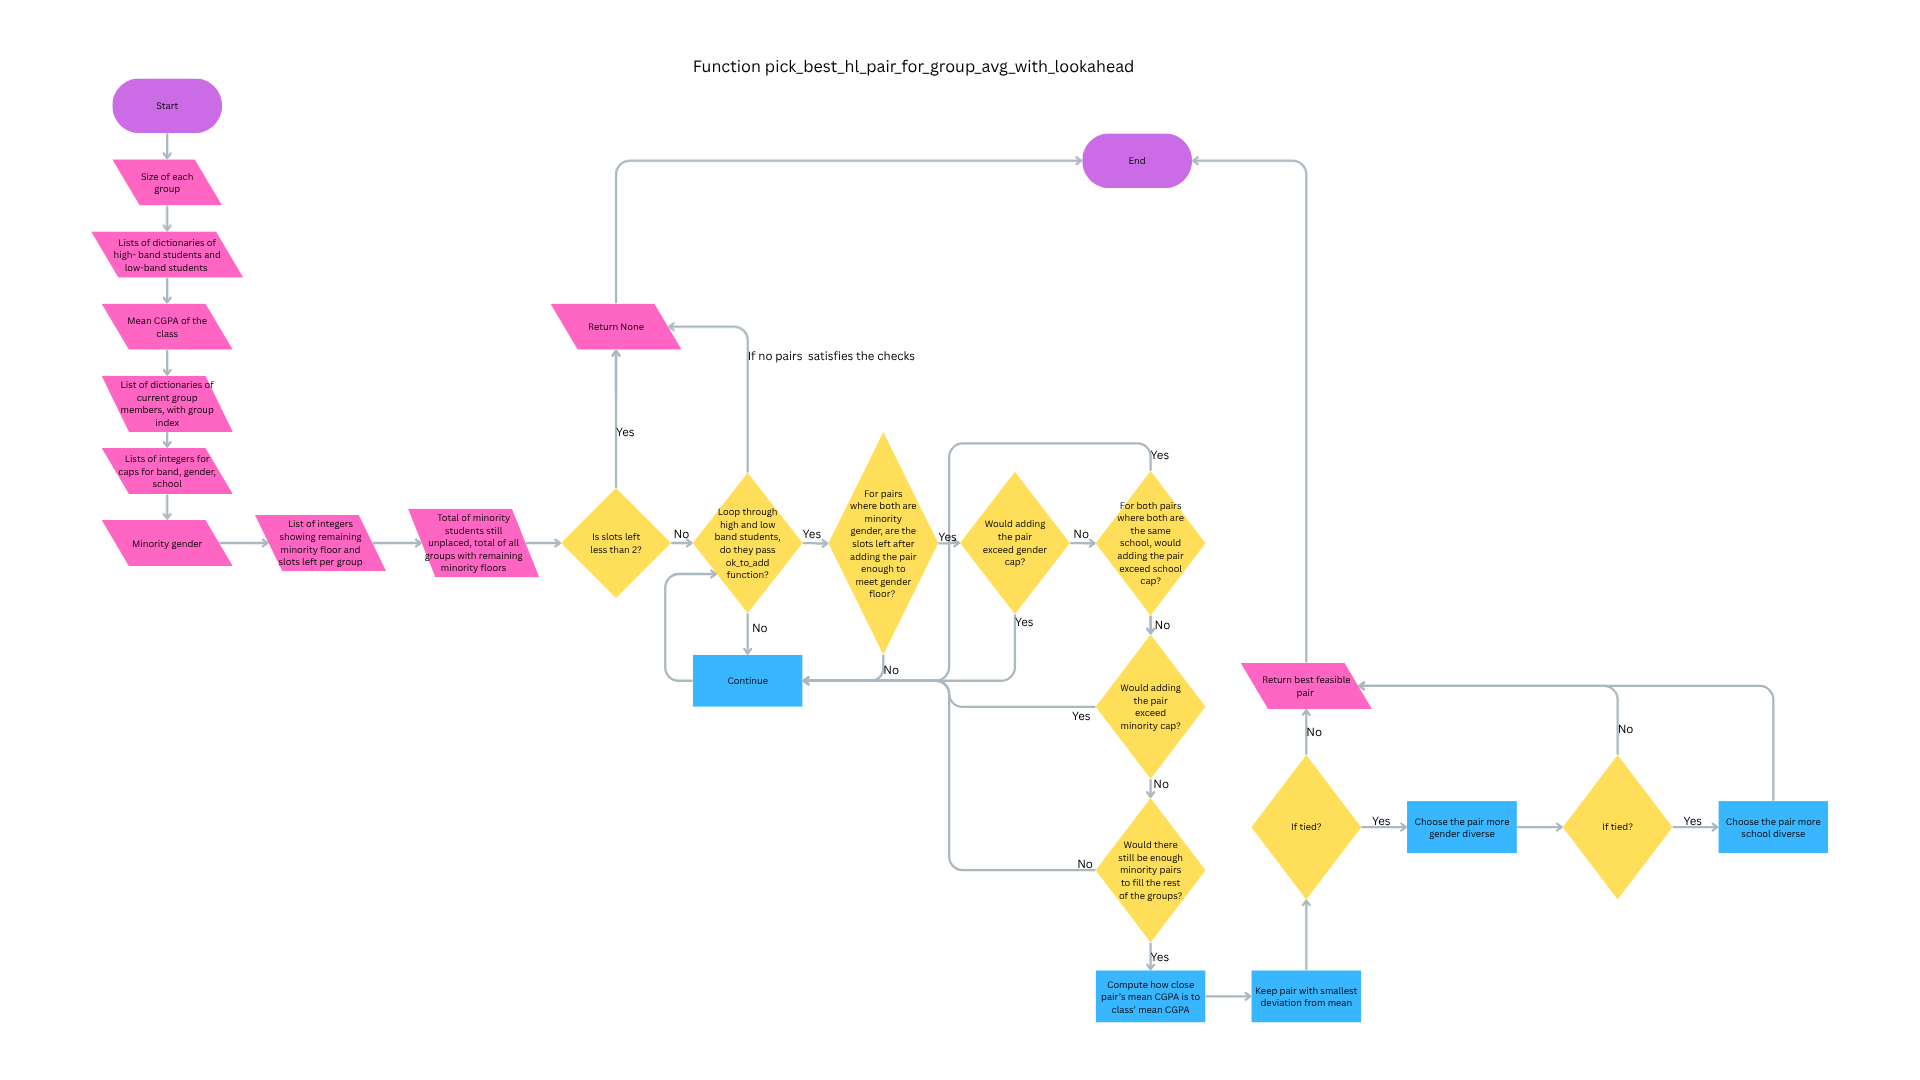

### PSEUDOCODE

DEFINE pick_best_hl_pair_for_group_avg_with_lookahead(
    group, highs, lows, class_mean, group_size,
    band_caps, school_caps,
    minority_gender, minority_cap, group_index,
    need, slots_left,
    minority_remaining, total_need):

    best_pair = None
    best_error = None
    target_sum = 2 × class_mean       # ideal total CGPA for the pair

    # If this group doesn't have at least 2 empty seats, skip pairing
    IF slots_left[group_index] < 2:
        RETURN None

    # Loop through every high-band candidate
    FOR each high_cand in highs:
        
        # Check if this high-band student can join this group
        IF not ok_to_add(group, high_cand, ...):
            CONTINUE to next high_cand

        # Loop through every low-band candidate
        FOR each low_cand in lows:

            # If only 1 seat left, cannot add a pair
            IF slots_left[group_index] < 2:
                BREAK out of this loop

            # Check if this low-band student can join
            IF ok_to_add(group, low_cand, ...):

                # ---- Pair Check 1: Minority Floor (look-ahead) ----
                minority_in_pair = number of minority members in (high_cand, low_cand)
                seats_after_adding_pair = slots_left[group_index] - 2
                needed_minority_after = need[group_index] - minority_in_pair

                # If not enough seats left to meet minority needs later, skip
                IF seats_after_adding_pair < needed_minority_after:
                    CONTINUE to next low_cand

                # ---------- Pair Check 2: Joint Gender ceiling ----------
                Compute Gender Cap (Ceiling of group size / 2)
                Count how many students in the group are of each gender
                Add both candidate's gender to the count
                IF either gender exceeds the cap:
                    CONTINUE to the next low_cand

                # ---- Pair Check 3: Same School Ceiling ----
                Count how many students in the group are from each school
                Add both candidates' schools to the count
                IF either school exceeds the school cap:
                    CONTINUE to next low_cand

                # ---- Pair Check 4: Minority Ceiling ----
                Count minorities in the group after adding both
                IF that number exceeds minority_cap[group_index]:
                    CONTINUE to next low_cand

                # ---- Pair Check 5: Global Minority Supply ----
                # (Don’t use up too many minorities so other groups still get some)
                reduction = min(need[group_index], minority_in_pair)
                IF (minority_remaining - minority_in_pair) < (total_need - reduction):
                    CONTINUE to next low_cand

                # ---- Pair Check 6: Score the Pair ----
                pair_sum = high_cand.CGPA + low_cand.CGPA
                error = |pair_sum - target_sum|   # difference from ideal total

                # ---- Find Best Pair ----
                IF best_error is None OR error < best_error:
                    best_pair = (high_cand, low_cand)
                    best_error = error

                ELSE IF error == best_error:
                    # Tie-breaker 1: prefer gender-diverse pair
                    # Tie-breaker 2: if still same, prefer school-diverse pair
                    IF current pair is more diverse (gender/school):
                        best_pair = (high_cand, low_cand)

    RETURN best_pair


In [ ]:
def pick_best_hl_pair_for_group_avg_with_lookahead(
        group, highs, lows, class_mean, group_size,
        band_caps, school_caps,
        minority_gender, minority_cap, group_index,
        need, slots_left,
        minority_remaining, total_need):
    """
    Pick (hi_idx, lo_idx) whose average CGPA is closest to class_mean,
    while respecting:
      • individual feasibility (band/school/minority ceilings),
      • per-group minority floor look-ahead for placing 2 seats,
      • GLOBAL minority supply guard across all groups,
      • NEW: joint pair checks so two members together don’t exceed per-team school/minority ceilings,
      • NEW: explicit capacity check that at least 2 seats remain for pair placement.
    """
    best_pair_indices = None
    best_abs_error = None
    target_pair_sum = 2.0 * class_mean

    # If we don't have at least 2 seats left in this team, pair seeding is impossible.
    if slots_left[group_index] < 2:
        return None

    hi_idx = 0
    while hi_idx < len(highs):
        high_cand = highs[hi_idx]

        # Individual feasibility for the high candidate against CURRENT group
        if not ok_to_add(group, high_cand, group_size,
                         band_caps, school_caps,
                         minority_gender, minority_cap, group_index):
            hi_idx += 1
            continue

        lo_idx = 0
        while lo_idx < len(lows):

            # Explicit capacity guard for pairs (avoid trying pairs when only 1 seat left)
            if slots_left[group_index] < 2:
                break

            low_cand = lows[lo_idx]

            # Individual feasibility for the low candidate against CURRENT group
            if ok_to_add(group, low_cand, group_size,
                         band_caps, school_caps,
                         minority_gender, minority_cap, group_index):

                # Pair-level look-ahead for minority floor (placing 2 seats)
                minority_in_pair = 0
                if is_minority(high_cand, minority_gender): minority_in_pair += 1
                if is_minority(low_cand,  minority_gender): minority_in_pair += 1
                if (slots_left[group_index] - 2) < (need[group_index] - minority_in_pair):
                    lo_idx += 1
                    continue

                # Pair-level joint GENDER ceiling check
                gender_cap = math.ceil(group_size / 2)        # e.g., 5 -> cap 3
                gender_cnt = count_gender_in_group(group)     # current counts

                # projected counts after adding both
                projected_gender_counts = gender_cnt
                gender_high_candidate = high_cand["Gender"]
                gender_low_candidate  = low_cand["Gender"]
                projected_gender_counts[gender_high_candidate] = projected_gender_counts.get(gender_high_candidate, 0) + 1
                projected_gender_counts[gender_low_candidate]  = projected_gender_counts.get(gender_low_candidate, 0) + 1

                # If any gender would exceed the cap, skip this pair
                if any(count > gender_cap for count in projected_gender_counts.values()):
                    lo_idx += 1
                    continue


                # Pair-level joint SCHOOL ceiling check
                sch_cnt = count_school_in_group(group)
                schoolA = high_cand["School"]
                schoolB = low_cand["School"]
                school_cap = school_caps[group_index]
                if schoolA == schoolB:
                    # both from the same school => +2 to that school's count
                    if sch_cnt.get(schoolA, 0) + 2 > school_cap:
                        lo_idx += 1
                        continue

                # Pair-level joint MINORITY ceiling check
                if minority_gender is not None:
                    gcnt = count_gender_in_group(group)
                    projected_minority = gcnt.get(minority_gender, 0)
                    if is_minority(high_cand, minority_gender): projected_minority += 1
                    if is_minority(low_cand,  minority_gender): projected_minority += 1
                    if projected_minority > minority_cap[group_index]:
                        lo_idx += 1
                        continue

                # GLOBAL minority supply guard (don’t starve later teams) 
                reduction = min(need[group_index], minority_in_pair)
                if (minority_remaining - minority_in_pair) < (total_need - reduction):
                    lo_idx += 1
                    continue

                # Score the pair by closeness to class mean
                pair_sum = high_cand["CGPA"] + low_cand["CGPA"]
                abs_error = abs(pair_sum - target_pair_sum)

                if best_abs_error is None or abs_error < best_abs_error:
                    best_abs_error = abs_error
                    best_pair_indices = (hi_idx, lo_idx)
                elif abs_error == best_abs_error:
                    # Tiebreakers: prefer gender-diverse, then school-diverse
                    cand_gender_diverse = pair_gender_diverse(high_cand, low_cand)
                    cand_school_diverse = pair_school_diverse(high_cand, low_cand)

                    cur_hi = highs[best_pair_indices[0]]
                    cur_lo = lows[best_pair_indices[1]]
                    cur_gender_diverse = pair_gender_diverse(cur_hi, cur_lo)
                    cur_school_diverse = pair_school_diverse(cur_hi, cur_lo)

                    if cand_gender_diverse and not cur_gender_diverse:
                        best_pair_indices = (hi_idx, lo_idx)
                    elif cand_gender_diverse == cur_gender_diverse:
                        if cand_school_diverse and not cur_school_diverse:
                            best_pair_indices = (hi_idx, lo_idx)

            lo_idx += 1
        hi_idx += 1

    return best_pair_indices

### Function pick_best_mid_for_group_with_lookahead

#### Intent
- Pick the **mid-band** candidate whose CGPA is closest to the team’s **ideal next CGPA**, while enforcing:
  - Team size, band, school, and minority caps (feasibility).
  - **Per-group** minority floor look-ahead for a single seat.
  - **Global** minority supply guard so other groups can still meet their floors.

#### Input
- `group` (list[dict]): current members of the target team.
- `mids` (list[dict]): available mid-band candidates.
- `class_mean` (float): class CGPA mean; used to compute the team’s target total.
- `group_size` (int): capacity of the target team.
- `band_caps` (list[int]): per-group caps for high/low bands (index by `group_index`).
- `school_caps` (list[int]): per-group caps for schools (index by `group_index`).
- `minority_gender` (str | None): detected minority gender label (or `None`).
- `minority_cap` (list[int]): per-group minority ceilings (index by `group_index`).
- `group_index` (int): index of the team being filled.
- `need` (list[int]): remaining **minority floor** required per group.
- `slots_left` (list[int]): remaining available seats per group.
- `minority_remaining` (int): total minority students still unplaced across all groups.
- `total_need` (int): sum of remaining minority floor needs across all groups.

#### Process
1. **Compute the team’s ideal next CGPA**
   - Sum current CGPAs in `group` → `current_sum`.
   - Seats remaining: `remaining = group_size - len(group)`. If `remaining <= 0`, return `None`.
   - Target total CGPA: `target_total = group_size * class_mean`.
   - Ideal next CGPA: `ideal_next = (target_total - current_sum) / remaining`.

2. **Iterate through candidates**
   - For each `cand` in `mids` (by `candidate_index`):

3. **Per-group minority floor look-ahead (1 seat)**
   - `minority_increment = 1 if is_minority(cand, minority_gender) else 0`.
   - If `(slots_left[group_index] - 1) < (need[group_index] - minority_increment)`, **skip** (placing this now would prevent the team from meeting its floor later).

4. **Global minority supply guard**
   - `reduction = min(need[group_index], minority_increment)` (credit only unmet floor).
   - If `(minority_remaining - minority_increment) < (total_need - reduction)`, **skip** (would starve other groups’ floors).

5. **Feasibility checks**
   - Require `ok_to_add(group, cand, group_size, band_caps, school_caps, minority_gender, minority_cap, group_index)` to pass.

6. **Score by closeness to ideal**
   - `err = abs(cand["CGPA"] - ideal_next)`.
   - Track the candidate with the smallest `err` as `best` (store its index).

7. **Return**
   - Return `best` (index in `mids`) if any candidate satisfies all constraints; otherwise return `None`.

#### Output
- `int | None`: index of the selected mid candidate in `mids`, or `None` if no candidate passes the constraints and guards.


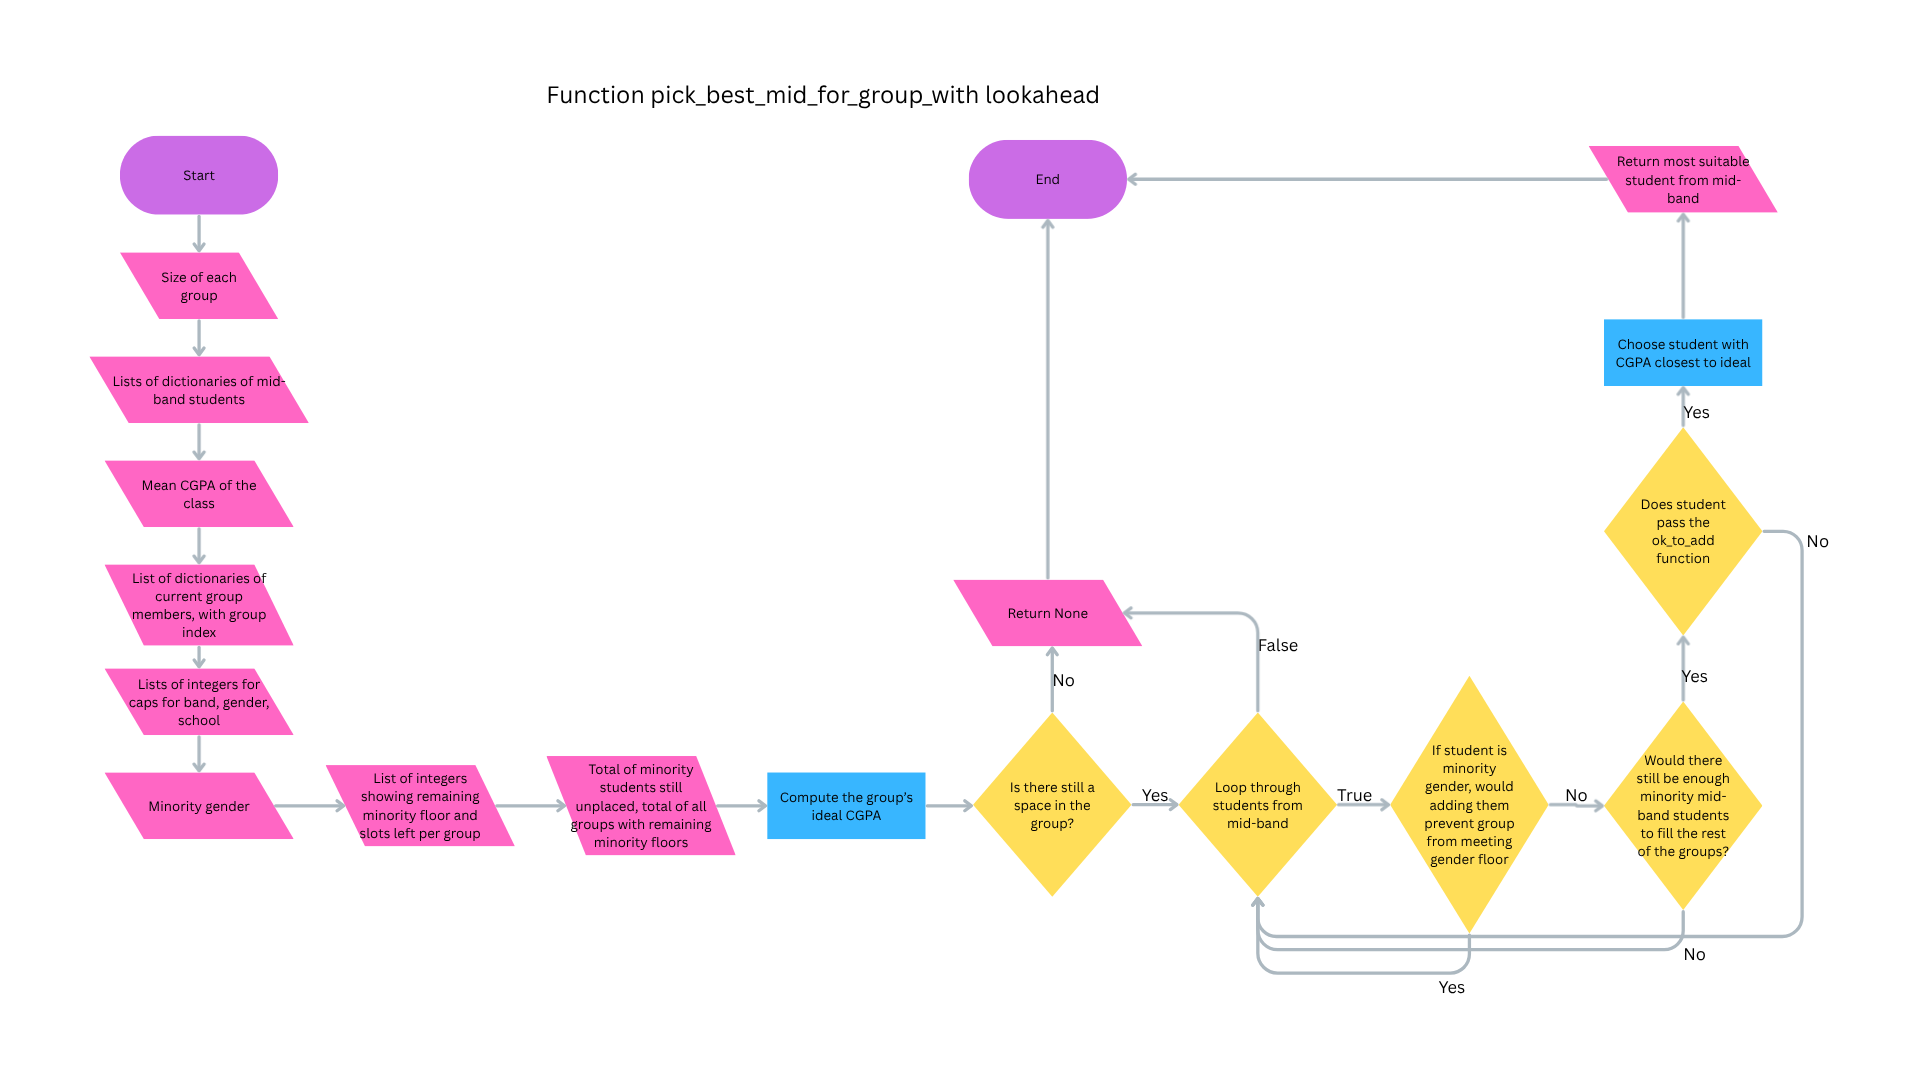

### PSEUDOCODE

DEFINE pick_best_mid_for_group_with_lookahead(
    group, mids, class_mean, group_size,
    band_caps, school_caps,
    minority_gender, minority_cap, group_index,
    need, slots_left,
    minority_remaining, total_need):

    # Step 1: calculate the current total CGPA of the group
    current_sum = 0
    FOR each student in group:
        current_sum = current_sum + student.CGPA

    # Step 2: find how many seats are left
    remaining = group_size - number of students in group
    IF remaining <= 0:
        RETURN None     # group already full

    # Step 3: calculate the "ideal next CGPA"
    # (this helps make the group’s average closer to class_mean)
    target_total = group_size × class_mean
    ideal_next = (target_total - current_sum) / remaining

    best_candidate = None
    best_error = None

    # Step 4: check every mid-band candidate
    FOR each cand in mids:

        # Minority look-ahead check for 1 seat 
        minority_add = 1 IF cand is minority ELSE 0
        IF (slots_left[group_index] - 1) < (need[group_index] - minority_add):
            CONTINUE to next candidate

        # Global minority supply check
        reduction = min(need[group_index], minority_add)
        IF (minority_remaining - minority_add) < (total_need - reduction):
            CONTINUE to next candidate

        # Feasibility check (school, band, minority ceilings)
        IF ok_to_add(group, cand, group_size,
                     band_caps, school_caps,
                     minority_gender, minority_cap, group_index):

            # Calculate how close this student's CGPA is to ideal
            error = |cand.CGPA - ideal_next|

            # Update best candidate
            IF best_error is None OR error < best_error:
                best_error = error
                best_candidate = cand

    RETURN best_candidate


In [ ]:
def pick_best_mid_for_group_with_lookahead(
        group, mids, class_mean, group_size,
        band_caps, school_caps,
        minority_gender, minority_cap, group_index,
        need, slots_left,
        minority_remaining, total_need):
    """
    Choose mid whose CGPA is closest to the group's ideal next CGPA,
    subject to feasibility, per-group minority 1-seat look-ahead,
    and GLOBAL minority supply guard.
    """
    # current sum
    current_sum = 0.0
    i = 0
    while i < len(group):
        current_sum += group[i]["CGPA"]; i += 1

    remaining = group_size - len(group)
    if remaining <= 0:
        return None

    target_total = group_size * class_mean
    ideal_next = (target_total - current_sum) / remaining

    best = None
    best_err = None

    candidate_index = 0
    while candidate_index < len(mids):
        cand = mids[candidate_index]

        # per-group minority floor look-ahead for 1 seat
        minority_increment = 1 if is_minority(cand, minority_gender) else 0
        if (slots_left[group_index] - 1) < (need[group_index] - minority_increment):
            candidate_index += 1
            continue

        # global supply guard
        reduction = min(need[group_index], minority_increment)
        if (minority_remaining - minority_increment) < (total_need - reduction):
            candidate_index += 1
            continue

        if ok_to_add(group, cand, group_size,
                     band_caps, school_caps,
                     minority_gender, minority_cap, group_index):
            err = abs(cand["CGPA"] - ideal_next)
            if best_err is None or err < best_err:
                best_err = err
                best = candidate_index
        candidate_index += 1
    return best


## Main Pipeline Function

### Function `group_students_pair_to_target_dict`

#### Intent
Form balanced project teams for a **single tutorial group**, targeting:
- Even team sizes around a desired size,
- Academic balance (teams’ averages near the class mean),
- Diversity constraints (band, school, gender ceilings),
- Fair distribution of the **minority gender** via per-team floors and a **global supply guard**,
- Guaranteed progress via **forced placements** when no candidate passes all guards.

#### Inputs
- `students` — list of student dicts (all from the same tutorial group) with keys: `"Tutorial Group"`, `"Student ID"`, `"School"`, `"Name"`, `"Gender"`, `"CGPA"`.
- `desired_group_size` — target team size (algorithm splits as evenly as possible).

#### Mutations (on each student dict)
- Adds `"band"` ∈ {`"low"`, `"mid"`, `"high"`} from CGPA quartiles.
- Adds `"Team Assigned"` as `"<Tutorial Group>-<team number>"` on placement.

#### Returns
- `groups` — `list[list[student]]`, the formed teams.
- `sizes_msg` — explanation of the even split (e.g., “Using 7 groups: 6 groups of 7 and 1 group of 8.”).
- `broken_groups` — team labels where a **forced H/L pair** or a **forced mid** was used.

---

#### Key Setup & Trackers (functions used)
- **Sort & Banding** — `sort_by_cgpa_ascending`, `split_bands_and_tag`.
- **Class mean** — `overall_mean`.
- **Even sizes** — `even_group_sizes` → `sizes`, `sizes_msg`.
- **Caps** — `build_band_and_school_caps` → `band_caps[i]`, `school_caps[i]`.
- **Minority policy** — `build_minority_caps`, `count_gender_in_group` → `minority_gender`, `floor_min`, `minority_cap[i]`.
- **Global guards (state)** — `minority_remaining`, `need[i]` (per-team floors left), `total_need = sum(need)`, `slots_left[i]`.
- **High/Low soft targets** — `build_hl_targets_by_sizes` → `target_high[i]`, `target_low[i]`.
- **Containers** — `groups = [[] for _ in range(num_groups)]`, `broken_groups = []`.

---

#### Algorithm

1. **High/Low Pair Seeding (round-robin)**
   - For team `i`, compute `pairs_remaining = min(target_high[i] − current_highs, target_low[i] − current_lows)`.
   - **Primary selection:** call `pick_best_hl_pair_for_group_avg_with_lookahead(...)` to choose the `(High, Low)` pair whose average is closest to `class_mean` **and** passes:
     - per-team band/school caps and gender ceiling (`ok_to_add` within the picker),
     - per-team minority **look-ahead** for placing 2 seats,
     - **global minority supply guard**,
     - tie-breakers: prefer **gender-diverse** then **school-diverse** pairs (`pair_gender_diverse`, `pair_school_diverse`).
   - **Forced pair fallback (if none feasible & `slots_left[i] ≥ 2`):**
     - **Pass 1 (guard-respecting):** scan all `high × low` pairs; pick closest to target sum `2*class_mean` that **keeps** the global supply feasible.
     - **Pass 2 (guard-ignoring):** if still none, pick the closest pair **ignoring** the global guard.
     - Mark team label in `broken_groups` when a forced pair is used.
   - **Commit pair:** label students, append to team, and update `need[i]`, `slots_left[i]`, `minority_remaining`, `total_need` using `is_minority`.

2. **Fill Remaining Seats with Mids (fewest-filled teams first)**
   - Order teams by current size (selection sort).
   - **Primary selection:** `pick_best_mid_for_group_with_lookahead(...)` chooses the Mid whose CGPA is closest to the team’s `ideal_next` while passing per-team caps, minority look-ahead (1 seat), and global supply guard.
   - **Forced mid fallback (if none feasible):**
     - **Pass 1:** choose Mid closest to `ideal_next` that **respects** the global guard.
     - **Pass 2:** otherwise choose the closest **ignoring** the guard.
     - Mark team label in `broken_groups`.
   - On every commit, label and update `need[i]`, `slots_left[i]`, `minority_remaining`, `total_need`.

3. **Termination**
   - Stop when **all teams are full**, or when an iteration makes **no placements** (prevents infinite loops).

---

#### Feasibility & Fairness Rules (enforced via helpers)
- **Capacity:** cannot exceed team size.
- **Band cap:** highs/lows per team ≤ `band_caps[i]`.
- **School cap:** any school’s count per team ≤ `school_caps[i]`.
- **Gender ceiling:** any gender per team ≤ `ceil(team_size/2)`.
- **Minority ceiling:** per team ≤ `minority_cap[i]`.
- **Per-team minority look-ahead:** after simulating the placement, remaining seats must suffice to meet the team floor.
- **Global supply guard:** after simulating the placement, `minority_remaining_after ≥ total_need_after`.

---

#### Notes & Edge Cases
- `pairs_remaining` limits H/L seeding per team; when it’s 0 or no pairs remain, the team moves on.
- **Forced placements** guarantee progress: first try to keep global feasibility, otherwise proceed anyway (and log the team in `broken_groups`).
- All updates to floors/slots/global supply are mirrored for normal and forced placements to keep invariants consistent.


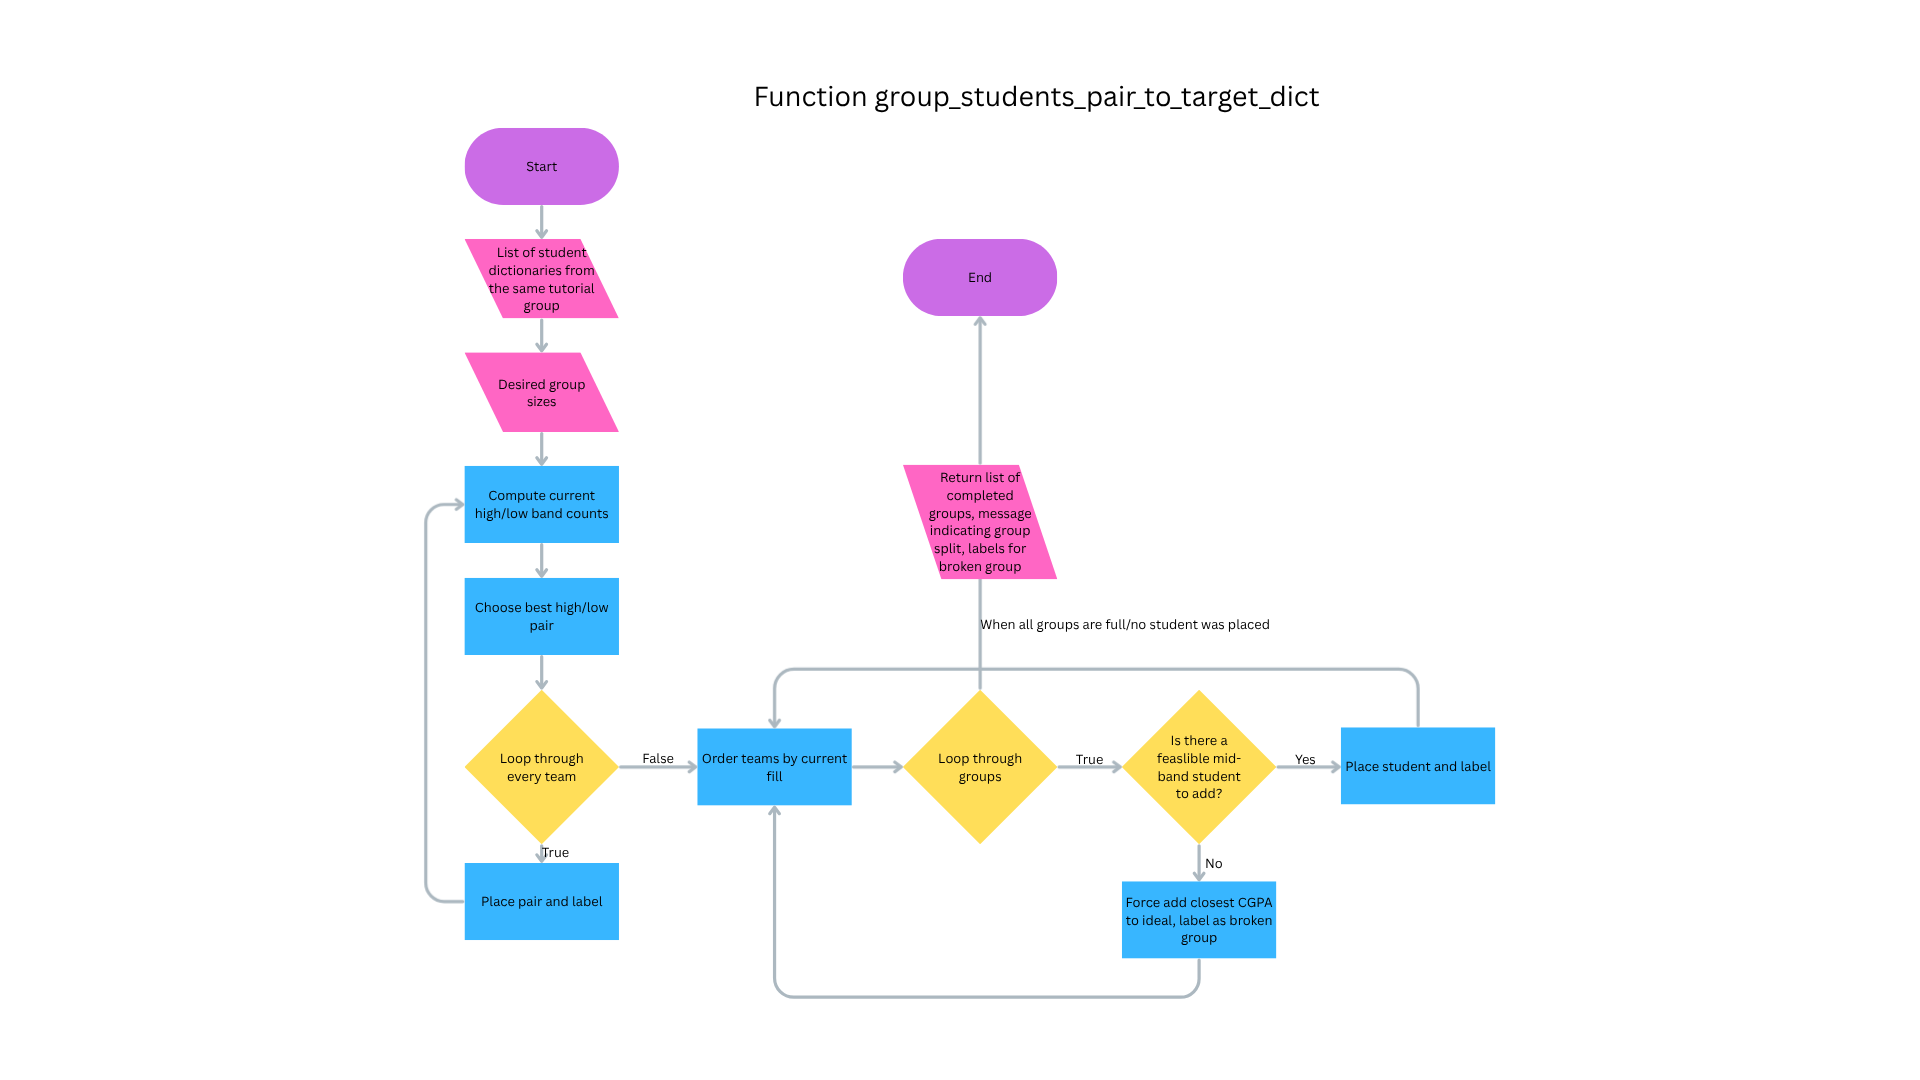

### PSEUDOCODE

DEFINE group_students_pair_to_target_dict(students, desired_group_size):

    # Step 1. Preparation
    sort students by CGPA (ascending)
    split students into LOW, MID, HIGH groups
    class_mean = average CGPA of all students
    sizes, sizes_msg = even_group_sizes(total_students, desired_group_size)
    num_groups = number of teams

    band_caps, school_caps = build_band_and_school_caps(sizes)
    minority_gender, floor_min, minority_cap = build_minority_caps(sizes, students)

    gender_counts = count genders in students
    minority_total = number of minority_gender students
    minority_remaining = minority_total
    need = [floor_min for each team]   # how many minorities each team still needs
    total_need = sum(need)
    slots_left = copy of team sizes (how many seats left in each team)

    target_high, target_low = build_hl_targets_by_sizes(sizes, len(HIGH), len(LOW), band_caps)

    groups = empty list of lists for each team

    # Step 2. Place (High, Low) pairs
    WHILE we still have highs or lows:
        FOR each team:
            calculate how many highs/lows still needed
            pairs_remaining = min(needed_high, needed_low)
            
            WHILE pairs_remaining > 0 AND highs/lows remain:
                choice = pick_best_hl_pair_for_group_avg_with_lookahead(...)
                IF no choice found: BREAK
                assign chosen high and low to this team
                remove them from supply
                update minority counts, need, and slots_left
                pairs_remaining -= 1

    # Step 3. Fill remaining seats with Mids
    broken_groups = []

    LOOP until all teams full or no progress:
        sort teams so smaller teams fill first
        FOR each team:
            WHILE team not full:
                pick_index = pick_best_mid_for_group_with_lookahead(...)

                IF no valid mid found:
                    forced_index = find mid closest to ideal CGPA
                    assign forced mid
                    update minority counts, slots_left
                    record team label in broken_groups
                ELSE:
                    assign chosen mid
                    update counts normally

    # Step 4. Return everything
    RETURN (groups, sizes_msg, broken_groups)


In [ ]:
def group_students_pair_to_target_dict(students, desired_group_size):
    """
    INPUT
      - students: list[dict], all from the SAME tutorial group (one cohort/roster)
      - desired_group_size: int, target team size (we’ll split as evenly as possible)

    SIDE EFFECTS
      - Mutates each student dict to add:
          - "band" in {"low","mid","high"}  (based on CGPA quartiles)
          - "Team Assigned" like "<Tutorial Group>-<team number>"

    RETURNS
      (groups, sizes_msg, broken_groups)
        - groups: list[list[student]] — the formed teams for this tutorial group
        - sizes_msg: str — human-readable explanation of the split (e.g. 6×5 and 2×6)
        - broken_groups: list[str] — team labels where we had to “force place” a pair/mid
    """
    roster = list(students)

    # Sort by CGPA ascending to prep for banding.
    sort_by_cgpa_ascending(roster)

    # Split students into bands and tag them
    low, mid, high = split_bands_and_tag(roster)

    # Compute the overall class mean CGPA
    class_mean = overall_mean(roster)

    # Decide team sizes that are as even as possible around `desired_group_size`.
    sizes, sizes_msg = even_group_sizes(len(roster), desired_group_size)
    num_groups = len(sizes)

    # Build per-team caps:
    band_caps, school_caps = build_band_and_school_caps(sizes)

    # Minority policy per team:
    minority_gender, floor_min, minority_cap = build_minority_caps(sizes, roster)

    # Global minority trackers
    gender_counts = count_gender_in_group(roster)
    minority_total = gender_counts.get(minority_gender, 0) if minority_gender is not None else 0
    minority_remaining = minority_total
    need = [floor_min for _ in range(num_groups)]
    total_need = sum(need)
    slots_left = [sizes[i] for i in range(num_groups)]

    # Decide how many highs and lows each team aims to receive, respecting band_caps.
    target_high, target_low = build_hl_targets_by_sizes(
        sizes, len(high), len(low), band_caps
    )

    # Prepare the actual team containers.
    groups = [[] for _ in range(num_groups)]
    broken_groups = []  # moved here so we can also mark forced H/L pairs

    # H/L PAIR SEEDING
    highs = list(high)
    lows  = list(low)

    team_index = 0
    while team_index < num_groups and (len(highs) > 0 or len(lows) > 0):
        band_counts = count_band_in_group(groups[team_index])
        needed_high = target_high[team_index] - band_counts['high']
        needed_low  = target_low[team_index]  - band_counts['low']
        pairs_remaining = min(needed_high, needed_low)

        while pairs_remaining > 0 and len(highs) > 0 and len(lows) > 0:
            group_capacity = sizes[team_index]

            # Normal, fully-constrained picker
            choice = pick_best_hl_pair_for_group_avg_with_lookahead(
                group=groups[team_index],
                highs=highs,
                lows=lows,
                class_mean=class_mean,
                group_size=group_capacity,
                band_caps=band_caps,
                school_caps=school_caps,
                minority_gender=minority_gender,
                minority_cap=minority_cap,
                group_index=team_index,
                need=need,
                slots_left=slots_left,
                minority_remaining=minority_remaining,
                total_need=total_need
            )

            # If no feasible pair exists, force-pick like we do for mids:
            # Pass 1: among all pairs, try to respect GLOBAL minority supply guard.
            # Pass 2: if none pass, pick the closest pair anyway (ignoring supply guard).
            forced_pair = None
            forced_err = None
            forced_from = None  # "pair_forced_supply_ok" or "pair_forced_any"

            if choice is None and slots_left[team_index] >= 2:
                target_pair_sum = 2.0 * class_mean

                # PASS 1: try to respect global supply guard
                hi_idx = 0
                while hi_idx < len(highs):
                    lo_idx = 0
                    while lo_idx < len(lows):
                        # compute error vs target
                        pair_sum = highs[hi_idx]["CGPA"] + lows[lo_idx]["CGPA"]
                        err = abs(pair_sum - target_pair_sum)

                        # compute minority-in-pair
                        minority_in_pair = 0
                        if is_minority(highs[hi_idx], minority_gender): minority_in_pair += 1
                        if is_minority(lows[lo_idx],  minority_gender): minority_in_pair += 1

                        credited_reduction = min(need[team_index], minority_in_pair)
                        feasible_supply = (minority_remaining - minority_in_pair) >= (total_need - credited_reduction)

                        if feasible_supply:
                            if forced_err is None or err < forced_err:
                                forced_err = err
                                forced_pair = (hi_idx, lo_idx)
                                forced_from = "pair_forced_supply_ok"
                        lo_idx += 1
                    hi_idx += 1

                # PASS 2: ignore supply guard if Pass 1 found nothing
                if forced_pair is None:
                    hi_idx = 0
                    forced_err = None
                    while hi_idx < len(highs):
                        lo_idx = 0
                        while lo_idx < len(lows):
                            pair_sum = highs[hi_idx]["CGPA"] + lows[lo_idx]["CGPA"]
                            err = abs(pair_sum - target_pair_sum)
                            if forced_err is None or err < forced_err:
                                forced_err = err
                                forced_pair = (hi_idx, lo_idx)
                                forced_from = "pair_forced_any"
                            lo_idx += 1
                        hi_idx += 1

                # adopt forced choice, if any
                if forced_pair is not None:
                    choice = forced_pair

            # If still nothing at all, stop trying pairs for this team.
            if choice is None:
                break

            high_index, low_index = choice

            # Commit the chosen/forced pair
            high_pick = highs.pop(high_index)
            low_pick  = lows.pop(low_index)
            label = f'{high_pick["Tutorial Group"]}-{team_index+1}'
            high_pick["Team Assigned"] = label
            low_pick["Team Assigned"] = label
            groups[team_index].append(high_pick)
            groups[team_index].append(low_pick)

            # Update floors, capacity, and GLOBAL supply
            minorities_in_pair = 0
            if is_minority(high_pick, minority_gender): minorities_in_pair += 1
            if is_minority(low_pick,  minority_gender): minorities_in_pair += 1

            previous_team_need = need[team_index]
            credited_reduction = min(previous_team_need, minorities_in_pair)
            need[team_index] = max(0, previous_team_need - minorities_in_pair)
            slots_left[team_index] -= 2

            minority_remaining -= minorities_in_pair
            total_need         -= credited_reduction

            # If we had to force the pair, record it
            if forced_from is not None:
                if label not in broken_groups:
                    broken_groups.append(label)

            pairs_remaining -= 1

        team_index += 1

    # FILL WITH MIDS
    mids = list(mid)

    while True:
        progress_made = False
        all_full = True

        # Fill teams in order of fewest members first
        fill_order = list(range(num_groups))
        left_pos = 0
        while left_pos < len(fill_order):
            min_pos = left_pos
            scan_pos = left_pos + 1
            while scan_pos < len(fill_order):
                if len(groups[fill_order[scan_pos]]) < len(groups[fill_order[min_pos]]):
                    min_pos = scan_pos
                scan_pos += 1
            fill_order[left_pos], fill_order[min_pos] = fill_order[min_pos], fill_order[left_pos]
            left_pos += 1

        order_pos = 0
        while order_pos < len(fill_order):
            team_index = fill_order[order_pos]
            group_capacity = sizes[team_index]

            while len(groups[team_index]) < group_capacity:
                pick_index = pick_best_mid_for_group_with_lookahead(
                    groups[team_index], mids, class_mean, group_capacity,
                    band_caps, school_caps,
                    minority_gender, minority_cap, team_index,
                    need, slots_left,
                    minority_remaining, total_need
                )

                if pick_index is None:
                    if len(mids) == 0:
                        break

                    # Forced mid (Pass 1: respect supply guard, Pass 2: ignore)
                    current_sum = 0.0
                    member_idx = 0
                    while member_idx < len(groups[team_index]):
                        current_sum += groups[team_index][member_idx]["CGPA"]
                        member_idx += 1
                    seats_remaining = group_capacity - len(groups[team_index])
                    target_total = group_capacity * class_mean
                    ideal_next = (target_total - current_sum) / seats_remaining

                    best_forced_index = None
                    best_forced_error = None

                    candidate_idx = 0
                    while candidate_idx < len(mids):
                        candidate = mids[candidate_idx]
                        minority_increment = 1 if is_minority(candidate, minority_gender) else 0
                        credited_reduction = min(need[team_index], minority_increment)
                        feasible_supply = (minority_remaining - minority_increment) >= (total_need - credited_reduction)
                        if feasible_supply:
                            err = abs(candidate["CGPA"] - ideal_next)
                            if best_forced_error is None or err < best_forced_error:
                                best_forced_error = err
                                best_forced_index = candidate_idx
                        candidate_idx += 1

                    if best_forced_index is None:
                        candidate_idx = 0
                        while candidate_idx < len(mids):
                            err = abs(mids[candidate_idx]["CGPA"] - ideal_next)
                            if best_forced_error is None or err < best_forced_error:
                                best_forced_error = err
                                best_forced_index = candidate_idx
                            candidate_idx += 1

                    forced = mids.pop(best_forced_index)
                    forced["Team Assigned"] = f'{forced["Tutorial Group"]}-{team_index+1}'
                    groups[team_index].append(forced)

                    minority_increment = 1 if is_minority(forced, minority_gender) else 0
                    previous_team_need = need[team_index]
                    credited_reduction = min(previous_team_need, minority_increment)
                    need[team_index] = max(0, previous_team_need - minority_increment)
                    slots_left[team_index] -= 1

                    minority_remaining -= minority_increment
                    total_need         -= credited_reduction

                    # mark team as forced (mid)
                    label = f'{forced["Tutorial Group"]}-{team_index+1}'
                    if label not in broken_groups:
                        broken_groups.append(label)
                    progress_made = True

                else:
                    chosen = mids.pop(pick_index)
                    chosen["Team Assigned"] = f'{chosen["Tutorial Group"]}-{team_index+1}'
                    groups[team_index].append(chosen)

                    minority_increment = 1 if is_minority(chosen, minority_gender) else 0
                    previous_team_need = need[team_index]
                    credited_reduction = min(previous_team_need, minority_increment)
                    need[team_index] = max(0, previous_team_need - minority_increment)
                    slots_left[team_index] -= 1

                    minority_remaining -= minority_increment
                    total_need         -= credited_reduction

                    progress_made = True

            if len(groups[team_index]) < group_capacity:
                all_full = False
            order_pos += 1

        if all_full:
            break
        if not progress_made:
            break

    return groups, sizes_msg, broken_groups

## Function export_to_csv

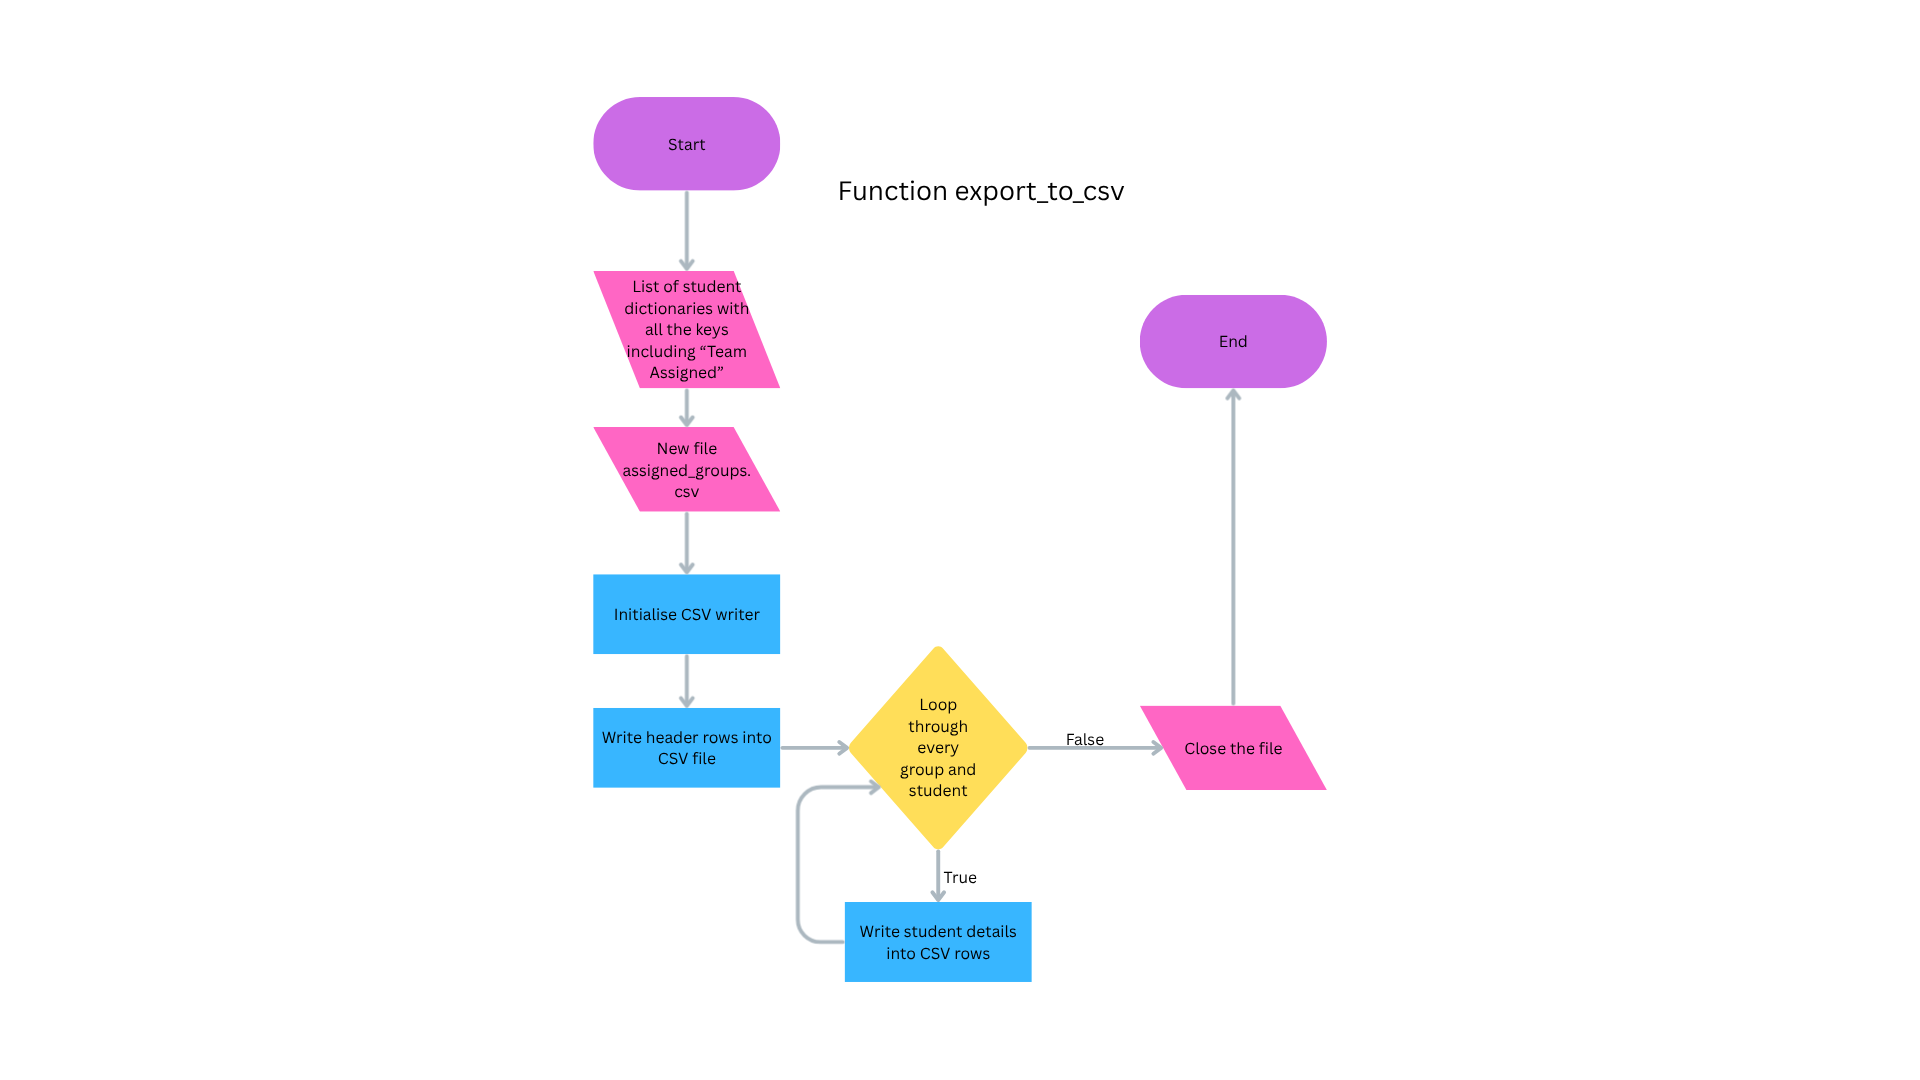

### PSEUDOCODE

DEFINE export_teams_to_csv(parameter = teams_by_tutgrp, file):

    OPEN a new CSV file with the given filename for writing

    CREATE a CSV writer

    WRITE the header row:
        ["Tutorial Group", "Student ID", "School", "Name", "Gender", "CGPA", "Team Assigned"]

    FOR each tutorial group in teams_by_group (in ascending order):
        GET the list of teams for that group

        FOR each team in that list:
            FOR each student in that team:
                WRITE a row to the CSV with the following information:
                    - Tutorial Group
                    - Student ID
                    - School
                    - Name
                    - Gender
                    - CGPA
                    - Team Assigned
            END FOR
        END FOR

    CLOSE the file

    PRINT message: "Teams have been exported to [filename]."


    

In [ ]:
def export_teams_to_csv(teams_by_group, filename='assigned_teams.csv'):

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Tutorial Group", "Student ID", "School", "Name", "Gender", "CGPA", "Team Assigned"])

        for group in sorted(teams_by_group.keys()):
            teams = teams_by_group[group]
            for team in teams:
                for student in team:
                    writer.writerow([
                        group,
                        student['Student ID'],
                        student['School'],
                        student['Name'],
                        student['Gender'],
                        student['CGPA'],
                        student['Team Assigned']
                    ])
    print(f"Teams have been exported to {filename}.")


## Driver Function

Loops through all the tutorial groups and assigns class groups.

## Function assign_all_tutorial_groups

### Input
- `students_by_group`: a dictionary mapping tutorial-group codes (e.g., `"G-109"`) to a **list of student dictionaries** in that tutorial group.
- `desired_group_size`: integer target team size used when forming teams (default `5`).

### Process
- Initialize:
  - `results = {}` to store final teams per tutorial group,
  - `sizes_msg = ""` placeholder for a human-readable split message.
  - `all_broken = []` to collect labels of teams that needed a forced placement.
- Loops through all the tutorial groups in the cohort
  - For each `(tg, roster)` in `students_by_group.items()
- Runs the `group_students_to_target` function for each tutorial group


### Output
- `results`: `{ tutorial_group -> list_of_teams }`, with each team being a list of student dicts (now tagged with `"band"` and `"Team Assigned"`).
- `sizes_msg`: the **last** tutorial group’s size-split message encountered in the loop.
- `all_broken`: concatenated list of all team labels across **all** tutorial groups that required forced placement.

### Summary
Coordinates team assignment **per tutorial group** by delegating to `group_students_pair_to_target_dict`, aggregates teams into `results`, collects any “broken” team labels across groups, and returns the final mapping plus the most recent size-split message.


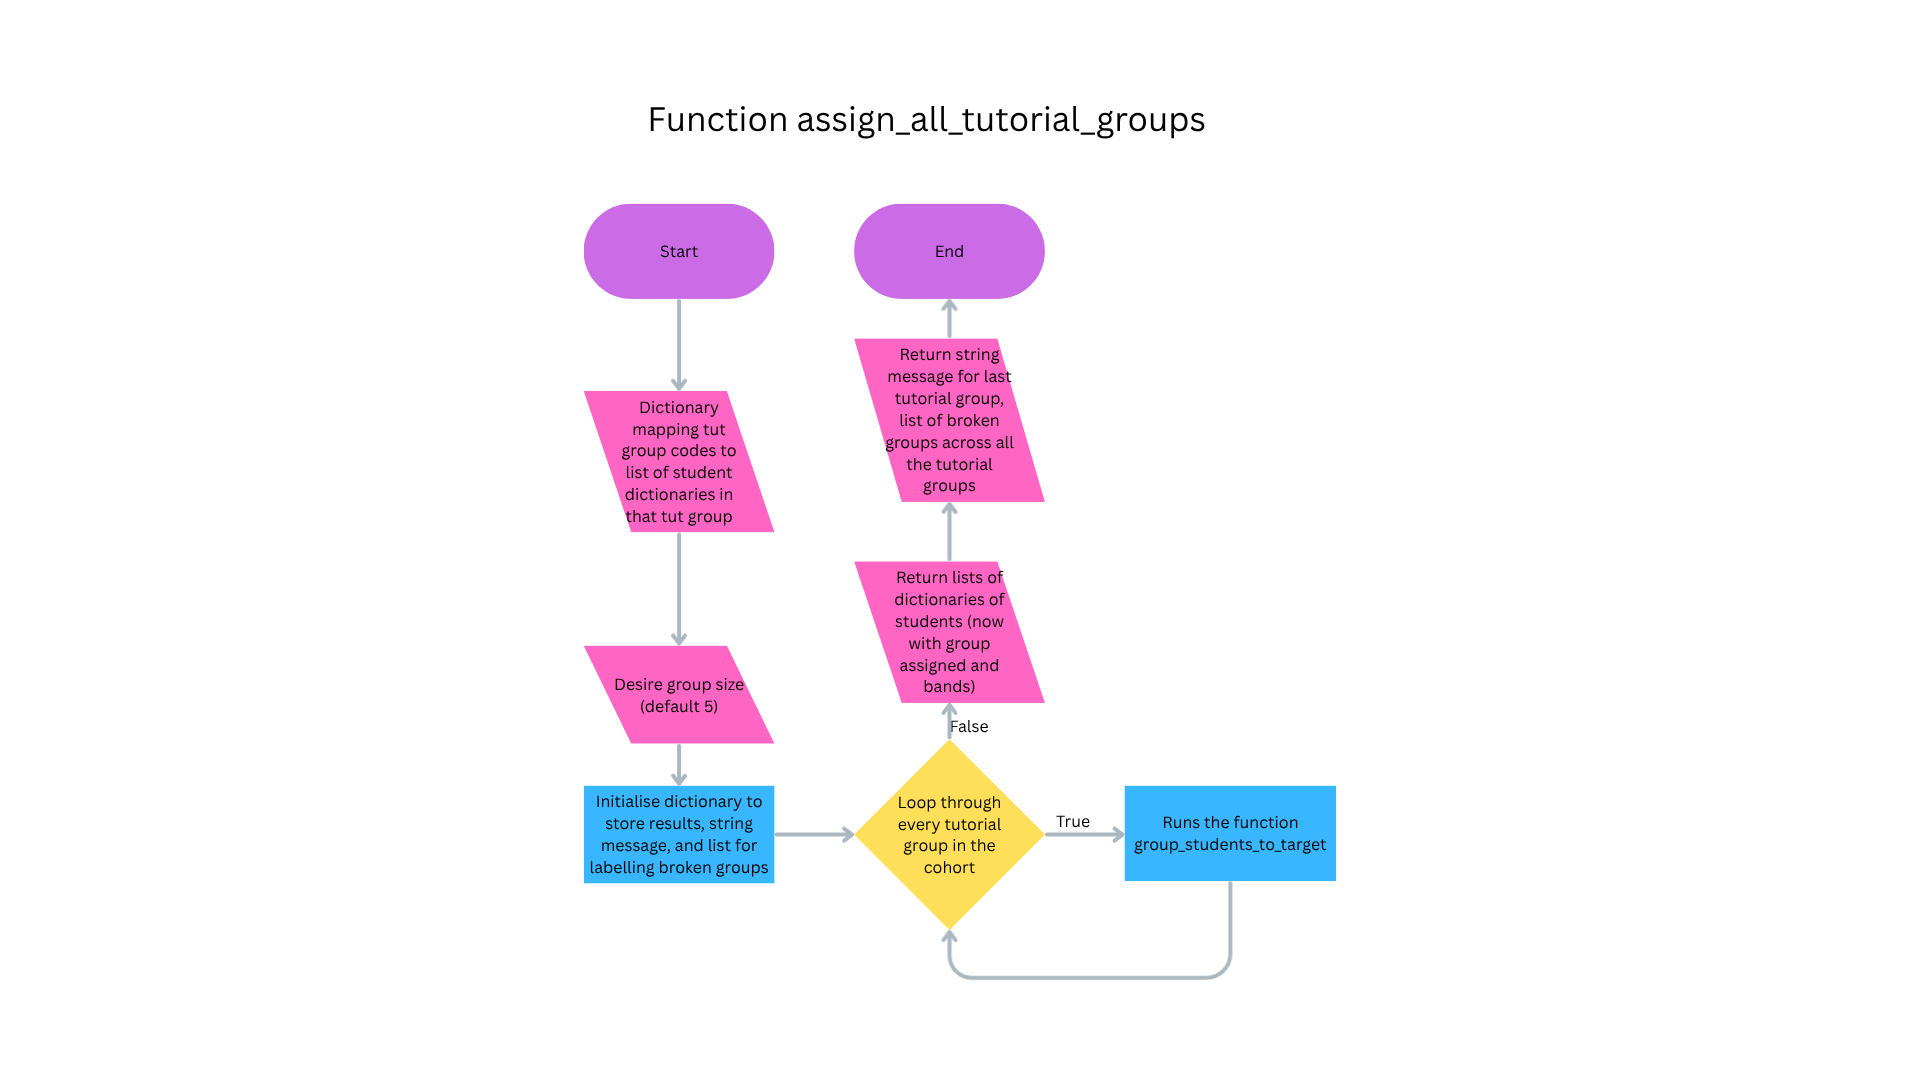

### PSEUDOCODE
DEFINE assign_all_tutorial_groups(students_by_group, desired_group_size = 5):

    CREATE an empty dictionary called results
    INITIALIZE an empty string called sizes_msg
    CREATE an empty list called all_broken

    FOR each tutorial group (tg) and its list of students (roster) in students_by_group:
        CALL group_students_pair_to_target_dict(roster, desired_group_size)
              This returns (groups, sizes_msg, broken)
              where:
                - groups = list of final teams for that tutorial group
                - sizes_msg = text summary of group sizes
                - broken = list of groups that failed to meet criteria

        STORE groups in results[tg]
        ADD all broken groups into all_broken list

    RETURN results, sizes_msg, all_broken


In [ ]:
def assign_all_tutorial_groups(students_by_group, desired_group_size=5):
    """
    students_by_group: { 'G-10': [student dicts], 'G-11': [...], ... }
    Mutates student dicts to add 'band' and 'Team Assigned' and prints summaries.
    Returns a mapping: tutorial_group -> (groups, sizes_msg, broken_groups)
    """
    results = {}
    sizes_msg = ""
    all_broken = []
    for tg, roster in students_by_group.items():
        groups, sizes_msg, broken = group_students_pair_to_target_dict(roster, desired_group_size)
        results[tg] = groups
        all_broken.extend(broken)
    return results, sizes_msg, all_broken

# Functions to Plot Graphs Showing Statistics


## Functions for plotting by Tutorial Group

### Function to plot Mean Deviation


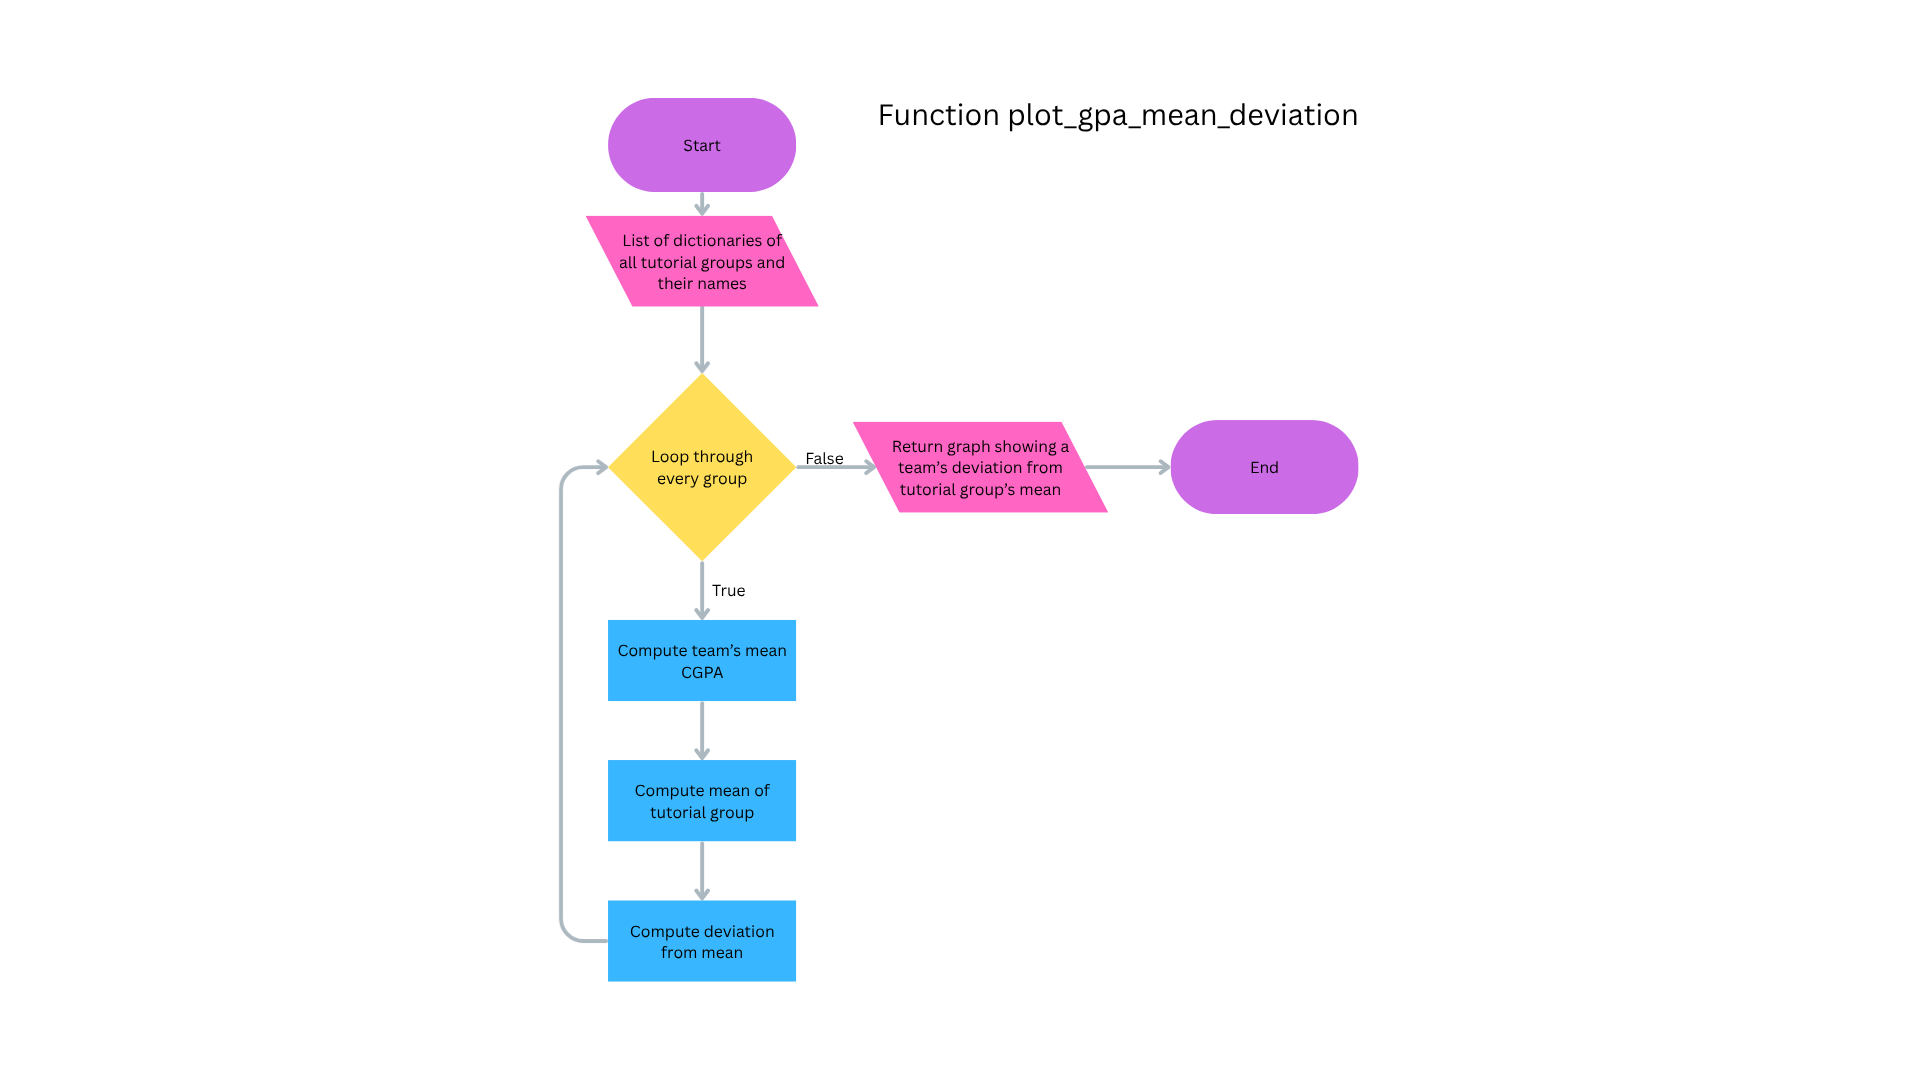

#### PSEUDOCODE (**for calculating mean deviation part only**)

DEFINE plot_gpa_mean_deviation (parameters = tutorial group, subgroup):

	INITIALIZE team = tutorialgroup [subgroup]

	Team_gpa_means = a list of sum of cgpa of each student in team / number of students in team for each team

	Tutorial_grp_mean = a list of sum of team_gpa_means / number of teams for each tut grp

	mean_deviations = a list of team_gpa_means - tutorial_grp_mean for each team in each tutorial group




In [ ]:
def plot_gpa_mean_deviation(all_tutorial_group, tutorial_name):
    teams = all_tutorial_group[tutorial_name]
    team_labels = [f"{tutorial_name}-{i+1}" for i in range(len(teams))]

    # Compute team GPA means
    team_gpa_means = [
        sum(student["CGPA"] for student in team) / len(team)
        for team in teams
    ]

    # Compute tutorial-wide mean and deviations
    tutorial_mean = sum(team_gpa_means) / len(team_gpa_means)
    deviations = [mean - tutorial_mean for mean in team_gpa_means]

    # Define y-axis limits and ticks manually
    ymin, ymax = -0.15, 0.15
    yticks = [round(y, 2) for y in [ymin + i * 0.05 for i in range(int((ymax - ymin) / 0.05) + 1)]]
    x = list(range(len(team_labels)))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, deviations, '-o', color='red', label='Mean Deviation')

    ax = plt.gca()
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    plt.axhline(0, color='green', linestyle='--', linewidth=1, label='Tutorial Mean (0)')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.ylim(ymin, ymax)
    plt.yticks(yticks)
    plt.xticks(x, team_labels, rotation=45, ha='right')
    plt.ylabel("GPA Difference from Tutorial Mean")
    plt.title(f"GPA Mean Deviations Centered Around Mean ({tutorial_name})")
    plt.legend()
    plt.tight_layout()
    plt.show()


### Function To Plot Gender Statistics

In [ ]:
def plot_gender_distribution(tutorial_group, tutorial_name):
    teams = tutorial_group[tutorial_name]
    team_size = len(teams[0])
    gender_ratios = []
    for team in teams:
        male = sum(1 for s in team if s["Gender"].strip().lower() == "male")
        female = sum(1 for s in team if s["Gender"].strip().lower() == "female")
        gender_ratios.append({"male": male, "female": female})

    gender_comp_labels = [f"{m}M{team_size-m}F" for m in range(team_size, -1, -1)]
    gender_comp_counts = [0] * len(gender_comp_labels)
    for g in gender_ratios:
        label = f"{g['male']}M{g['female']}F"
        if label in gender_comp_labels:
            gender_comp_counts[gender_comp_labels.index(label)] += 1

    percentages = [c / len(teams) * 100 for c in gender_comp_counts]

    plt.figure(figsize=(8, 5))
    plt.bar(gender_comp_labels, percentages, color='lightcoral', edgecolor='black')
    plt.xticks(gender_comp_labels)
    plt.xlabel("Gender Composition per Team")
    plt.ylabel("% of teams")
    plt.ylim(0, 100)
    plt.title(f"Gender Composition Distribution ({tutorial_name})")
    plt.tight_layout()
    plt.show()


### Function To Plot School Distribution

In [ ]:
def plot_school_representation(tutorial_group, tutorial_name):

    teams = tutorial_group[tutorial_name]
    school_diversity_count = {}
    total_teams = len(teams)

    # Count unique schools per team
    for team in teams:
        unique_schools = {student['School'] for student in team}
        count = len(unique_schools)
        school_diversity_count[count] = school_diversity_count.get(count, 0) + 1

    # Print summary for this tutorial
    print(f"School Diversity Summary for {tutorial_name}:")
    for unique_count, count in sorted(school_diversity_count.items()):
        pct = (count / total_teams) * 100
        print(f"Teams with {unique_count} unique schools: {count} teams ({pct:.1f}%)")

    # Prepare data for plotting
    labels = [str(k) for k in sorted(school_diversity_count.keys())]
    counts = [school_diversity_count[k] for k in sorted(school_diversity_count.keys())]
    percentages = [(v / total_teams) * 100 for v in counts]

    # Plot
    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, percentages, color='lightblue', edgecolor='black')

    for bar, pct, count in zip(bars, percentages, counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            f"{pct:.1f}% ({count})",
            ha='center', va='bottom', fontsize=9, fontweight='medium'
        )

    plt.title(f"School Diversity in {tutorial_name}")
    plt.xlabel("Number of Unique Schools per Team")
    plt.ylabel("Percentage of Teams (%)")
    plt.ylim(0, 100)
    plt.yticks(range(0, 101, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## Functions for Plotting by Cohort

### Function `gender_diversity_stats`

#### Input
- `teams_by_group`: a dictionary where keys are tutorial group names and values are lists of teams.  
  Each team is a list of student dictionaries, and each student must have a `"Gender"` key with either `"male"` or `"female"`.

#### Process
- Initialize `gender_combinations = {}` and `subgroup_counts = {}`, along with a counter `total_teams = 0`.
- For every group:
  - For each team:
    - Count the number of males and females.
    - Record the mix (e.g., `"3 females, 2 males"`).
    - Sort genders so `3+2` and `2+3` are treated the same.
    - Update totals and percentages for each unique combination.
- Plot a bar chart with:
  - X-axis: gender mix (e.g., `2+3`, `1+4`, etc.)  
  - Y-axis: percentage of teams (0–100 scale).  
  - Each bar labeled with both the percentage and the team count (e.g., `"20.0% (2)"`).

#### Output
- Prints a summary of gender combinations and percentages.
- Displays a labeled bar chart showing how teams are distributed by gender mix.

#### Summary
Analyzes and visualizes how gender is distributed across teams, combining symmetric mixes (e.g., 3+2 and 2+3) and showing both the count and percentage of teams in each category.

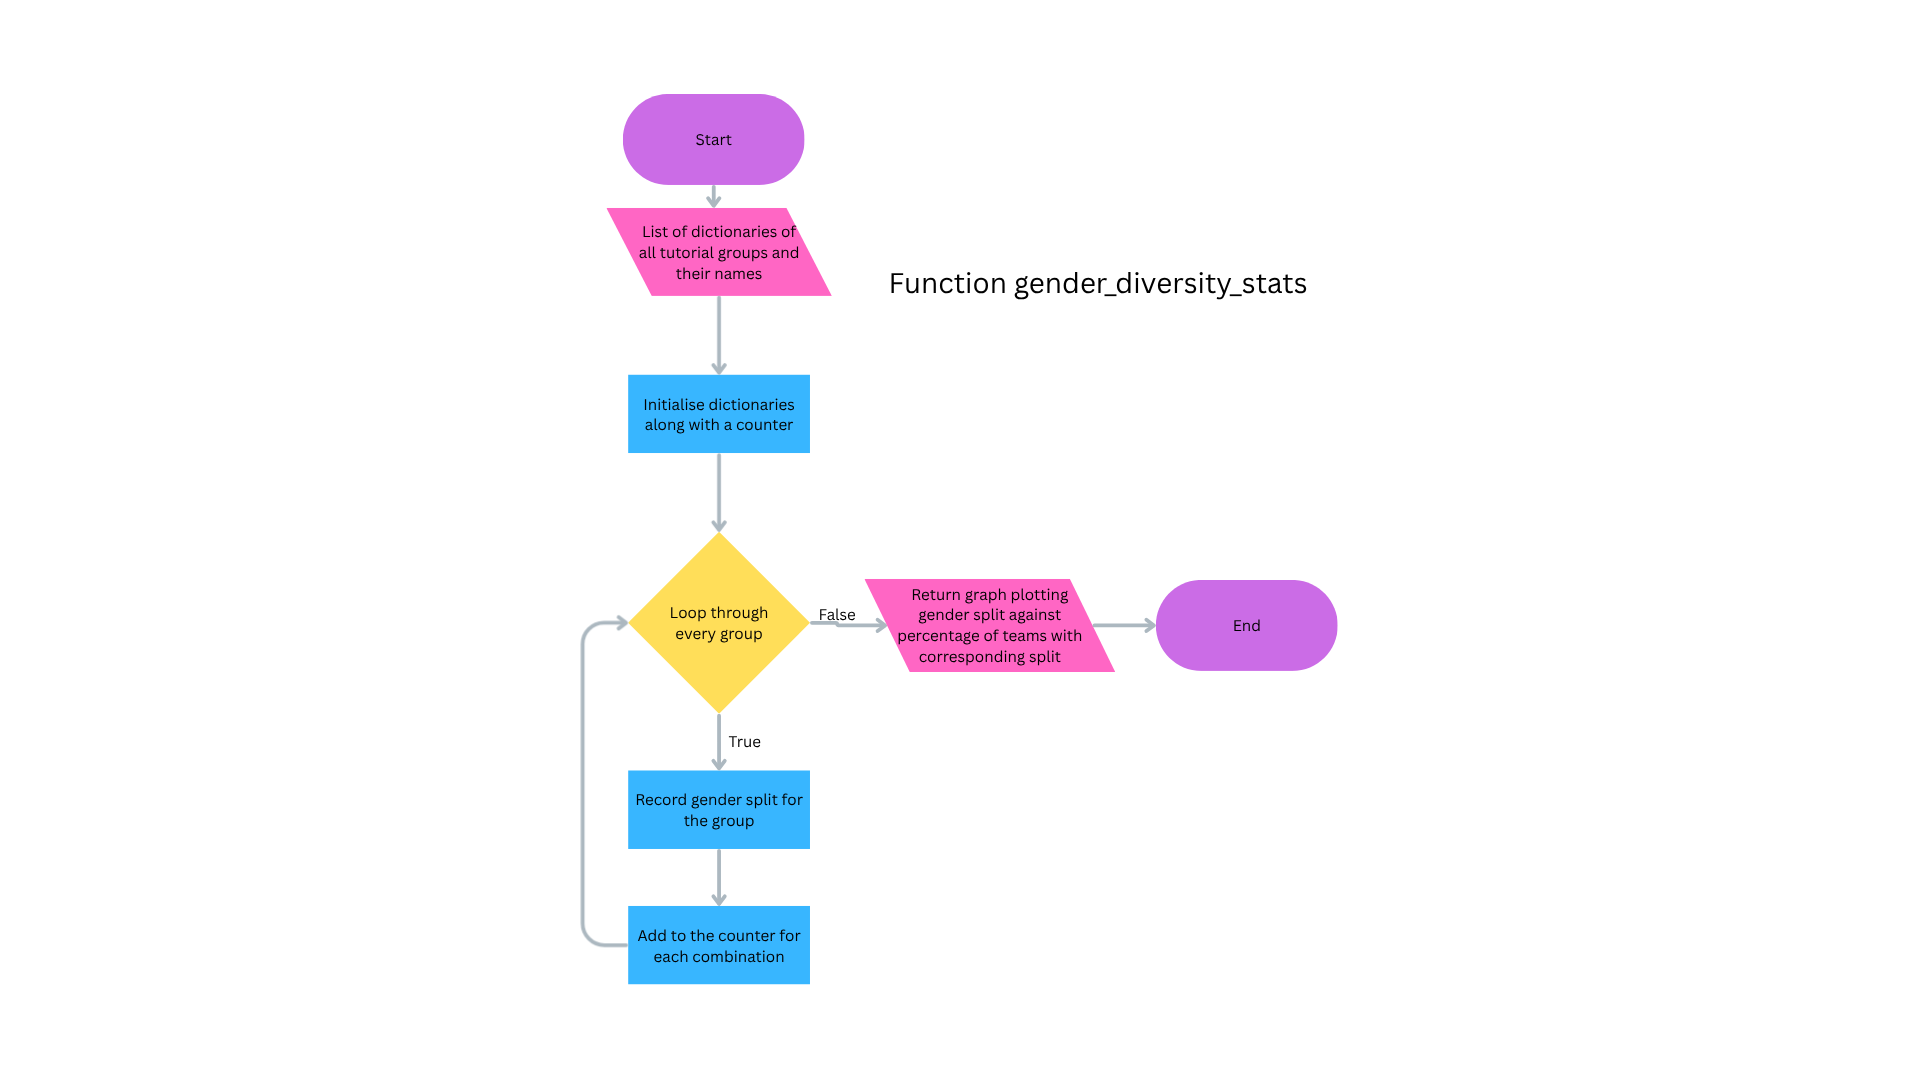

#### PSEUDOCODE

DEFINE gender_diversity_stats(teams_by_group):

    CREATE empty dictionary gender_combinations
    CREATE empty dictionary subgroup_counts
    SET total_teams = 0

    FOR each tutorial_group in teams_by_group:
        FOR each team in tutorial_group:
            COUNT number of males in the team
            COUNT number of females in the team
            ADD 1 to total_teams

            # Record exact combination
            combination = "X females, Y males"
            INCREASE gender_combinations[combination] by 1

            # Record combination ignoring gender order
            mix_key = smaller_number + "+" + larger_number
            INCREASE subgroup_counts[mix_key] by 1

    PRINT all gender_combinations with how many teams each has

    PRINT a summary showing each mix_key, its count, and percentage

    DRAW bar chart:
        x-axis: gender mix (e.g., 2+3, 1+4)
        y-axis: percentage of teams
        label each bar with both percentage and team count


In [ ]:

def gender_diversity_stats(teams_by_group):
    gender_combinations = {}
    subgroup_counts = {}
    total_teams = 0  # Track total number of teams

    for teams in teams_by_group.values():
        for team in teams:
            male = sum(1 for s in team if s['Gender'] == 'male')
            female = sum(1 for s in team if s['Gender'] == 'female')
            total_teams += 1

            # Record raw combination
            combination = f"{female} females, {male} males"
            gender_combinations[combination] = gender_combinations.get(combination, 0) + 1

            # Sort genders so 3+2 == 2+3
            mix_key = "+".join(map(str, sorted([male, female])))
            subgroup_counts[mix_key] = subgroup_counts.get(mix_key, 0) + 1

    # Print detailed results
    for combination, count in gender_combinations.items():
        print(f"{combination}: {count} teams")

    print("\nGender Mix Summary (ignoring which gender is majority):")
    for k, v in subgroup_counts.items():
        pct = (v / total_teams) * 100
        print(f"{k}: {v} teams ({pct:.1f}%)")

    # Prepare data for plotting
    labels = list(subgroup_counts.keys())
    counts = list(subgroup_counts.values())
    percentages = [(v / total_teams) * 100 for v in counts]

    plt.figure(figsize=(7, 4))
    bars = plt.bar(labels, percentages, color='skyblue', edgecolor='black')

    # Add percentage + count labels above bars
    for bar, pct, count in zip(bars, percentages, counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,  # slightly above bar
            f"{pct:.1f}% ({count})",
            ha='center', va='bottom', fontsize=9, fontweight='medium'
        )

    # Formatting
    plt.title("Gender Mix Distribution Across Tutorial Groups")
    plt.xlabel("Gender Mix")
    plt.ylabel("Percentage of Teams (%)")
    plt.ylim(0, 100)
    plt.yticks(range(0, 101, 10))
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### Function `school_diversity_stats`

#### Input
- `teams_by_group`: a dictionary where keys are tutorial group names and values are lists of teams.  
  Each team is a list of student dictionaries, and each student has a `"School"` key.

#### Process
- Initialize an empty dictionary `school_diversity_count = {}` and a counter `total_teams = 0`.
- For each tutorial group:
  - For each team:
    - Increment `total_teams` by 1.
    - Create a set of unique schools from the team.
    - Count them with `len(unique_schools)` and update `school_diversity_count`.
- Compute each category’s percentage using `(count / total_teams) * 100`.
- Plot a bar chart with:
  - X-axis: number of unique schools per team  
  - Y-axis: percentage of teams (0–100 scale)  
  - Labels showing both percentage and number of teams (e.g., “25.0% (3)”)

#### Output
- Prints a summary table and displays a labeled bar chart of school diversity.

#### Summary
Calculates and visualizes how many unique schools are represented in each team across all tutorial groups.

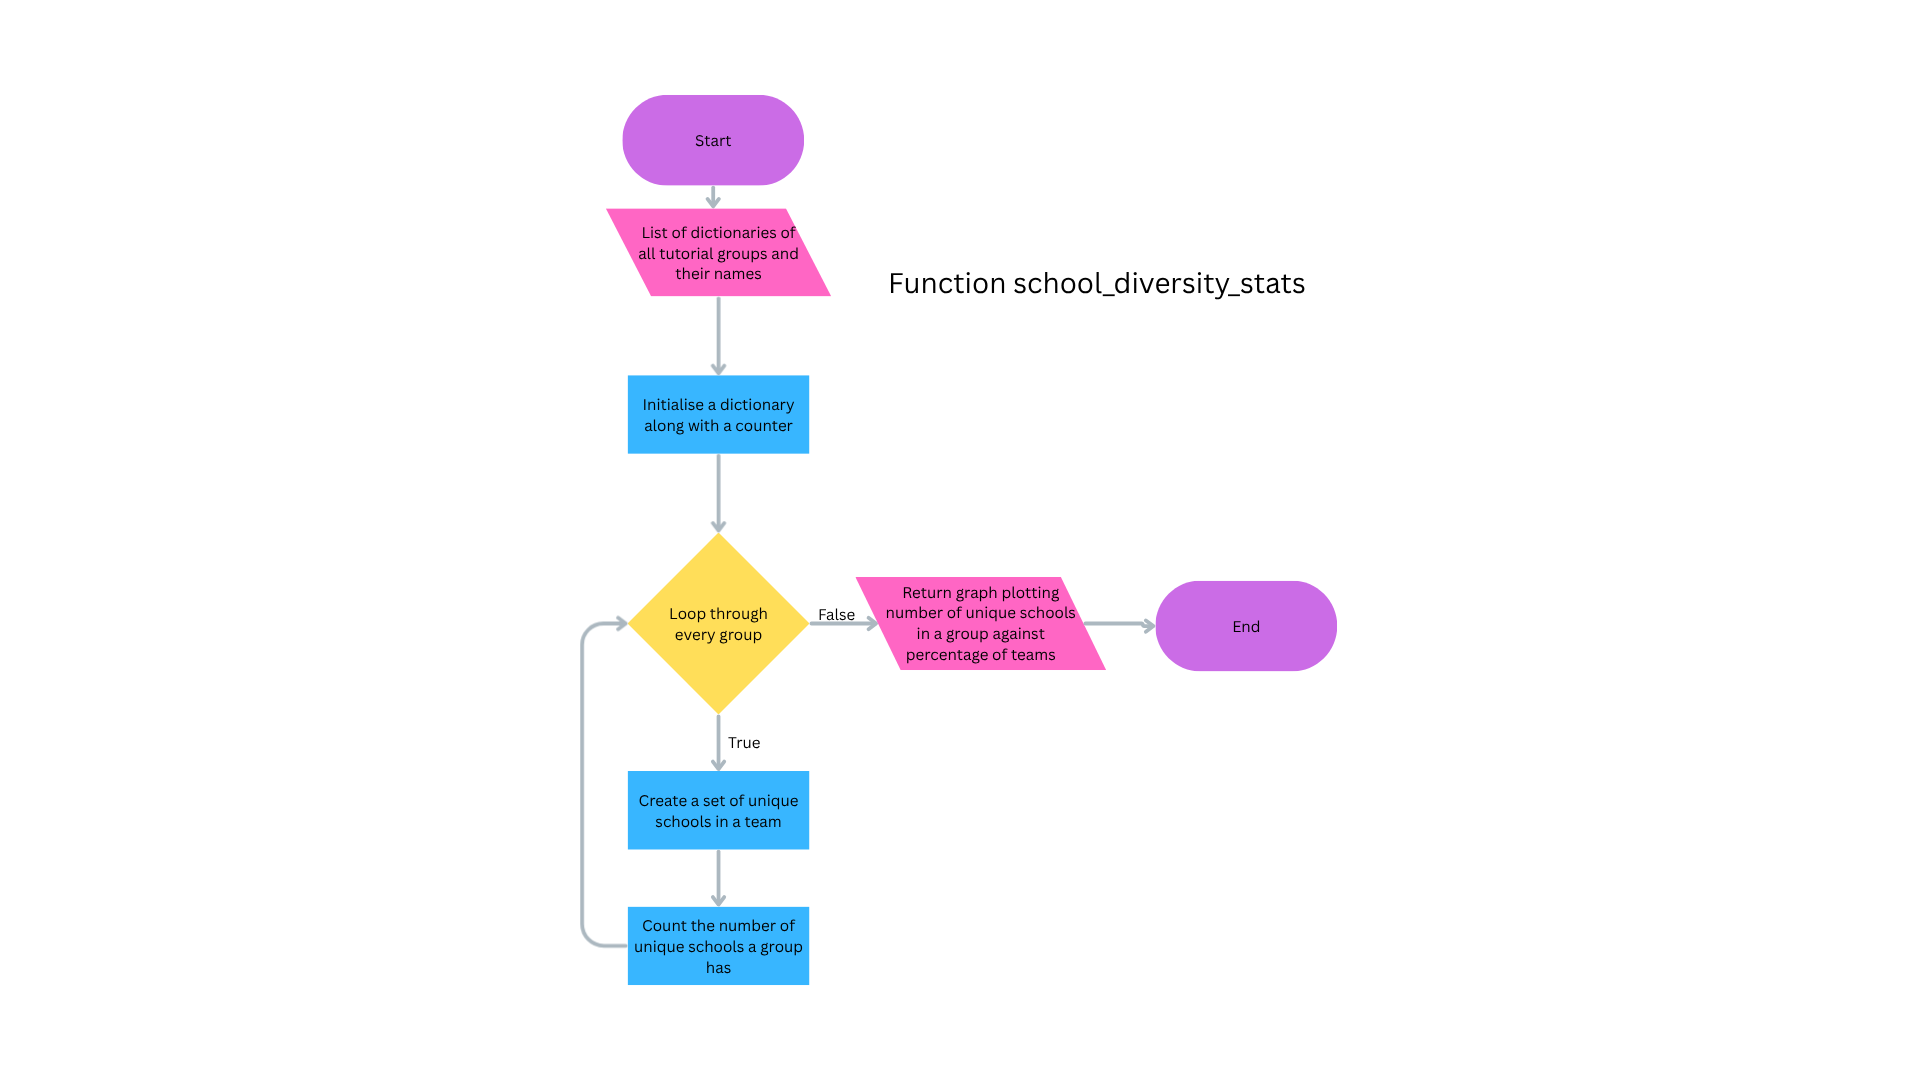

#### PSEUDOCODE

DEFINE school_diversity_stats(teams_by_group):

    CREATE empty dictionary school_diversity_count
    SET total_teams = 0

    FOR each tutorial_group in teams_by_group:
        FOR each team in tutorial_group:
            INCREASE total_teams by 1
            FIND number of unique schools in this team
            ADD 1 to the count for that number in school_diversity_count

    PRINT "School Diversity Summary:"
    FOR each unique_school_count in school_diversity_count (sorted):
        CALCULATE percentage = (count / total_teams) * 100
        PRINT how many teams have that many unique schools

    CONVERT school_diversity_count to lists of labels, counts, and percentages
    DRAW bar chart:
        x-axis = number of unique schools
        y-axis = percentage of teams
        label each bar with percentage and number of teams


In [ ]:
def school_diversity_stats(teams_by_group):
    school_diversity_count = {}
    total_teams = 0  # Track total number of teams

    for teams in teams_by_group.values():
        for team in teams:
            total_teams += 1
            unique_schools = {student['School'] for student in team}
            count = len(unique_schools)
            school_diversity_count[count] = school_diversity_count.get(count, 0) + 1

    # Print summary
    print("School Diversity Summary:")
    for unique_count, count in sorted(school_diversity_count.items()):
        pct = (count / total_teams) * 100
        print(f"Teams with {unique_count} unique schools: {count} teams ({pct:.1f}%)")

    # Convert to percentages for plotting
    labels = [str(k) for k in sorted(school_diversity_count.keys())]
    counts = [school_diversity_count[k] for k in sorted(school_diversity_count.keys())]
    percentages = [(v / total_teams) * 100 for v in counts]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, percentages, color='lightgreen', edgecolor='black')

    # Add labels showing percentage + number of teams
    for bar, pct, count in zip(bars, percentages, counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,  # Slightly above each bar
            f"{pct:.1f}% ({count})",
            ha='center', va='bottom', fontsize=9, fontweight='medium'
        )

    # Styling
    plt.title("School Diversity Across Teams")
    plt.xlabel("Number of Unique Schools per Team")
    plt.ylabel("Percentage of Teams (%)")
    plt.ylim(0, 100)
    plt.yticks(range(0, 101, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### Function `cgpa_diversity_stats`

#### Input
- `teams_by_group`: a dictionary where keys are tutorial group names and values are lists of teams.  
  Each team is a list of student dictionaries, and each student has a numeric `"CGPA"` key.

#### Process
- Initialize an empty list `team_averages = []`.
- For each tutorial group:
  - For each team:
    - Build a list `cgpas` from the team’s students: `[student["CGPA"] for student in team]`.
    - Compute the team’s mean CGPA as `average_cgpa = sum(cgpas) / len(cgpas)`.
    - Append `average_cgpa` to `team_averages`.
- Compute the overall mean of team means:  
  `overall_average_cgpa = sum(team_averages) / len(team_averages)`.
- Compute the **population** standard deviation of team means:  
  `std_team_average_cgpa = sqrt( sum((avg - overall_average_cgpa)**2 for avg in team_averages) / len(team_averages) )`.
- Print both metrics formatted to 4 decimal places.

#### Output
- Prints:
  - `Overall average CGPA: <value>`
  - `Standard deviation of team averages: <value>`

#### Summary
Calculates how balanced team performances are by:
1. averaging CGPAs within each team,  
2. taking the mean of those team averages, and  
3. reporting the spread (population standard deviation) across teams.

A smaller standard deviation indicates more evenly balanced teams around the overall mean.


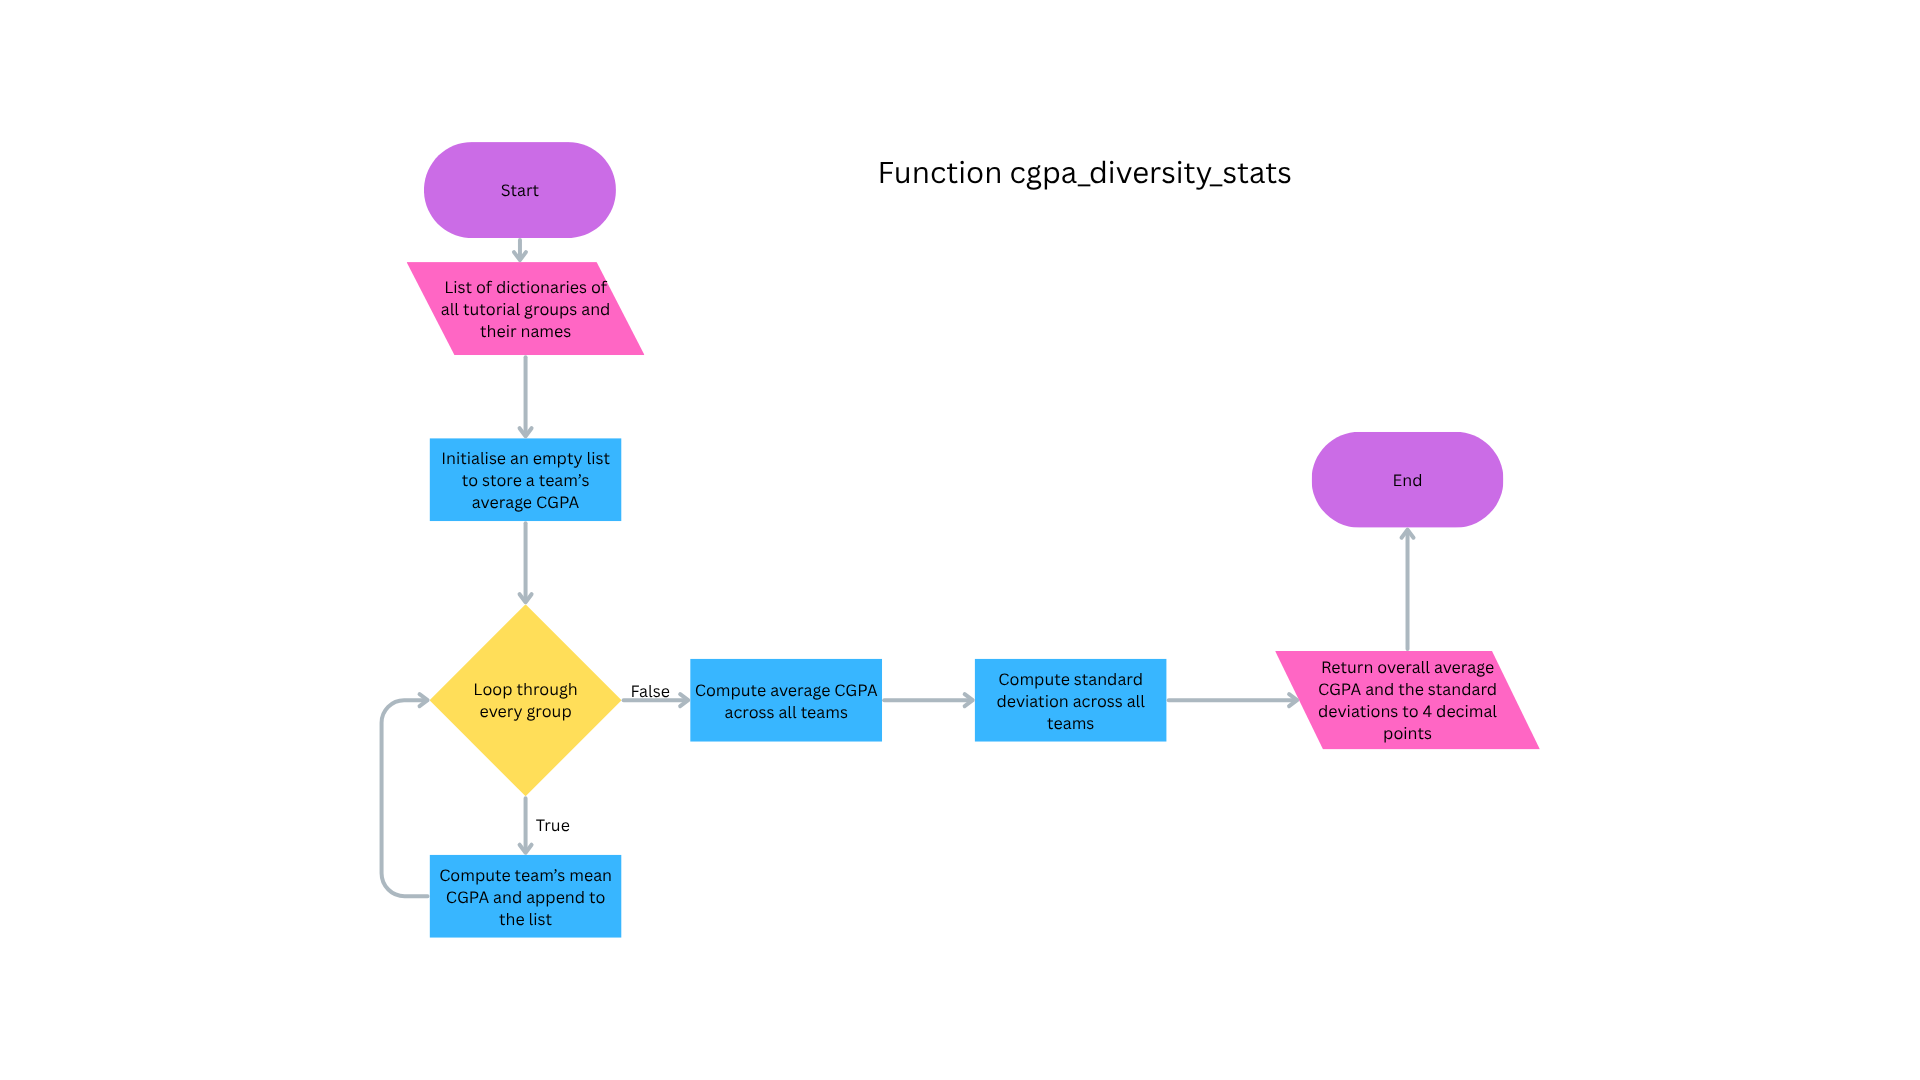

#### PSEUDOCODE

DEFINE cgpa_diversity_stats(parameter = all_tut_grp_list):

    INITIALIZE an empty list to store each team's average

    FOR each tut_grp in all_tut_grp_list:
        FOR each team in tut_grp:
            STORE each student's cgpa in a list
            COMPUTE the team average cgpa
            APPEND the team average cgpa into the empty list
        END FOR
    END FOR

    COMPUTE overall avg cgpa for the whole cohort
    COMPUTE the standard deviation of team averages (compare each team avg cgpa to the overall avg cgpa)

    PRINT overall avg cgpa in 4 d.p
    PRINT standard deviation of team averages in 4 d.p



In [ ]:
def cgpa_diversity_stats(teams_by_group):
    team_averages = []

    for teams in teams_by_group.values():
        for team in teams:
            cgpas = [student['CGPA'] for student in team]
            average_cgpa = sum(cgpas) / len(cgpas)
            team_averages.append(average_cgpa)

    overall_average_cgpa = sum(team_averages) / len(team_averages)

    mean_team_average = overall_average_cgpa
    std_team_average_cgpa = (sum((avg - mean_team_average) ** 2 for avg in team_averages) / len(team_averages))**0.5

    print(f"Overall average CGPA: {overall_average_cgpa:.4f}")
    print(f"Standard deviation of team averages: {std_team_average_cgpa:.4f}")

## Main Program

Combines the following:
1. Loading CSV
2. Assigning class groups
3. Export results to CSV
4. Graph and statistic functions for **entire cohort**
5. Graph and statistics functions for a **user-specified tutorial group**

In [ ]:
if __name__ == "__main__":
    students = load_and_sort_student_data(filename='records.csv')
    students_by_group = sort_students_by_group(students)
    results, sizes_msg, broken = assign_all_tutorial_groups(students_by_group, desired_group_size=5)
    export_teams_to_csv(results)
    print(sizes_msg)
    #print(results)
    cgpa_diversity_stats(results)
    gender_diversity_stats(results)
    school_diversity_stats(results)

    while True:
      userinput = input("Which tutorial group do you want to check? (Enter NIL to stop)")
      if userinput == "NIL":
          break
      elif userinput not in results.keys():
        print("Tutorial group does not exist. Enter a valid tutorial group.")
      else:
          print(f"\n Tutorial Group {userinput} Stats")
          plot_gpa_mean_deviation(results, userinput)
          plot_gender_distribution(results, userinput)
          plot_school_representation(results, userinput)


# **Challenges and Issues Faced**

## 1. Deciding the best way to handle constraints

Starting off the project, we were unsure of how to prioritise the three main factors: CGPA, gender and school. We quickly decided on making CGPA the most important factor as it would play the strongest role in deciding whether the team is balanced. No team should have a particularly high or low mean GPA. Afterwards, we attempted different approaches to ensure the other factors, gender and school, were balanced.

## 2. Ensuring Fairness and Balance

### Approach 1: N-Bands Approach
Initially, we split each tutorial group into N bands according to CGPA. N would be the number of students in each team. Each team would then be made up of 1 student from each bands, so each teams would consist of N students. We did not pre-fix the number of bands so that the code can work teams consisting of 4 to 10 students.

However, we realised that it would not be possible to balance the gender and school within teams due to how strict the band approach was. For tutorial groups consisting of a majority of one gender or a majority of one school, it would lead to teams that were inbalanced. We then stopped developing this idea and thought of how to broaden the band approach

### Approach 2: Percentile Approach
Subsequently, we decided to split them into 3 bands instead (top 25%, middle 50%, bottom 25%). Students from the top band, the middle band and the bottom band would be selected according to gender and school factors. This made team selection more flexible which ensured that the team's gender ratio and school ratio were more balanced.

However, we realised that within the top 25% and bottom 25% bands, CGPAs could fluctuate by quite a large margin. This would cause the team's mean CGPA to differ greatly from the tutorial group's mean CGPA.

Eventually, we decided to combine both our approaches by using a combination of the Percentile Approach and CGPA Matching. There were also stronger safeguards in place for gender and school so that these factors would also be accounted for. Through this new approach, we would prioritse CGPA while ensuring that school and gender was also balanced.


## 3. Collaboration
Being the first time that many of us had worked on a coding project, collaboration posed a few issues for us.

### 1. Different Level of Coding Experience.
Some of us had more coding experience than others. If we did not properly split the workload, it would have led to a insufficent usage of time. On one hand, those who had less coding experience would have struggled with coding the more complex programs and would have taken a longer amount of time. On the other hand, those who had more coding experience would have taken less time than others, leading them to have a lot more extra time.

To deal with this issue, we assigned those with more coding experience to work on the more complex programs (Sorting Functions) while those with less coding experience would be assigned on simpler programs (Loading Functions and Graphing Functions). This would ensure that everyone would be able to contribute to their project according to their level of coding experience.

### 2. Integrating all the Functions together
As different people were working on different functions, we had to ensure that these functions could be integrated together in the main function. The primary issue was the differing input and output data type from different functions. Some data were not formatted properly and could not be properly read from one function to another.

To recitfy this issue, we agreed beforehand how we would format the data strcuture. This is to reduce the time and effort to rectify these issues.



# Evaluating Our Algorithm

### School Diversity Stats

**Criteria:**
- A group is considered unique as long as there are **no more than 2 students from each school**.

**Goal:**
- Attain as many groups as possible with **3 to 5 unique schools**.

**Results:**
- **100%** of the groups had **3 to 5 unique schools**.

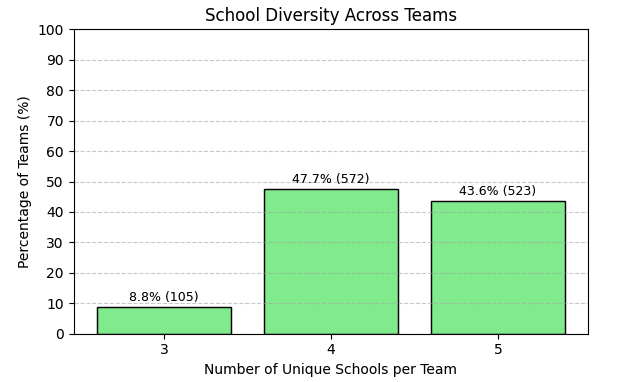

---

### Gender Diversity Stats

**Criteria:**
- For diversity in gender, the best configurations are:
  - **3 males and 2 females**
  - **3 females and 2 males**

**Goal:**
- Ensure all groups have a **3 + 2 gender mix**.

**Challenges:**
- Not all groups have equal numbers of each gender, and taking into account the CGPA and schools of students make the ideal configuration **impossible** in some cases.

**Results:**
- The program achieved the **3 + 2 gender mix** **97.3% of the time**.

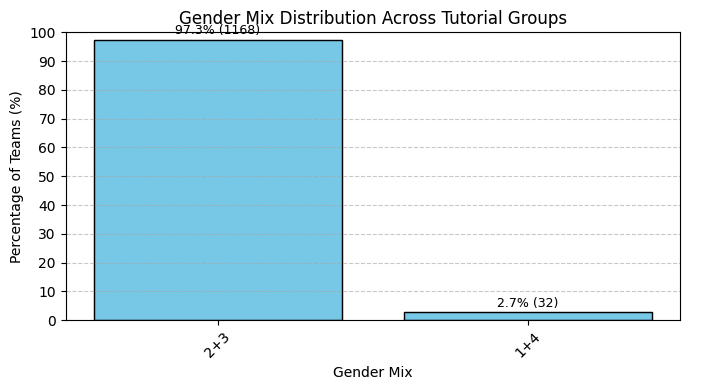
---

### CGPA Diversity Stats

**Purpose:**
- To check for any large differences in **CGPA** between groups.

**Results:**
- **Average CGPA:** `4.09`
- **Standard Deviation of Team Averages:** `0.02`
  - *Interpretation:* This indicates an **acceptable range** with minimal variation between team averages.


# Conclusion
Our statistics show that our program is effective in diversifying teams across all tutorial groups.


# Additional Requirement

Instead of having 5 students in a team, the program should provide the course coordinator
an option to enter the number of students to form a team i.e. (4 – 10).

## How We Implemented It

**Current Algorithm:**

1. Our algorithm already utilises the function `even_group_sizes` to identify the most even split of groups based on the **specified group size** given to the `assign_all_tutorial_groups` function.

2. School and band caps are not hardcoded numbers but defined as `length of group // 2` (not more than half of group).

3. Gender minorities are prioritised to be split as evenly across the groups as possible.

**Changes:**

By now allowing the  group size to be specified by the user and employing validation, the program will allow the student to choose between 4-10 students per group, returning class groups of the most equal split (based on `even_group_sizes` function), while respecting the specified constraints.


In [ ]:
if __name__ == "__main__":
    students = load_and_sort_student_data(filename='records.csv')
    students_by_group = sort_students_by_group(students)
    while True:
      try:
        group_size_input = int(input("How many students do you want in each team? (4-10)"))
        if 4 <= group_size_input <= 10:
          break
        else:
          print("Invalid input. Please enter a number between 4-10.")
      except ValueError:
        print("Invalid input. Please enter a number between 4-10.")

    results, sizes_msg, broken = assign_all_tutorial_groups(students_by_group, desired_group_size=group_size_input)
    export_teams_to_csv(results, filename = "assigned_teams_based_on_userinput.csv")
    print(sizes_msg)
    #print(results)
    cgpa_diversity_stats(results)
    gender_diversity_stats(results)
    school_diversity_stats(results)
    while True:
      userinput = input("Which tutorial group do you want to check? (Enter NIL to stop)")
      if userinput == "NIL":
            break
      elif userinput not in results.keys():
       print("Tutorial group does not exist. Enter a valid tutorial group.")
      else:
        print(f"\n Tutorial Group {userinput} Stats")
        plot_gpa_mean_deviation(results, userinput)
        plot_gender_distribution(results, userinput)
        plot_school_representation(results, userinput)